## Применение Алгоритмов Регрессии (не Бустинг)

###  Задание

Выберете набор данных для классификации (Классификация это когда целевая переменная имеет конечное число возможных значений) или Регрессии (когда их бесконечно).  1 датасет. Что больше нравиться.  
- возможно использование набора данных Cars Moldova, но он некоторым возможно надоел. При использовании этого набора ОБЯЗАТЕЛЬНО использовать в модели категориальные признаки и/или новые признаки  
- возможно использование данных связанных с вашими проектными работами и / или вашей работой (если разумеется этими данными можно делиться)  
- возможно использование набора данных Water Polution, но тогда надо ОБЯЗАТЕЛЬНО генерировать новые признаки  
- возможно использование наборов данных из открытых источников (OpenML, Kaggle). Основной критерий - достаточно много признаков и много данных. Условно от 5 различных признаков (без целевой переменной) и от 1000 строк данных. Примеры допустимых наборов данных (минус за креативность, что поделаешь):  
        Прогнозирование оттока Клиентов https://www.kaggle.com/competitions/customer-churn-prediction-2020  
        Кредитный скоринг https://www.openml.org/search?type=data&sort=runs&status=active&id=31  
        Предсказание цены на дом https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques  
- НЕЛЬЗЯ использовать данные из соревнования в текущем семестре (спойлер - это связано с Open University Learning Analytics Dataset)  
- МОЖНО (и даже нужно) использовать тот же набор данных что и в заданиях которые (НЕ БУСТИНГ)  

Выполните импорт данных. Оцените типы имеющихся данных, проверьте наличие дубликатов и/или пропущенных значений. Выполните исследовательский анализ данных. Оцените связь Признаков с целевой переменной (аггрегация с помощью метода groupby библиотеки Pandas или корреляция)  
Выполните адекватную предварительную обработку данных разными методами. Разные методы означают стандартизацию, нормализацию и степенное преобразование для числовых признаков и порядковое/one-hot кодирование для категориальных. Адекватную в смысле учета начального распределения данных (для этого надо визуализировать данные, хотя бы).  
Разделите данные на тренировочную и валидационную выборку. Определитесь с метриками, по которым вы будете оценивать модель (лучше взять не менее 3 метрик). Учитывайте баланс классов при выборе метрик и/или разброс целевых переменных.  
Выберите 2 модели машинного обучения. Как минимум один из бустингов (XGBoost, LightGBM, и CatBoost). Вторая - для разнообразия либо Случайный Лес, либо Адаптивный бустинг (Можно запотеть и реализовать модель голосование). Определите перечень гиперпараметров модели, которые необходимо оптимизировать.  
Выполните оптимизацию гиперпараметров моделей. Можно воспользоваться методом "вручную попробую несколько гиперпараметров", но лучше попрактиковаться с методами GridSearch, RandomizedSearch или библиотека Optuna  
Оцените полученные модели на тестовой выборке. Выполните анализ ошибок моделей, а также "всего чего сможете оценить" у полученной модели. Попробуйте сделать выводы о том, почему модель принимает такие решения, какие она принимает.  
Сравните модели между собой и сравните полученные решения с "простыми методами" (которые в предыдущих заданиях) 
Если копируете работу у кого-то то хотя бы поменяйте цветовые карты на графиках и перефразируйте выводы / комментарии. (или используйте другой random_state при разбиении данных)   
Если берете какие-то готовые решения из Kaggle то не поленитесь хотя бы перевести безпалевно)  

Блокнот необходимо прилежно оформить  
- хочется видеть структуру (Заголовки разного уровня);  
- ожидается видеть не только код, но и комментарии к нему;  
- не должно быть запущенных ячеек с ошибками; 
- ожидается что рисунки адекватно оформлены (не маленького размера, есть описание того, что на рисунке)

**Датасет:** Data Science Salaries 2023  
https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

### Dataset Description

Data Science Job Salaries Dataset contains 11 columns, each are:

- work_year: The year the salary was paid.
- experience_level: The experience level in the job during the year
- employment_type: The type of employment for the role
- job_title: The role worked in during the year.
- salary: The total gross salary amount paid.
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
- salaryinusd: The salary in USD
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio: The overall amount of work done remotely
- company_location: The country of the employer's main office or contracting branch
- company_size: The median number of people that worked for the company during the year

### Импорт необходимых библиотек 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
import plotly.express as px
import missingno as msno

In [3]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [4]:
#!pip install catboost

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import catboost as catb

### Загрузка датасета

In [6]:
DATASET_PATH = './Data/'

In [7]:
df = pd.read_csv(f'{DATASET_PATH}ds_salaries.csv', sep=',')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [8]:
df.shape

(3755, 11)

### Подготовка и обработка данных

Общие статистики по датасету

In [9]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [10]:
round(df.describe())

,work_year,salary,salary_in_usd,remote_ratio
count,3755.0,3755.0,3755.0,3755.0
mean,2022.0,190696.0,137570.0,46.0
std,1.0,671677.0,63056.0,49.0
min,2020.0,6000.0,5132.0,0.0
25%,2022.0,100000.0,95000.0,0.0
50%,2022.0,138000.0,135000.0,0.0
75%,2023.0,180000.0,175000.0,100.0
max,2023.0,30400000.0,450000.0,100.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Проверим на пропуски и дубликаты

In [12]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Визуализация пропусков

<Axes: >

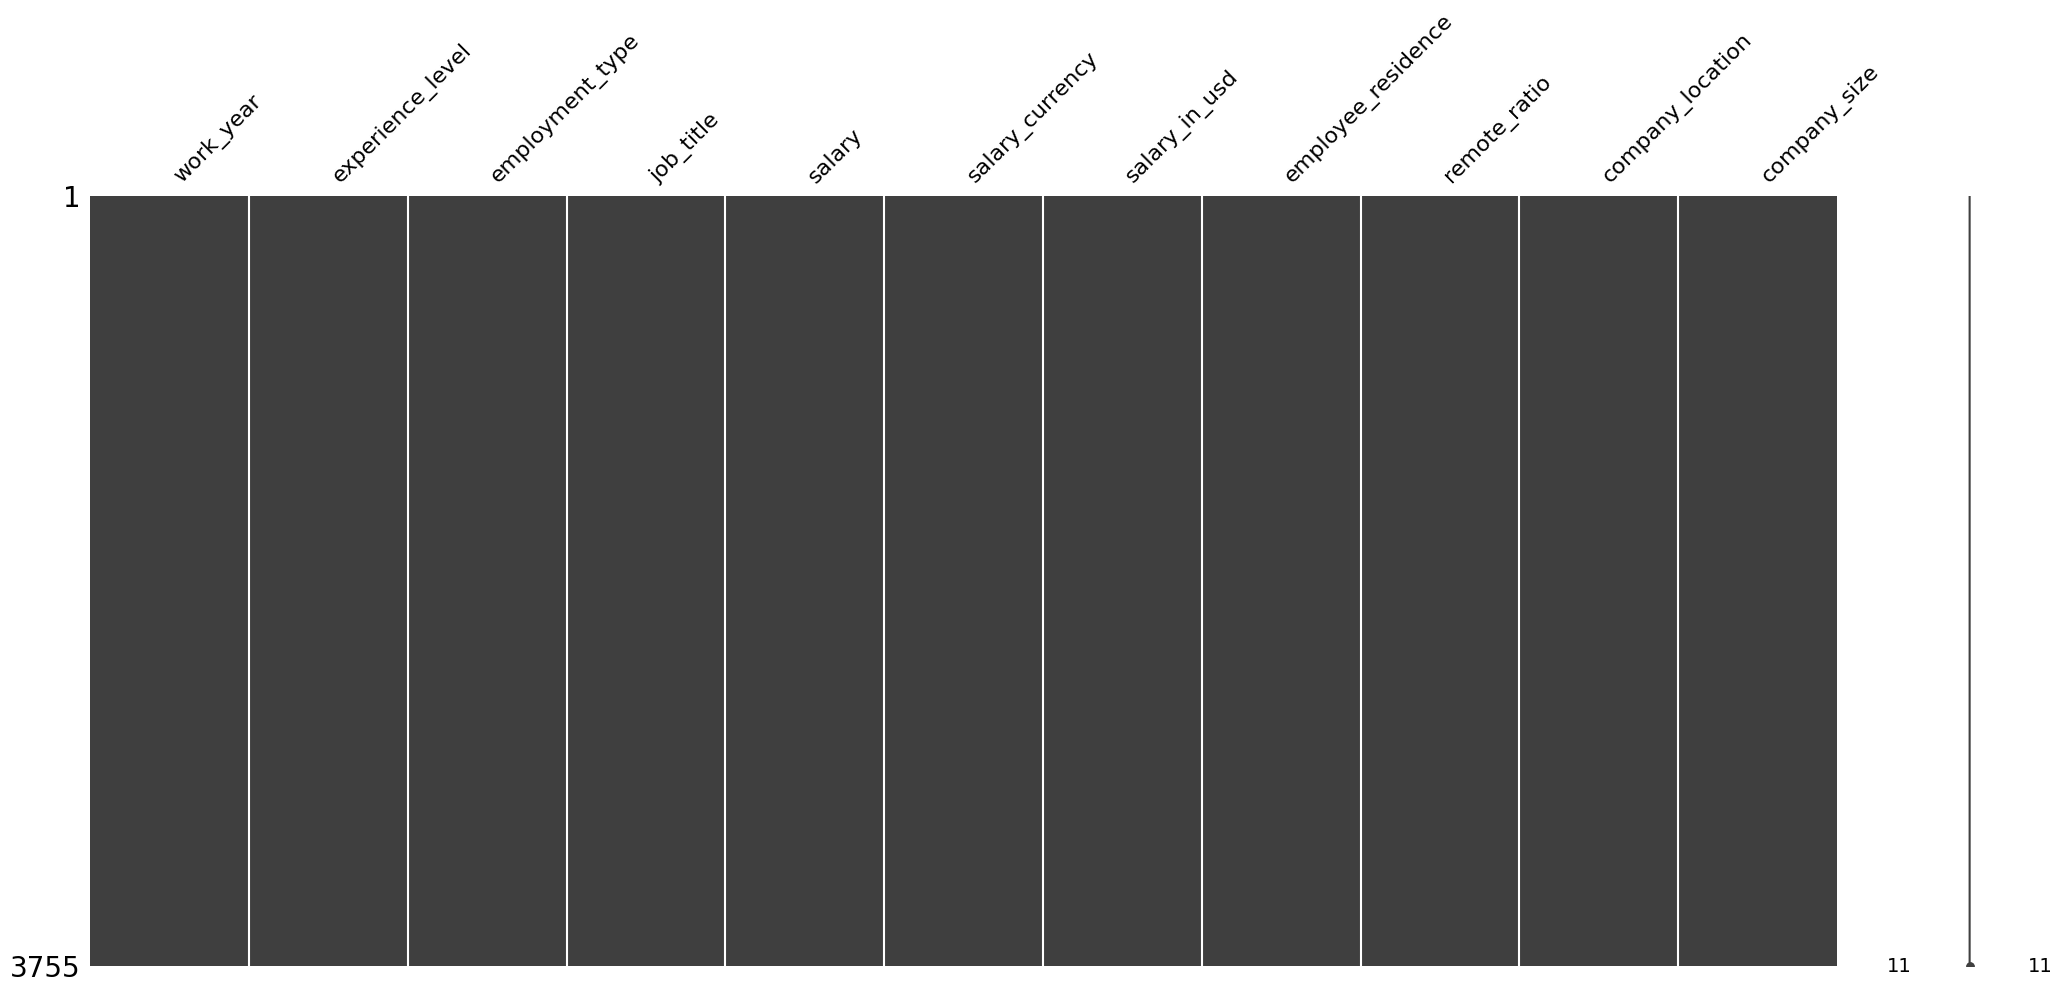

In [13]:
msno.matrix(df)

In [14]:
duplicateRows = df[df.duplicated()]
duplicateRows

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [15]:
df.drop_duplicates(inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


**Плотность распределения целевой переменной: 'salary_in_usd'**

In [16]:
target_name = 'salary_in_usd'

<Axes: ylabel='Density'>

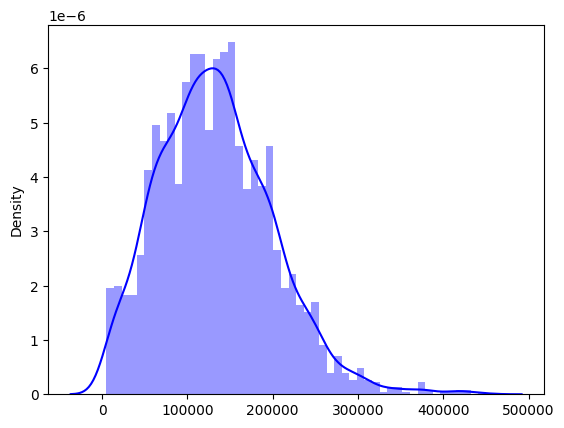

In [17]:
sns.distplot(df[target_name].values, bins=50, color='blue')

In [18]:
df1 = df.drop(columns=target_name)

Определим критериальные и числовые переменные

In [19]:
col_cat = df1.select_dtypes(include='object').columns
col_num = df1.select_dtypes(include='number').columns

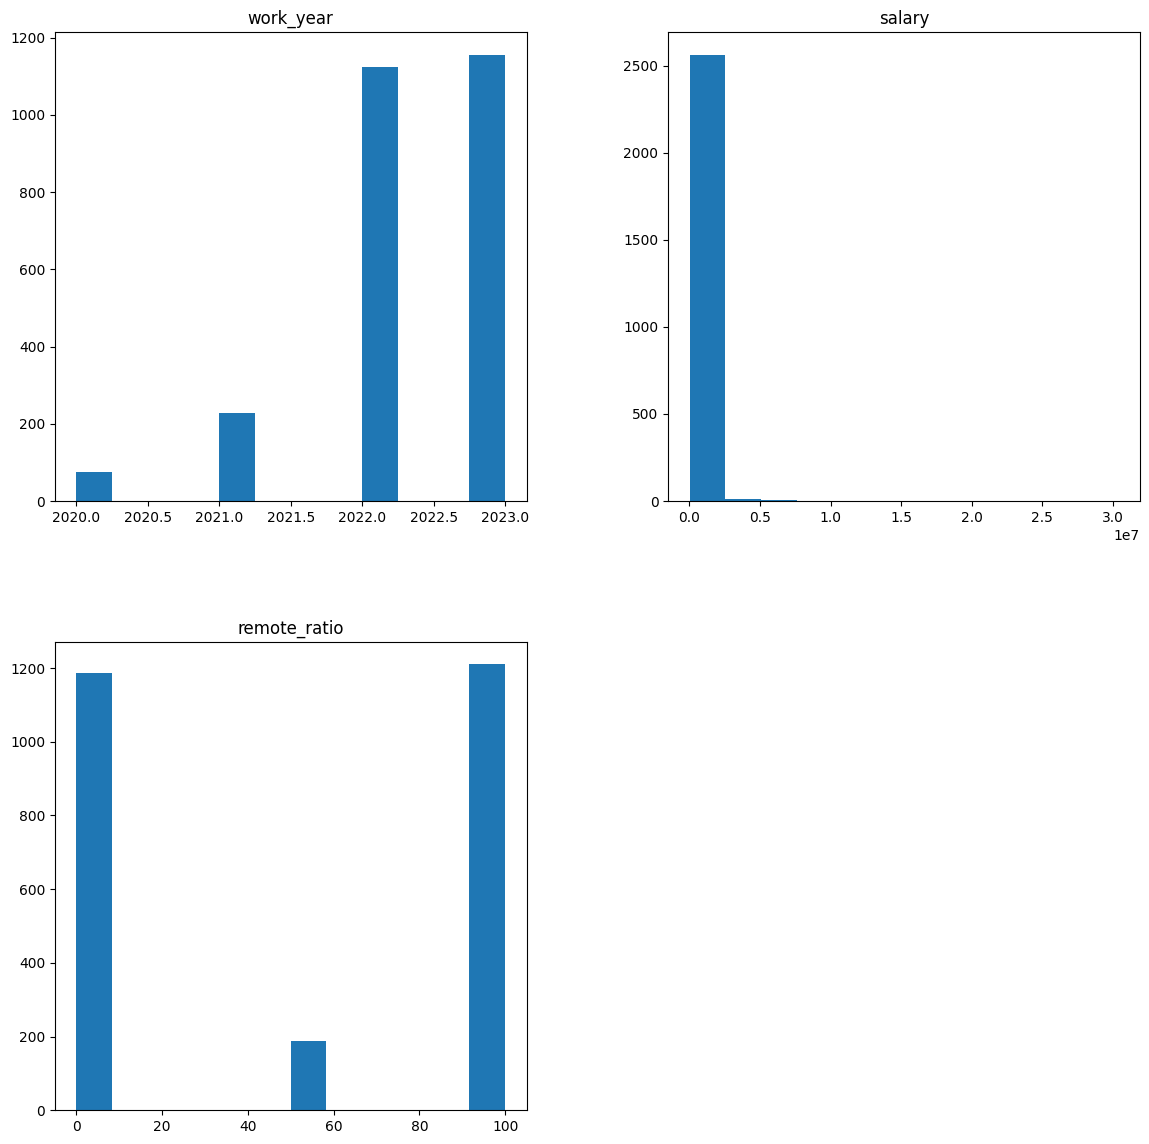

In [20]:
df[col_num].hist(figsize=(14, 14), bins=12, grid=False);

Визуализация категориальных переменных

Text(0.5, 1.0, 'Количество по employment_type')

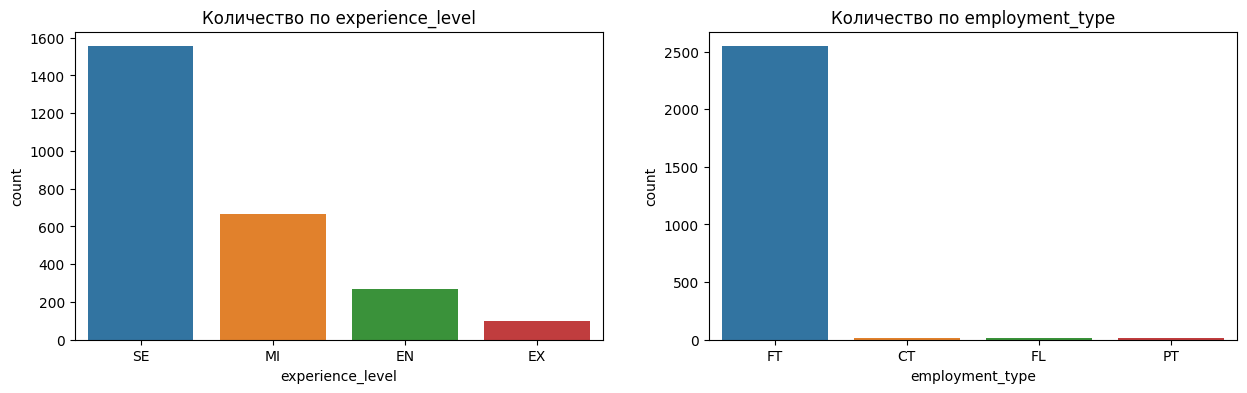

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
countplot = sns.countplot(data = df, x = 'experience_level', ax = axes[0])
countplot.set_title('Количество по experience_level')
countplot = sns.countplot(data = df, x = 'employment_type', ax = axes[1])
countplot.set_title('Количество по employment_type')

Text(0.5, 1.0, 'Количество по salary_currency')

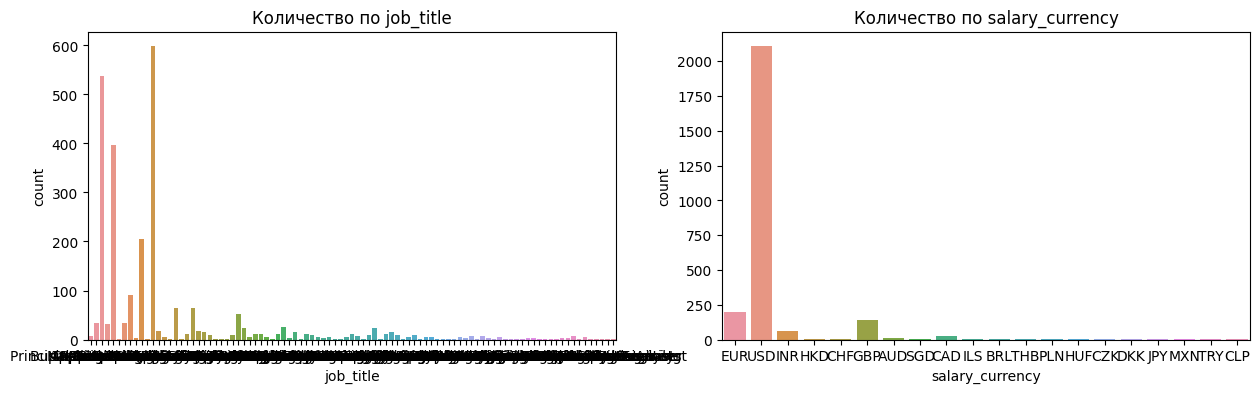

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
countplot = sns.countplot(data = df, x = 'job_title', ax = axes[0])
countplot.set_title('Количество по job_title')
countplot = sns.countplot(data = df, x = 'salary_currency', ax = axes[1])
countplot.set_title('Количество по salary_currency')

Text(0.5, 1.0, 'Количество по company_size')

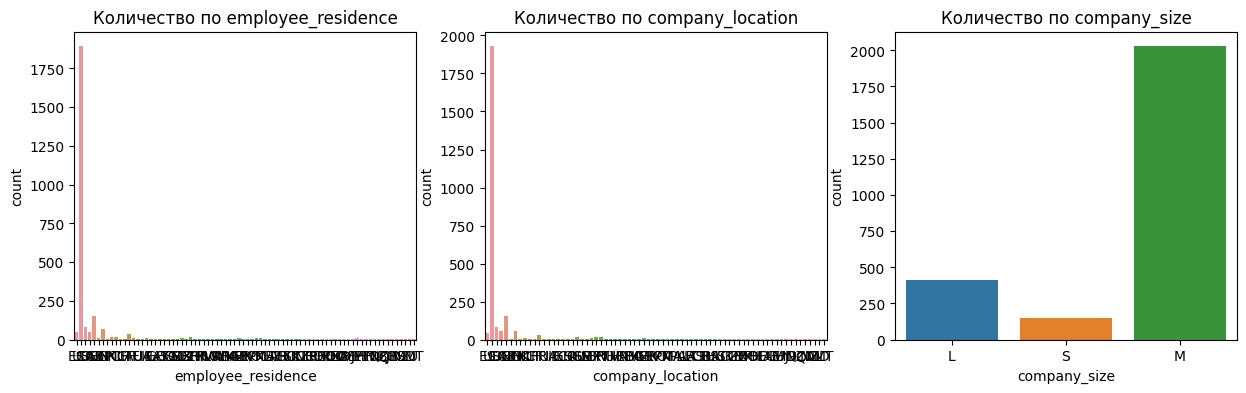

In [23]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 4))
countplot = sns.countplot(data = df, x = 'employee_residence', ax = axes[0])
countplot.set_title('Количество по employee_residence')
countplot = sns.countplot(data = df, x = 'company_location', ax = axes[1])
countplot.set_title('Количество по company_location')
countplot = sns.countplot(data = df, x = 'company_size', ax = axes[2])
countplot.set_title('Количество по company_size')

Применим one-hot-encoding к категориальным данным

In [24]:
df = pd.get_dummies(df, columns=col_cat)
df.head()

,work_year,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,2023,80000,85847,100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2023,30000,30000,100,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,2023,25500,25500,100,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,2023,175000,175000,100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2023,120000,120000,100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


Применим MinMaxScaler к числовым признакам

In [25]:
def get_scale(df,col_num, model):
    scal = model.fit_transform(df[col_num])
    df[col_num] = scal
    return df
df = get_scale(df, col_num, MinMaxScaler())

### Разобьем данные на train и test

In [26]:
X = df.drop(columns=target_name)
y = df[target_name]

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=13)

In [28]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape 

((1808, 277), (776, 277), (1808,), (776,))

### Применение алгоритмов и их оценка

#### Деревья решений

In [29]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [30]:
y_val_tree = dt.predict(X_val)

In [31]:
print("accuracy: %.3f" % metrics.accuracy_score(y_val, y_val_tree))
print("f1: %.3f" % metrics.f1_score(y_val, y_val_tree, average='macro'))
print("r2_score: %.3f" % metrics.r2_score(y_val, y_val_tree))
print("mean_squared_log_error: %.3f" % metrics.mean_squared_log_error(y_val, y_val_tree))

accuracy: 0.224
f1: 0.025
r2_score: 0.635
mean_squared_log_error: 0.265


Попробуем подобрать лучшие гиперпараметры

In [32]:
param_grid = {'max_depth': [x for x in range (3,21)]}
g = DecisionTreeClassifier(max_depth=1)

In [33]:
greed_search = GridSearchCV(estimator = g, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 5, return_train_score=True)

In [34]:
%%time
greed_search.fit(X_train, y_train);

print(greed_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ...max_depth=3;, score=(train=0.109, test=0.110) total time=   0.0s
[CV 2/5] END ...max_depth=3;, score=(train=0.111, test=0.105) total time=   0.0s
[CV 3/5] END ...max_depth=3;, score=(train=0.109, test=0.108) total time=   0.0s
[CV 4/5] END ...max_depth=3;, score=(train=0.109, test=0.111) total time=   0.0s
[CV 5/5] END ...max_depth=3;, score=(train=0.109, test=0.111) total time=   0.0s
[CV 1/5] END ...max_depth=4;, score=(train=0.150, test=0.155) total time=   0.0s
[CV 2/5] END ...max_depth=4;, score=(train=0.154, test=0.138) total time=   0.0s
[CV 3/5] END ...max_depth=4;, score=(train=0.152, test=0.146) total time=   0.0s
[CV 4/5] END ...max_depth=4;, score=(train=0.151, test=0.152) total time=   0.0s
[CV 5/5] END ...max_depth=4;, score=(train=0.150, test=0.155) total time=   0.0s
[CV 1/5] END ...max_depth=5;, score=(train=0.205, test=0.204) total time=   0.0s
[CV 2/5] END ...max_depth=5;, score=(train=0.209

Наилучшее качество при параметре 'max_depth': 20

In [35]:
dt = DecisionTreeClassifier(max_depth=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [36]:
y_val_tree = dt.predict(X_val)

In [37]:
print("accuracy: %.3f" % metrics.accuracy_score(y_val, y_val_tree))
print("f1: %.3f" % metrics.f1_score(y_val, y_val_tree, average='macro'))
print("r2_score: %.3f" % metrics.r2_score(y_val, y_val_tree))
print("mean_squared_log_error: %.3f" % metrics.mean_squared_log_error(y_val, y_val_tree))

accuracy: 0.604
f1: 0.256
r2_score: 0.887
mean_squared_log_error: 0.065


#### Ансамблевые методы

**Random Forest**

In [38]:
forest = RandomForestClassifier()

In [39]:
grid_space={'max_depth':[x for x in range (0,21,4)],
              'n_estimators':[x for x in range (50,201,50)],
              'max_features':[x for x in range (5,16,5)],
              'min_samples_leaf':[x for x in range (4)],
              'min_samples_split':[x for x in range (4)]
           }

In [40]:
%%time
greed_search = GridSearchCV(forest,param_grid=grid_space,cv=3,scoring='r2', verbose = 3, return_train_score=True)
model_greed_search = greed_search.fit(X_train, y_train)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits
[CV 1/3] END max_depth=0, max_features=5, min_samples_leaf=0, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=5, min_samples_leaf=0, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=5, min_samples_leaf=0, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=5, min_samples_leaf=0, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=5, min_samples_leaf=0, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=5, min_samples_leaf=0, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=5, mi

[CV 3/3] END max_depth=0, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, scor

[CV 3/3] END max_depth=0, max_features=5, min_samples_leaf=3, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=5, min_samples_leaf=3, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=5, min_samples_leaf=3, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=5, min_samples_leaf=3, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=5, min_samples_leaf=3, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=5, min_samples_leaf=3, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=5, min_samples_leaf=3, min_samples_split=0, n_estimators=150;, score

[CV 1/3] END max_depth=0, max_features=10, min_samples_leaf=0, min_samples_split=1, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=10, min_samples_leaf=0, min_samples_split=1, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=10, min_samples_leaf=0, min_samples_split=1, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=10, min_samples_leaf=0, min_samples_split=1, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=10, min_samples_leaf=0, min_samples_split=1, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=10, min_samples_leaf=0, min_samples_split=1, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=10, min_samples_leaf=0, min_samples_split=2, n_estimators=50;

[CV 3/3] END max_depth=0, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, 

[CV 2/3] END max_depth=0, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=10, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=10, min_samples_leaf=3, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=10, min_samples_leaf=3, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=10, min_samples_leaf=3, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=10, min_samples_leaf=3, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=10, min_samples_leaf=3, min_samples_split=0, n_estimators=100;, 

[CV 2/3] END max_depth=0, max_features=15, min_samples_leaf=0, min_samples_split=1, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=15, min_samples_leaf=0, min_samples_split=1, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=15, min_samples_leaf=0, min_samples_split=2, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=15, min_samples_leaf=0, min_samples_split=2, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=15, min_samples_leaf=0, min_samples_split=2, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=15, min_samples_leaf=0, min_samples_split=2, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=15, min_samples_leaf=0, min_samples_split=2, n_estimators=100;, 

[CV 1/3] END max_depth=0, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=50;

[CV 2/3] END max_depth=0, max_features=15, min_samples_leaf=2, min_samples_split=3, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=15, min_samples_leaf=2, min_samples_split=3, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=15, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=15, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=0, max_features=15, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=0, max_features=15, min_samples_leaf=3, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=0, max_features=15, min_samples_leaf=3, min_samples_split=0, n_estimators=50;,

[CV 2/3] END max_depth=4, max_features=5, min_samples_leaf=0, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=4, max_features=5, min_samples_leaf=0, min_samples_split=1, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=4, max_features=5, min_samples_leaf=0, min_samples_split=1, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=4, max_features=5, min_samples_leaf=0, min_samples_split=1, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=4, max_features=5, min_samples_leaf=0, min_samples_split=1, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=4, max_features=5, min_samples_leaf=0, min_samples_split=1, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=4, max_features=5, min_samples_leaf=0, min_samples_split=1, n_estimators=200;, scor

[CV 1/3] END max_depth=4, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.417, test=0.218) total time=   0.2s
[CV 2/3] END max_depth=4, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.431, test=0.285) total time=   0.2s
[CV 3/3] END max_depth=4, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.373, test=0.216) total time=   0.2s
[CV 1/3] END max_depth=4, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.506, test=0.277) total time=   0.4s
[CV 2/3] END max_depth=4, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.496, test=0.392) total time=   0.4s
[CV 3/3] END max_depth=4, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.481, test=0.420) total time=   0.4s
[CV 1/3] END max_depth=4, max_features=5, min_samples_leaf=1, min_samples_split=2, n_

[CV 2/3] END max_depth=4, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=(train=0.412, test=0.404) total time=   0.6s
[CV 3/3] END max_depth=4, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=(train=0.362, test=0.387) total time=   0.6s
[CV 1/3] END max_depth=4, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.392, test=0.313) total time=   0.8s
[CV 2/3] END max_depth=4, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.383, test=0.385) total time=   0.8s
[CV 3/3] END max_depth=4, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.351, test=0.350) total time=   0.8s
[CV 1/3] END max_depth=4, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=(train=0.261, test=0.152) total time=   0.2s
[CV 2/3] END max_depth=4, max_features=5, min_samples_leaf=2, min_samples_split=3, 

[CV 3/3] END max_depth=4, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=(train=-0.095, test=-0.096) total time=   0.1s
[CV 1/3] END max_depth=4, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=(train=0.367, test=0.277) total time=   0.4s
[CV 2/3] END max_depth=4, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=(train=0.359, test=0.358) total time=   0.5s
[CV 3/3] END max_depth=4, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=(train=0.308, test=0.334) total time=   0.4s
[CV 1/3] END max_depth=4, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=150;, score=(train=0.390, test=0.321) total time=   0.7s
[CV 2/3] END max_depth=4, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=150;, score=(train=0.381, test=0.402) total time=   0.6s
[CV 3/3] END max_depth=4, max_features=5, min_samples_leaf=3, min_samples_split=3

[CV 3/3] END max_depth=4, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=4, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=4, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=4, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=4, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=4, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=4, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=200

[CV 1/3] END max_depth=4, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.449, test=0.362) total time=   0.2s
[CV 2/3] END max_depth=4, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.355, test=0.300) total time=   0.2s
[CV 3/3] END max_depth=4, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.442, test=0.395) total time=   0.2s
[CV 1/3] END max_depth=4, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.433, test=0.333) total time=   0.4s
[CV 2/3] END max_depth=4, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.435, test=0.428) total time=   0.4s
[CV 3/3] END max_depth=4, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.399, test=0.389) total time=   0.5s
[CV 1/3] END max_depth=4, max_features=10, min_samples_leaf=2, min_samples_spli

[CV 1/3] END max_depth=4, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.416, test=0.334) total time=   0.7s
[CV 2/3] END max_depth=4, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.367, test=0.375) total time=   0.7s
[CV 3/3] END max_depth=4, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.350, test=0.351) total time=   0.7s
[CV 1/3] END max_depth=4, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.427, test=0.334) total time=   0.8s
[CV 2/3] END max_depth=4, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.329, test=0.358) total time=   0.8s
[CV 3/3] END max_depth=4, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.399, test=0.390) total time=   0.8s
[CV 1/3] END max_depth=4, max_features=10, min_samples_leaf=3, min_samples_s

[CV 1/3] END max_depth=4, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=4, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=4, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=4, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=4, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=4, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=4, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=200

[CV 1/3] END max_depth=4, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.488, test=0.349) total time=   0.2s
[CV 2/3] END max_depth=4, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.382, test=0.339) total time=   0.2s
[CV 3/3] END max_depth=4, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.453, test=0.414) total time=   0.2s
[CV 1/3] END max_depth=4, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.513, test=0.362) total time=   0.4s
[CV 2/3] END max_depth=4, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.447, test=0.380) total time=   0.4s
[CV 3/3] END max_depth=4, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.451, test=0.426) total time=   0.4s
[CV 1/3] END max_depth=4, max_features=15, min_samples_leaf=2, min_samples_spli

[CV 1/3] END max_depth=4, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.480, test=0.378) total time=   0.7s
[CV 2/3] END max_depth=4, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.411, test=0.411) total time=   0.8s
[CV 3/3] END max_depth=4, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.458, test=0.440) total time=   0.8s
[CV 1/3] END max_depth=4, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.475, test=0.386) total time=   0.9s
[CV 2/3] END max_depth=4, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.392, test=0.423) total time=   0.8s
[CV 3/3] END max_depth=4, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.410, test=0.406) total time=   1.0s
[CV 1/3] END max_depth=4, max_features=15, min_samples_leaf=3, min_samples_s

[CV 1/3] END max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(

[CV 1/3] END max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.483, test=0.352) total time=   0.2s
[CV 2/3] END max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.305, test=0.321) total time=   0.2s
[CV 3/3] END max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.429, test=0.258) total time=   0.2s
[CV 1/3] END max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.515, test=0.364) total time=   0.4s
[CV 2/3] END max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.428, test=0.366) total time=   0.4s
[CV 3/3] END max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.478, test=0.442) total time=   0.4s
[CV 1/3] END max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_

[CV 2/3] END max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.302, test=0.351) total time=   0.7s
[CV 3/3] END max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.357, test=0.365) total time=   0.8s
[CV 1/3] END max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.408, test=0.346) total time=   1.0s
[CV 2/3] END max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.355, test=0.379) total time=   0.8s
[CV 3/3] END max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.374, test=0.340) total time=   0.8s
[CV 1/3] END max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=(train=0.345, test=0.262) total time=   0.2s
[CV 2/3] END max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, 

[CV 2/3] END max_depth=8, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=8, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=8, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=8, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=8, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=8, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=8, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=200

[CV 1/3] END max_depth=8, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.591, test=0.439) total time=   0.2s
[CV 2/3] END max_depth=8, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.520, test=0.425) total time=   0.2s
[CV 3/3] END max_depth=8, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.595, test=0.514) total time=   0.2s
[CV 1/3] END max_depth=8, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.577, test=0.432) total time=   0.4s
[CV 2/3] END max_depth=8, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.564, test=0.435) total time=   0.4s
[CV 3/3] END max_depth=8, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.596, test=0.527) total time=   0.4s
[CV 1/3] END max_depth=8, max_features=10, min_samples_leaf=2, min_samples_spli

[CV 1/3] END max_depth=8, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.496, test=0.398) total time=   0.7s
[CV 2/3] END max_depth=8, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.479, test=0.419) total time=   0.8s
[CV 3/3] END max_depth=8, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.507, test=0.466) total time=   0.8s
[CV 1/3] END max_depth=8, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.508, test=0.417) total time=   1.0s
[CV 2/3] END max_depth=8, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.478, test=0.460) total time=   1.0s
[CV 3/3] END max_depth=8, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.494, test=0.453) total time=   0.9s
[CV 1/3] END max_depth=8, max_features=10, min_samples_leaf=3, min_samples_s

[CV 1/3] END max_depth=8, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=8, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=8, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=8, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=8, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=8, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=8, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=50;

[CV 1/3] END max_depth=8, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.558, test=0.424) total time=   0.2s
[CV 2/3] END max_depth=8, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.563, test=0.457) total time=   0.2s
[CV 3/3] END max_depth=8, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.662, test=0.562) total time=   0.2s
[CV 1/3] END max_depth=8, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.659, test=0.504) total time=   0.5s
[CV 2/3] END max_depth=8, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.562, test=0.508) total time=   0.5s
[CV 3/3] END max_depth=8, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.618, test=0.525) total time=   0.6s
[CV 1/3] END max_depth=8, max_features=15, min_samples_leaf=2, min_samples_spli

[CV 1/3] END max_depth=8, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.576, test=0.419) total time=   0.9s
[CV 2/3] END max_depth=8, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.613, test=0.517) total time=   0.8s
[CV 3/3] END max_depth=8, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.567, test=0.479) total time=   0.7s
[CV 1/3] END max_depth=8, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.573, test=0.412) total time=   0.9s
[CV 2/3] END max_depth=8, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.573, test=0.488) total time=   1.0s
[CV 3/3] END max_depth=8, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.585, test=0.531) total time=   1.0s
[CV 1/3] END max_depth=8, max_features=15, min_samples_leaf=3, min_samples_s

[CV 2/3] END max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=150;,

[CV 1/3] END max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.564, test=0.445) total time=   0.2s
[CV 2/3] END max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.467, test=0.361) total time=   0.2s
[CV 3/3] END max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.512, test=0.416) total time=   0.2s
[CV 1/3] END max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.546, test=0.350) total time=   0.4s
[CV 2/3] END max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.569, test=0.435) total time=   0.4s
[CV 3/3] END max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.539, test=0.413) total time=   0.4s
[CV 1/3] END max_depth=12, max_features=5, min_samples_leaf=2, min_samples_spli

[CV 1/3] END max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.397, test=0.281) total time=   0.6s
[CV 2/3] END max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.367, test=0.335) total time=   0.6s
[CV 3/3] END max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.334, test=0.372) total time=   0.6s
[CV 1/3] END max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.431, test=0.343) total time=   0.8s
[CV 2/3] END max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.354, test=0.391) total time=   0.8s
[CV 3/3] END max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.351, test=0.357) total time=   0.8s
[CV 1/3] END max_depth=12, max_features=5, min_samples_leaf=3, min_samples_s

[CV 2/3] END max_depth=12, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=12, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=12, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=12, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=12, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=12, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=12, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimat

[CV 1/3] END max_depth=12, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.628, test=0.399) total time=   0.2s
[CV 2/3] END max_depth=12, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.625, test=0.520) total time=   0.2s
[CV 3/3] END max_depth=12, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.739, test=0.604) total time=   0.2s
[CV 1/3] END max_depth=12, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.671, test=0.498) total time=   0.5s
[CV 2/3] END max_depth=12, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.668, test=0.534) total time=   0.5s
[CV 3/3] END max_depth=12, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.679, test=0.599) total time=   0.4s
[CV 1/3] END max_depth=12, max_features=10, min_samples_leaf=2, min_sampl

[CV 1/3] END max_depth=12, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.564, test=0.408) total time=   0.6s
[CV 2/3] END max_depth=12, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.539, test=0.484) total time=   0.6s
[CV 3/3] END max_depth=12, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.568, test=0.476) total time=   0.7s
[CV 1/3] END max_depth=12, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.541, test=0.435) total time=   0.9s
[CV 2/3] END max_depth=12, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.510, test=0.460) total time=   1.1s
[CV 3/3] END max_depth=12, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.569, test=0.484) total time=   1.0s
[CV 1/3] END max_depth=12, max_features=10, min_samples_leaf=3, min_sa

[CV 3/3] END max_depth=12, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=12, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=12, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=12, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=12, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=12, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=12, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimat

[CV 1/3] END max_depth=12, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.821, test=0.680) total time=   0.2s
[CV 2/3] END max_depth=12, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.757, test=0.614) total time=   0.2s
[CV 3/3] END max_depth=12, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.679, test=0.557) total time=   0.2s
[CV 1/3] END max_depth=12, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.727, test=0.527) total time=   0.5s
[CV 2/3] END max_depth=12, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.754, test=0.590) total time=   0.5s
[CV 3/3] END max_depth=12, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.723, test=0.546) total time=   0.5s
[CV 1/3] END max_depth=12, max_features=15, min_samples_leaf=2, min_sampl

[CV 1/3] END max_depth=12, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.657, test=0.519) total time=   1.0s
[CV 2/3] END max_depth=12, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.624, test=0.524) total time=   0.7s
[CV 3/3] END max_depth=12, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.638, test=0.539) total time=   0.7s
[CV 1/3] END max_depth=12, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.643, test=0.500) total time=   1.0s
[CV 2/3] END max_depth=12, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.621, test=0.518) total time=   1.0s
[CV 3/3] END max_depth=12, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.671, test=0.568) total time=   1.0s
[CV 1/3] END max_depth=12, max_features=15, min_samples_leaf=3, min_sa

[CV 3/3] END max_depth=16, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=16, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=16, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=16, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=16, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=16, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=16, max_features=5, min_samples_leaf=1, min_samples_split=0, n_estimators=150;

[CV 1/3] END max_depth=16, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.509, test=0.339) total time=   0.1s
[CV 2/3] END max_depth=16, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.482, test=0.358) total time=   0.2s
[CV 3/3] END max_depth=16, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.520, test=0.412) total time=   0.2s
[CV 1/3] END max_depth=16, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.573, test=0.411) total time=   0.4s
[CV 2/3] END max_depth=16, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.522, test=0.399) total time=   0.4s
[CV 3/3] END max_depth=16, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.545, test=0.432) total time=   0.4s
[CV 1/3] END max_depth=16, max_features=5, min_samples_leaf=2, min_samples_spli

[CV 1/3] END max_depth=16, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.446, test=0.372) total time=   0.6s
[CV 2/3] END max_depth=16, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.307, test=0.278) total time=   0.6s
[CV 3/3] END max_depth=16, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.359, test=0.387) total time=   0.6s
[CV 1/3] END max_depth=16, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.416, test=0.302) total time=   0.8s
[CV 2/3] END max_depth=16, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.305, test=0.306) total time=   1.0s
[CV 3/3] END max_depth=16, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.330, test=0.341) total time=   1.0s
[CV 1/3] END max_depth=16, max_features=5, min_samples_leaf=3, min_samples_s

[CV 3/3] END max_depth=16, max_features=10, min_samples_leaf=0, min_samples_split=3, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=16, max_features=10, min_samples_leaf=0, min_samples_split=3, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=16, max_features=10, min_samples_leaf=0, min_samples_split=3, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=16, max_features=10, min_samples_leaf=0, min_samples_split=3, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=16, max_features=10, min_samples_leaf=0, min_samples_split=3, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=16, max_features=10, min_samples_leaf=0, min_samples_split=3, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=16, max_features=10, min_samples_leaf=0, min_samples_split=3, n_estimat

[CV 3/3] END max_depth=16, max_features=10, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=(train=0.955, test=0.665) total time=   1.5s
[CV 1/3] END max_depth=16, max_features=10, min_samples_leaf=2, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=16, max_features=10, min_samples_leaf=2, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=16, max_features=10, min_samples_leaf=2, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=16, max_features=10, min_samples_leaf=2, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=16, max_features=10, min_samples_leaf=2, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=16, max_features=10, min_samples_leaf=2, min_samples_split=0, n_estima

[CV 1/3] END max_depth=16, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=(train=0.544, test=0.374) total time=   0.2s
[CV 2/3] END max_depth=16, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=(train=0.495, test=0.441) total time=   0.2s
[CV 3/3] END max_depth=16, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=(train=0.556, test=0.459) total time=   0.3s
[CV 1/3] END max_depth=16, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.599, test=0.456) total time=   0.5s
[CV 2/3] END max_depth=16, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.547, test=0.452) total time=   0.5s
[CV 3/3] END max_depth=16, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.611, test=0.517) total time=   0.5s
[CV 1/3] END max_depth=16, max_features=10, min_samples_leaf=3, min_sampl

[CV 3/3] END max_depth=16, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=16, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=16, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=16, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=16, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=16, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=16, max_features=15, min_samples_leaf=1, min_samples_split=0, n_estimat

[CV 1/3] END max_depth=16, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.829, test=0.617) total time=   0.2s
[CV 2/3] END max_depth=16, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.749, test=0.557) total time=   0.2s
[CV 3/3] END max_depth=16, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.823, test=0.590) total time=   0.2s
[CV 1/3] END max_depth=16, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.798, test=0.550) total time=   0.5s
[CV 2/3] END max_depth=16, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.810, test=0.664) total time=   0.6s
[CV 3/3] END max_depth=16, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.819, test=0.660) total time=   0.7s
[CV 1/3] END max_depth=16, max_features=15, min_samples_leaf=2, min_sampl

[CV 1/3] END max_depth=16, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.668, test=0.502) total time=   0.8s
[CV 2/3] END max_depth=16, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.678, test=0.556) total time=   0.8s
[CV 3/3] END max_depth=16, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.682, test=0.607) total time=   0.8s
[CV 1/3] END max_depth=16, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.716, test=0.588) total time=   1.0s
[CV 2/3] END max_depth=16, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.605, test=0.530) total time=   1.0s
[CV 3/3] END max_depth=16, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.689, test=0.587) total time=   1.2s
[CV 1/3] END max_depth=16, max_features=15, min_samples_leaf=3, min_sa

[CV 2/3] END max_depth=20, max_features=5, min_samples_leaf=0, min_samples_split=3, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=20, max_features=5, min_samples_leaf=0, min_samples_split=3, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=20, max_features=5, min_samples_leaf=0, min_samples_split=3, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=20, max_features=5, min_samples_leaf=0, min_samples_split=3, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=20, max_features=5, min_samples_leaf=0, min_samples_split=3, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=20, max_features=5, min_samples_leaf=0, min_samples_split=3, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=20, max_features=5, min_samples_leaf=0, min_samples_split=3, n_estimators=200

[CV 3/3] END max_depth=20, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=(train=0.994, test=0.694) total time=   1.5s
[CV 1/3] END max_depth=20, max_features=5, min_samples_leaf=2, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=20, max_features=5, min_samples_leaf=2, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=20, max_features=5, min_samples_leaf=2, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=20, max_features=5, min_samples_leaf=2, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=20, max_features=5, min_samples_leaf=2, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=20, max_features=5, min_samples_leaf=2, min_samples_split=0, n_estimators=10

[CV 1/3] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=(train=0.406, test=0.330) total time=   0.1s
[CV 2/3] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=(train=0.323, test=0.305) total time=   0.1s
[CV 3/3] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=(train=0.340, test=0.376) total time=   0.1s
[CV 1/3] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.407, test=0.338) total time=   0.4s
[CV 2/3] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.361, test=0.371) total time=   0.5s
[CV 3/3] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.404, test=0.413) total time=   0.5s
[CV 1/3] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_spli

[CV 3/3] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=0, n_estimato

[CV 1/3] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.733, test=0.527) total time=   0.2s
[CV 2/3] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.712, test=0.518) total time=   0.2s
[CV 3/3] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.752, test=0.565) total time=   0.2s
[CV 1/3] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.729, test=0.541) total time=   0.5s
[CV 2/3] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.749, test=0.579) total time=   0.5s
[CV 3/3] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.754, test=0.545) total time=   0.6s
[CV 1/3] END max_depth=20, max_features=10, min_samples_leaf=2, min_sampl

[CV 1/3] END max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.577, test=0.406) total time=   0.6s
[CV 2/3] END max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.528, test=0.476) total time=   0.7s
[CV 3/3] END max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.569, test=0.498) total time=   0.6s
[CV 1/3] END max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.551, test=0.415) total time=   0.9s
[CV 2/3] END max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.553, test=0.481) total time=   1.0s
[CV 3/3] END max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.548, test=0.489) total time=   1.1s
[CV 1/3] END max_depth=20, max_features=10, min_samples_leaf=3, min_sa

[CV 3/3] END max_depth=20, max_features=15, min_samples_leaf=0, min_samples_split=3, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=20, max_features=15, min_samples_leaf=0, min_samples_split=3, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=20, max_features=15, min_samples_leaf=0, min_samples_split=3, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=20, max_features=15, min_samples_leaf=0, min_samples_split=3, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=20, max_features=15, min_samples_leaf=0, min_samples_split=3, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=20, max_features=15, min_samples_leaf=0, min_samples_split=3, n_estimators=150;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=20, max_features=15, min_samples_leaf=0, min_samples_split=3, n_estimato

[CV 3/3] END max_depth=20, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=150;, score=(train=0.997, test=0.780) total time=   1.5s
[CV 1/3] END max_depth=20, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=(train=0.991, test=0.662) total time=   1.9s
[CV 2/3] END max_depth=20, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=(train=0.989, test=0.773) total time=   2.1s
[CV 3/3] END max_depth=20, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=(train=0.996, test=0.769) total time=   2.2s
[CV 1/3] END max_depth=20, max_features=15, min_samples_leaf=2, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=20, max_features=15, min_samples_leaf=2, min_samples_split=0, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=20, max_features=15, min_samples_leaf=2, min_samples_spli

[CV 1/3] END max_depth=20, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=(train=0.637, test=0.508) total time=   0.2s
[CV 2/3] END max_depth=20, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=(train=0.625, test=0.530) total time=   0.2s
[CV 3/3] END max_depth=20, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=(train=0.650, test=0.581) total time=   0.2s
[CV 1/3] END max_depth=20, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.658, test=0.528) total time=   0.5s
[CV 2/3] END max_depth=20, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.631, test=0.562) total time=   0.5s
[CV 3/3] END max_depth=20, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.719, test=0.625) total time=   0.5s
[CV 1/3] END max_depth=20, max_features=15, min_samples_leaf=3, min_sampl

In [41]:
print(f'Лучшие параметры: {model_greed_search.best_params_}')
print(f'Best score is: {model_greed_search.best_score_}')

Лучшие параметры: {'max_depth': 20, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}
Best score is: 0.7557572889021748


Проверим результаты на валидационной части датасета

In [53]:
forest_val = RandomForestClassifier(max_depth=20, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=150)

In [54]:
model_greed_search_val = forest_val.fit(X_train, y_train)

In [55]:
y_val_forest = model_greed_search_val.predict(X_val)

In [56]:
print("accuracy: %.3f" % metrics.accuracy_score(y_val, y_val_forest))
print("f1_macro: %.3f" % metrics.f1_score(y_val, y_val_forest, average='macro'))
print("r2_score: %.3f" % metrics.r2_score(y_val, y_val_forest))
print("mean_squared_log_error: %.3f" % metrics.mean_squared_log_error(y_val, y_val_forest))

accuracy: 0.088
f1_macro: 0.011
r2_score: 0.755
mean_squared_log_error: 0.090


**CatBoost**

In [57]:
model_cat = catb.CatBoostClassifier()

In [58]:
#максимально уменьшим количество компонент, для ускорения работы модели
grid = {'learning_rate': [0.05, 0.1],
        'depth': [4, 6],
        'l2_leaf_reg': [3, 5]}

In [59]:
%%time
grid = GridSearchCV(model_cat,param_grid=grid,cv=2,scoring='r2', verbose = 2, return_train_score=True)
model_grid = grid.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
0:	learn: 6.2705093	total: 486ms	remaining: 8m 5s
1:	learn: 6.2471937	total: 1.02s	remaining: 8m 28s
2:	learn: 6.2214303	total: 1.57s	remaining: 8m 41s
3:	learn: 6.1856270	total: 2.09s	remaining: 8m 40s
4:	learn: 6.1588586	total: 2.57s	remaining: 8m 30s
5:	learn: 6.1355682	total: 3.08s	remaining: 8m 30s
6:	learn: 6.1107475	total: 3.74s	remaining: 8m 50s
7:	learn: 6.0860462	total: 4.34s	remaining: 8m 57s
8:	learn: 6.0664726	total: 4.86s	remaining: 8m 55s
9:	learn: 6.0474871	total: 5.33s	remaining: 8m 48s
10:	learn: 6.0089751	total: 5.82s	remaining: 8m 43s
11:	learn: 5.9906744	total: 6.38s	remaining: 8m 45s
12:	learn: 5.9526346	total: 6.93s	remaining: 8m 46s
13:	learn: 5.9356842	total: 7.38s	remaining: 8m 39s
14:	learn: 5.9202713	total: 7.78s	remaining: 8m 30s
15:	learn: 5.8970706	total: 8.33s	remaining: 8m 32s
16:	learn: 5.8845219	total: 8.75s	remaining: 8m 26s
17:	learn: 5.8726288	total: 9.19s	remaining: 8m 21s
18:	learn: 5.85

156:	learn: 4.5263900	total: 1m 20s	remaining: 7m 14s
157:	learn: 4.5259733	total: 1m 21s	remaining: 7m 13s
158:	learn: 4.5230303	total: 1m 21s	remaining: 7m 12s
159:	learn: 4.5113716	total: 1m 22s	remaining: 7m 11s
160:	learn: 4.5110404	total: 1m 22s	remaining: 7m 10s
161:	learn: 4.4952886	total: 1m 23s	remaining: 7m 10s
162:	learn: 4.4862821	total: 1m 23s	remaining: 7m 10s
163:	learn: 4.4832915	total: 1m 24s	remaining: 7m 9s
164:	learn: 4.4717586	total: 1m 24s	remaining: 7m 9s
165:	learn: 4.4683604	total: 1m 25s	remaining: 7m 9s
166:	learn: 4.4603354	total: 1m 25s	remaining: 7m 8s
167:	learn: 4.4531977	total: 1m 26s	remaining: 7m 8s
168:	learn: 4.4454426	total: 1m 27s	remaining: 7m 8s
169:	learn: 4.4401911	total: 1m 27s	remaining: 7m 7s
170:	learn: 4.4378591	total: 1m 28s	remaining: 7m 6s
171:	learn: 4.4305559	total: 1m 28s	remaining: 7m 6s
172:	learn: 4.4233635	total: 1m 29s	remaining: 7m 5s
173:	learn: 4.4208162	total: 1m 29s	remaining: 7m 4s
174:	learn: 4.4104573	total: 1m 29s	rem

310:	learn: 3.9250643	total: 2m 31s	remaining: 5m 36s
311:	learn: 3.9247714	total: 2m 32s	remaining: 5m 36s
312:	learn: 3.9245060	total: 2m 32s	remaining: 5m 35s
313:	learn: 3.9167289	total: 2m 33s	remaining: 5m 34s
314:	learn: 3.9164608	total: 2m 33s	remaining: 5m 34s
315:	learn: 3.9156104	total: 2m 34s	remaining: 5m 33s
316:	learn: 3.9154129	total: 2m 34s	remaining: 5m 32s
317:	learn: 3.9122670	total: 2m 34s	remaining: 5m 32s
318:	learn: 3.9120848	total: 2m 35s	remaining: 5m 31s
319:	learn: 3.9053060	total: 2m 35s	remaining: 5m 31s
320:	learn: 3.9032481	total: 2m 36s	remaining: 5m 30s
321:	learn: 3.8987131	total: 2m 36s	remaining: 5m 29s
322:	learn: 3.8923755	total: 2m 37s	remaining: 5m 29s
323:	learn: 3.8920764	total: 2m 37s	remaining: 5m 28s
324:	learn: 3.8841835	total: 2m 37s	remaining: 5m 28s
325:	learn: 3.8796069	total: 2m 38s	remaining: 5m 27s
326:	learn: 3.8792846	total: 2m 38s	remaining: 5m 26s
327:	learn: 3.8748106	total: 2m 39s	remaining: 5m 26s
328:	learn: 3.8720453	total:

463:	learn: 3.5089257	total: 3m 41s	remaining: 4m 15s
464:	learn: 3.5067257	total: 3m 41s	remaining: 4m 15s
465:	learn: 3.5064701	total: 3m 42s	remaining: 4m 14s
466:	learn: 3.5023697	total: 3m 42s	remaining: 4m 14s
467:	learn: 3.5004727	total: 3m 43s	remaining: 4m 13s
468:	learn: 3.4975274	total: 3m 43s	remaining: 4m 12s
469:	learn: 3.4932417	total: 3m 43s	remaining: 4m 12s
470:	learn: 3.4914029	total: 3m 44s	remaining: 4m 11s
471:	learn: 3.4878844	total: 3m 44s	remaining: 4m 11s
472:	learn: 3.4825526	total: 3m 45s	remaining: 4m 11s
473:	learn: 3.4823698	total: 3m 45s	remaining: 4m 10s
474:	learn: 3.4821330	total: 3m 46s	remaining: 4m 9s
475:	learn: 3.4816778	total: 3m 46s	remaining: 4m 9s
476:	learn: 3.4775062	total: 3m 47s	remaining: 4m 9s
477:	learn: 3.4745025	total: 3m 47s	remaining: 4m 8s
478:	learn: 3.4742593	total: 3m 48s	remaining: 4m 8s
479:	learn: 3.4732814	total: 3m 48s	remaining: 4m 7s
480:	learn: 3.4699737	total: 3m 49s	remaining: 4m 7s
481:	learn: 3.4694908	total: 3m 49s

617:	learn: 3.1618153	total: 4m 51s	remaining: 3m
618:	learn: 3.1594049	total: 4m 52s	remaining: 2m 59s
619:	learn: 3.1562981	total: 4m 52s	remaining: 2m 59s
620:	learn: 3.1523111	total: 4m 53s	remaining: 2m 59s
621:	learn: 3.1513766	total: 4m 53s	remaining: 2m 58s
622:	learn: 3.1474073	total: 4m 54s	remaining: 2m 58s
623:	learn: 3.1440261	total: 4m 54s	remaining: 2m 57s
624:	learn: 3.1438304	total: 4m 55s	remaining: 2m 57s
625:	learn: 3.1436762	total: 4m 55s	remaining: 2m 56s
626:	learn: 3.1399618	total: 4m 56s	remaining: 2m 56s
627:	learn: 3.1370463	total: 4m 56s	remaining: 2m 55s
628:	learn: 3.1346391	total: 4m 57s	remaining: 2m 55s
629:	learn: 3.1304663	total: 4m 57s	remaining: 2m 54s
630:	learn: 3.1264591	total: 4m 58s	remaining: 2m 54s
631:	learn: 3.1236094	total: 4m 58s	remaining: 2m 53s
632:	learn: 3.1198655	total: 4m 58s	remaining: 2m 53s
633:	learn: 3.1197240	total: 4m 59s	remaining: 2m 52s
634:	learn: 3.1173927	total: 4m 59s	remaining: 2m 52s
635:	learn: 3.1136478	total: 5m	

771:	learn: 2.8224903	total: 6m 3s	remaining: 1m 47s
772:	learn: 2.8180897	total: 6m 3s	remaining: 1m 46s
773:	learn: 2.8155425	total: 6m 4s	remaining: 1m 46s
774:	learn: 2.8122899	total: 6m 4s	remaining: 1m 45s
775:	learn: 2.8109130	total: 6m 4s	remaining: 1m 45s
776:	learn: 2.8107213	total: 6m 5s	remaining: 1m 44s
777:	learn: 2.8103593	total: 6m 5s	remaining: 1m 44s
778:	learn: 2.8101928	total: 6m 6s	remaining: 1m 43s
779:	learn: 2.8076289	total: 6m 6s	remaining: 1m 43s
780:	learn: 2.8049123	total: 6m 7s	remaining: 1m 42s
781:	learn: 2.8020326	total: 6m 7s	remaining: 1m 42s
782:	learn: 2.7992429	total: 6m 7s	remaining: 1m 41s
783:	learn: 2.7969129	total: 6m 8s	remaining: 1m 41s
784:	learn: 2.7928299	total: 6m 8s	remaining: 1m 41s
785:	learn: 2.7883507	total: 6m 9s	remaining: 1m 40s
786:	learn: 2.7855099	total: 6m 9s	remaining: 1m 40s
787:	learn: 2.7832736	total: 6m 10s	remaining: 1m 39s
788:	learn: 2.7801164	total: 6m 10s	remaining: 1m 39s
789:	learn: 2.7797966	total: 6m 11s	remainin

926:	learn: 2.5361350	total: 7m 14s	remaining: 34.2s
927:	learn: 2.5338390	total: 7m 14s	remaining: 33.7s
928:	learn: 2.5311108	total: 7m 15s	remaining: 33.3s
929:	learn: 2.5298534	total: 7m 15s	remaining: 32.8s
930:	learn: 2.5285252	total: 7m 16s	remaining: 32.3s
931:	learn: 2.5270800	total: 7m 16s	remaining: 31.9s
932:	learn: 2.5256420	total: 7m 17s	remaining: 31.4s
933:	learn: 2.5252933	total: 7m 17s	remaining: 30.9s
934:	learn: 2.5250132	total: 7m 18s	remaining: 30.5s
935:	learn: 2.5248603	total: 7m 18s	remaining: 30s
936:	learn: 2.5245774	total: 7m 19s	remaining: 29.5s
937:	learn: 2.5227297	total: 7m 19s	remaining: 29.1s
938:	learn: 2.5205547	total: 7m 20s	remaining: 28.6s
939:	learn: 2.5167631	total: 7m 20s	remaining: 28.1s
940:	learn: 2.5165701	total: 7m 20s	remaining: 27.6s
941:	learn: 2.5136688	total: 7m 21s	remaining: 27.2s
942:	learn: 2.5135101	total: 7m 21s	remaining: 26.7s
943:	learn: 2.5107583	total: 7m 22s	remaining: 26.2s
944:	learn: 2.5078904	total: 7m 22s	remaining: 2

82:	learn: 4.9443990	total: 44.9s	remaining: 8m 16s
83:	learn: 4.9359780	total: 45.3s	remaining: 8m 14s
84:	learn: 4.9265280	total: 45.7s	remaining: 8m 12s
85:	learn: 4.9161096	total: 46.3s	remaining: 8m 11s
86:	learn: 4.9052577	total: 46.7s	remaining: 8m 10s
87:	learn: 4.8972446	total: 47.2s	remaining: 8m 8s
88:	learn: 4.8901265	total: 47.7s	remaining: 8m 7s
89:	learn: 4.8805264	total: 48.1s	remaining: 8m 6s
90:	learn: 4.8724809	total: 48.5s	remaining: 8m 4s
91:	learn: 4.8633717	total: 49s	remaining: 8m 3s
92:	learn: 4.8562544	total: 49.5s	remaining: 8m 2s
93:	learn: 4.8507548	total: 49.9s	remaining: 8m
94:	learn: 4.8405925	total: 50.4s	remaining: 7m 59s
95:	learn: 4.8261102	total: 50.8s	remaining: 7m 58s
96:	learn: 4.8144855	total: 51.3s	remaining: 7m 57s
97:	learn: 4.8041358	total: 51.9s	remaining: 7m 57s
98:	learn: 4.8033917	total: 52.2s	remaining: 7m 55s
99:	learn: 4.7970761	total: 52.7s	remaining: 7m 54s
100:	learn: 4.7897760	total: 53.2s	remaining: 7m 53s
101:	learn: 4.7869953	t

236:	learn: 4.1094314	total: 1m 59s	remaining: 6m 25s
237:	learn: 4.1092063	total: 2m	remaining: 6m 24s
238:	learn: 4.1054724	total: 2m	remaining: 6m 23s
239:	learn: 4.1000102	total: 2m	remaining: 6m 23s
240:	learn: 4.0929697	total: 2m 1s	remaining: 6m 22s
241:	learn: 4.0927087	total: 2m 1s	remaining: 6m 21s
242:	learn: 4.0872559	total: 2m 2s	remaining: 6m 21s
243:	learn: 4.0819395	total: 2m 2s	remaining: 6m 20s
244:	learn: 4.0731385	total: 2m 3s	remaining: 6m 20s
245:	learn: 4.0677596	total: 2m 4s	remaining: 6m 20s
246:	learn: 4.0675658	total: 2m 4s	remaining: 6m 19s
247:	learn: 4.0642239	total: 2m 4s	remaining: 6m 18s
248:	learn: 4.0639919	total: 2m 5s	remaining: 6m 17s
249:	learn: 4.0600459	total: 2m 5s	remaining: 6m 16s
250:	learn: 4.0576742	total: 2m 5s	remaining: 6m 15s
251:	learn: 4.0575126	total: 2m 6s	remaining: 6m 15s
252:	learn: 4.0521349	total: 2m 6s	remaining: 6m 14s
253:	learn: 4.0470001	total: 2m 7s	remaining: 6m 13s
254:	learn: 4.0460268	total: 2m 7s	remaining: 6m 12s
2

390:	learn: 3.6581799	total: 3m 5s	remaining: 4m 48s
391:	learn: 3.6542716	total: 3m 5s	remaining: 4m 48s
392:	learn: 3.6538252	total: 3m 6s	remaining: 4m 47s
393:	learn: 3.6500121	total: 3m 6s	remaining: 4m 47s
394:	learn: 3.6449543	total: 3m 7s	remaining: 4m 46s
395:	learn: 3.6412107	total: 3m 7s	remaining: 4m 46s
396:	learn: 3.6389582	total: 3m 8s	remaining: 4m 45s
397:	learn: 3.6388015	total: 3m 8s	remaining: 4m 45s
398:	learn: 3.6342627	total: 3m 8s	remaining: 4m 44s
399:	learn: 3.6339028	total: 3m 9s	remaining: 4m 44s
400:	learn: 3.6288912	total: 3m 9s	remaining: 4m 43s
401:	learn: 3.6254601	total: 3m 10s	remaining: 4m 42s
402:	learn: 3.6210225	total: 3m 10s	remaining: 4m 42s
403:	learn: 3.6208700	total: 3m 11s	remaining: 4m 41s
404:	learn: 3.6156703	total: 3m 11s	remaining: 4m 41s
405:	learn: 3.6114706	total: 3m 11s	remaining: 4m 40s
406:	learn: 3.6068107	total: 3m 12s	remaining: 4m 40s
407:	learn: 3.6063798	total: 3m 12s	remaining: 4m 39s
408:	learn: 3.6031008	total: 3m 13s	rem

543:	learn: 3.2975041	total: 4m 12s	remaining: 3m 31s
544:	learn: 3.2963333	total: 4m 12s	remaining: 3m 30s
545:	learn: 3.2943564	total: 4m 13s	remaining: 3m 30s
546:	learn: 3.2941223	total: 4m 13s	remaining: 3m 29s
547:	learn: 3.2907485	total: 4m 13s	remaining: 3m 29s
548:	learn: 3.2881477	total: 4m 14s	remaining: 3m 28s
549:	learn: 3.2840493	total: 4m 14s	remaining: 3m 28s
550:	learn: 3.2808721	total: 4m 15s	remaining: 3m 27s
551:	learn: 3.2806234	total: 4m 15s	remaining: 3m 27s
552:	learn: 3.2784626	total: 4m 15s	remaining: 3m 26s
553:	learn: 3.2758677	total: 4m 16s	remaining: 3m 26s
554:	learn: 3.2757255	total: 4m 16s	remaining: 3m 25s
555:	learn: 3.2744689	total: 4m 17s	remaining: 3m 25s
556:	learn: 3.2709994	total: 4m 17s	remaining: 3m 24s
557:	learn: 3.2686503	total: 4m 17s	remaining: 3m 24s
558:	learn: 3.2667251	total: 4m 18s	remaining: 3m 23s
559:	learn: 3.2635384	total: 4m 18s	remaining: 3m 23s
560:	learn: 3.2600923	total: 4m 19s	remaining: 3m 22s
561:	learn: 3.2567109	total:

696:	learn: 2.9914423	total: 5m 15s	remaining: 2m 17s
697:	learn: 2.9913066	total: 5m 16s	remaining: 2m 16s
698:	learn: 2.9907007	total: 5m 16s	remaining: 2m 16s
699:	learn: 2.9884208	total: 5m 17s	remaining: 2m 15s
700:	learn: 2.9882607	total: 5m 17s	remaining: 2m 15s
701:	learn: 2.9877830	total: 5m 17s	remaining: 2m 14s
702:	learn: 2.9846466	total: 5m 18s	remaining: 2m 14s
703:	learn: 2.9800905	total: 5m 18s	remaining: 2m 13s
704:	learn: 2.9779568	total: 5m 19s	remaining: 2m 13s
705:	learn: 2.9777891	total: 5m 19s	remaining: 2m 13s
706:	learn: 2.9745364	total: 5m 19s	remaining: 2m 12s
707:	learn: 2.9731907	total: 5m 20s	remaining: 2m 12s
708:	learn: 2.9729508	total: 5m 20s	remaining: 2m 11s
709:	learn: 2.9698646	total: 5m 20s	remaining: 2m 11s
710:	learn: 2.9697215	total: 5m 21s	remaining: 2m 10s
711:	learn: 2.9695116	total: 5m 21s	remaining: 2m 10s
712:	learn: 2.9655202	total: 5m 22s	remaining: 2m 9s
713:	learn: 2.9625392	total: 5m 22s	remaining: 2m 9s
714:	learn: 2.9623539	total: 5

849:	learn: 2.7353018	total: 6m 19s	remaining: 1m 6s
850:	learn: 2.7338013	total: 6m 19s	remaining: 1m 6s
851:	learn: 2.7306818	total: 6m 20s	remaining: 1m 6s
852:	learn: 2.7297267	total: 6m 20s	remaining: 1m 5s
853:	learn: 2.7272457	total: 6m 21s	remaining: 1m 5s
854:	learn: 2.7238138	total: 6m 21s	remaining: 1m 4s
855:	learn: 2.7216913	total: 6m 22s	remaining: 1m 4s
856:	learn: 2.7195722	total: 6m 22s	remaining: 1m 3s
857:	learn: 2.7182386	total: 6m 22s	remaining: 1m 3s
858:	learn: 2.7158684	total: 6m 23s	remaining: 1m 2s
859:	learn: 2.7124268	total: 6m 23s	remaining: 1m 2s
860:	learn: 2.7103259	total: 6m 24s	remaining: 1m 2s
861:	learn: 2.7086273	total: 6m 24s	remaining: 1m 1s
862:	learn: 2.7067835	total: 6m 24s	remaining: 1m 1s
863:	learn: 2.7066321	total: 6m 25s	remaining: 1m
864:	learn: 2.7040213	total: 6m 25s	remaining: 1m
865:	learn: 2.7037782	total: 6m 26s	remaining: 59.7s
866:	learn: 2.7020466	total: 6m 26s	remaining: 59.3s
867:	learn: 2.7019104	total: 6m 26s	remaining: 58.8s

4:	learn: 6.0187845	total: 2.67s	remaining: 8m 50s
5:	learn: 5.9808538	total: 3.09s	remaining: 8m 32s
6:	learn: 5.9396755	total: 3.63s	remaining: 8m 35s
7:	learn: 5.9007808	total: 4.25s	remaining: 8m 46s
8:	learn: 5.8702916	total: 4.76s	remaining: 8m 44s
9:	learn: 5.8420423	total: 5.25s	remaining: 8m 39s
10:	learn: 5.7833129	total: 5.77s	remaining: 8m 38s
11:	learn: 5.7593369	total: 6.34s	remaining: 8m 42s
12:	learn: 5.7018555	total: 6.9s	remaining: 8m 44s
13:	learn: 5.6812545	total: 7.42s	remaining: 8m 42s
14:	learn: 5.6637022	total: 7.95s	remaining: 8m 42s
15:	learn: 5.6268732	total: 8.53s	remaining: 8m 44s
16:	learn: 5.6158324	total: 8.97s	remaining: 8m 38s
17:	learn: 5.6047265	total: 9.44s	remaining: 8m 34s
18:	learn: 5.5852309	total: 9.94s	remaining: 8m 33s
19:	learn: 5.5480016	total: 10.5s	remaining: 8m 36s
20:	learn: 5.5174355	total: 11s	remaining: 8m 32s
21:	learn: 5.4783415	total: 11.5s	remaining: 8m 31s
22:	learn: 5.4653753	total: 12s	remaining: 8m 29s
23:	learn: 5.4323952	to

162:	learn: 3.9267915	total: 1m 22s	remaining: 7m 1s
163:	learn: 3.9183908	total: 1m 22s	remaining: 7m 1s
164:	learn: 3.9057322	total: 1m 23s	remaining: 7m
165:	learn: 3.9035297	total: 1m 23s	remaining: 6m 59s
166:	learn: 3.8920591	total: 1m 24s	remaining: 6m 59s
167:	learn: 3.8800863	total: 1m 24s	remaining: 6m 59s
168:	learn: 3.8792764	total: 1m 25s	remaining: 6m 58s
169:	learn: 3.8670306	total: 1m 25s	remaining: 6m 58s
170:	learn: 3.8663881	total: 1m 26s	remaining: 6m 57s
171:	learn: 3.8591831	total: 1m 26s	remaining: 6m 56s
172:	learn: 3.8507250	total: 1m 27s	remaining: 6m 56s
173:	learn: 3.8328448	total: 1m 27s	remaining: 6m 56s
174:	learn: 3.8226564	total: 1m 28s	remaining: 6m 55s
175:	learn: 3.8120137	total: 1m 28s	remaining: 6m 54s
176:	learn: 3.8059232	total: 1m 28s	remaining: 6m 53s
177:	learn: 3.7979817	total: 1m 29s	remaining: 6m 53s
178:	learn: 3.7975603	total: 1m 29s	remaining: 6m 52s
179:	learn: 3.7916320	total: 1m 30s	remaining: 6m 51s
180:	learn: 3.7838482	total: 1m 30

315:	learn: 3.0815007	total: 2m 34s	remaining: 5m 34s
316:	learn: 3.0714981	total: 2m 35s	remaining: 5m 34s
317:	learn: 3.0624388	total: 2m 35s	remaining: 5m 33s
318:	learn: 3.0599890	total: 2m 36s	remaining: 5m 33s
319:	learn: 3.0555385	total: 2m 36s	remaining: 5m 32s
320:	learn: 3.0509726	total: 2m 37s	remaining: 5m 32s
321:	learn: 3.0421424	total: 2m 37s	remaining: 5m 31s
322:	learn: 3.0353873	total: 2m 37s	remaining: 5m 31s
323:	learn: 3.0350241	total: 2m 38s	remaining: 5m 30s
324:	learn: 3.0285448	total: 2m 38s	remaining: 5m 30s
325:	learn: 3.0280391	total: 2m 39s	remaining: 5m 29s
326:	learn: 3.0268146	total: 2m 39s	remaining: 5m 28s
327:	learn: 3.0264097	total: 2m 40s	remaining: 5m 28s
328:	learn: 3.0159428	total: 2m 40s	remaining: 5m 27s
329:	learn: 3.0069000	total: 2m 41s	remaining: 5m 27s
330:	learn: 3.0014722	total: 2m 41s	remaining: 5m 26s
331:	learn: 3.0009759	total: 2m 41s	remaining: 5m 25s
332:	learn: 2.9962842	total: 2m 42s	remaining: 5m 25s
333:	learn: 2.9901004	total:

468:	learn: 2.4477761	total: 3m 46s	remaining: 4m 16s
469:	learn: 2.4426894	total: 3m 47s	remaining: 4m 16s
470:	learn: 2.4423884	total: 3m 47s	remaining: 4m 15s
471:	learn: 2.4419245	total: 3m 48s	remaining: 4m 15s
472:	learn: 2.4369232	total: 3m 48s	remaining: 4m 14s
473:	learn: 2.4327124	total: 3m 49s	remaining: 4m 14s
474:	learn: 2.4324284	total: 3m 49s	remaining: 4m 13s
475:	learn: 2.4284046	total: 3m 50s	remaining: 4m 13s
476:	learn: 2.4249341	total: 3m 50s	remaining: 4m 12s
477:	learn: 2.4246820	total: 3m 50s	remaining: 4m 12s
478:	learn: 2.4243619	total: 3m 51s	remaining: 4m 11s
479:	learn: 2.4215481	total: 3m 51s	remaining: 4m 11s
480:	learn: 2.4166453	total: 3m 52s	remaining: 4m 10s
481:	learn: 2.4164649	total: 3m 52s	remaining: 4m 10s
482:	learn: 2.4074305	total: 3m 53s	remaining: 4m 9s
483:	learn: 2.4009104	total: 3m 53s	remaining: 4m 9s
484:	learn: 2.3957235	total: 3m 54s	remaining: 4m 8s
485:	learn: 2.3952281	total: 3m 54s	remaining: 4m 8s
486:	learn: 2.3909613	total: 3m 

622:	learn: 1.9571812	total: 4m 59s	remaining: 3m 1s
623:	learn: 1.9568678	total: 5m	remaining: 3m
624:	learn: 1.9525917	total: 5m	remaining: 3m
625:	learn: 1.9489561	total: 5m 1s	remaining: 2m 59s
626:	learn: 1.9473693	total: 5m 1s	remaining: 2m 59s
627:	learn: 1.9427113	total: 5m 1s	remaining: 2m 58s
628:	learn: 1.9392581	total: 5m 2s	remaining: 2m 58s
629:	learn: 1.9332103	total: 5m 2s	remaining: 2m 57s
630:	learn: 1.9306636	total: 5m 3s	remaining: 2m 57s
631:	learn: 1.9278617	total: 5m 3s	remaining: 2m 56s
632:	learn: 1.9231953	total: 5m 4s	remaining: 2m 56s
633:	learn: 1.9176833	total: 5m 4s	remaining: 2m 56s
634:	learn: 1.9134161	total: 5m 5s	remaining: 2m 55s
635:	learn: 1.9131329	total: 5m 5s	remaining: 2m 55s
636:	learn: 1.9087950	total: 5m 6s	remaining: 2m 54s
637:	learn: 1.9085683	total: 5m 6s	remaining: 2m 54s
638:	learn: 1.9058025	total: 5m 7s	remaining: 2m 53s
639:	learn: 1.9038904	total: 5m 7s	remaining: 2m 53s
640:	learn: 1.8990263	total: 5m 8s	remaining: 2m 52s
641:	le

776:	learn: 1.5486446	total: 6m 18s	remaining: 1m 48s
777:	learn: 1.5455829	total: 6m 18s	remaining: 1m 48s
778:	learn: 1.5431071	total: 6m 19s	remaining: 1m 47s
779:	learn: 1.5408522	total: 6m 19s	remaining: 1m 47s
780:	learn: 1.5381068	total: 6m 20s	remaining: 1m 46s
781:	learn: 1.5365405	total: 6m 20s	remaining: 1m 46s
782:	learn: 1.5362744	total: 6m 21s	remaining: 1m 45s
783:	learn: 1.5335773	total: 6m 21s	remaining: 1m 45s
784:	learn: 1.5294834	total: 6m 21s	remaining: 1m 44s
785:	learn: 1.5268331	total: 6m 22s	remaining: 1m 44s
786:	learn: 1.5236882	total: 6m 22s	remaining: 1m 43s
787:	learn: 1.5228825	total: 6m 23s	remaining: 1m 43s
788:	learn: 1.5203789	total: 6m 23s	remaining: 1m 42s
789:	learn: 1.5190290	total: 6m 24s	remaining: 1m 42s
790:	learn: 1.5179865	total: 6m 24s	remaining: 1m 41s
791:	learn: 1.5157520	total: 6m 25s	remaining: 1m 41s
792:	learn: 1.5137788	total: 6m 25s	remaining: 1m 40s
793:	learn: 1.5121070	total: 6m 25s	remaining: 1m 40s
794:	learn: 1.5083740	total:

930:	learn: 1.2354674	total: 7m 32s	remaining: 33.5s
931:	learn: 1.2348167	total: 7m 32s	remaining: 33s
932:	learn: 1.2334002	total: 7m 33s	remaining: 32.5s
933:	learn: 1.2314870	total: 7m 33s	remaining: 32.1s
934:	learn: 1.2295643	total: 7m 34s	remaining: 31.6s
935:	learn: 1.2280006	total: 7m 34s	remaining: 31.1s
936:	learn: 1.2255777	total: 7m 35s	remaining: 30.6s
937:	learn: 1.2228927	total: 7m 35s	remaining: 30.1s
938:	learn: 1.2209576	total: 7m 36s	remaining: 29.6s
939:	learn: 1.2194305	total: 7m 36s	remaining: 29.1s
940:	learn: 1.2164406	total: 7m 37s	remaining: 28.7s
941:	learn: 1.2132007	total: 7m 37s	remaining: 28.2s
942:	learn: 1.2111573	total: 7m 38s	remaining: 27.7s
943:	learn: 1.2101967	total: 7m 38s	remaining: 27.2s
944:	learn: 1.2100044	total: 7m 38s	remaining: 26.7s
945:	learn: 1.2076272	total: 7m 39s	remaining: 26.2s
946:	learn: 1.2044318	total: 7m 39s	remaining: 25.7s
947:	learn: 1.2021826	total: 7m 40s	remaining: 25.3s
948:	learn: 1.2002741	total: 7m 40s	remaining: 2

86:	learn: 4.2343153	total: 47.9s	remaining: 8m 22s
87:	learn: 4.2303526	total: 48.4s	remaining: 8m 21s
88:	learn: 4.2273686	total: 48.8s	remaining: 8m 19s
89:	learn: 4.2177476	total: 49.3s	remaining: 8m 18s
90:	learn: 4.2070427	total: 49.8s	remaining: 8m 16s
91:	learn: 4.1976779	total: 50.2s	remaining: 8m 15s
92:	learn: 4.1829953	total: 50.6s	remaining: 8m 13s
93:	learn: 4.1672784	total: 51.1s	remaining: 8m 12s
94:	learn: 4.1667895	total: 51.5s	remaining: 8m 10s
95:	learn: 4.1552193	total: 52s	remaining: 8m 9s
96:	learn: 4.1509872	total: 52.4s	remaining: 8m 7s
97:	learn: 4.1503776	total: 52.8s	remaining: 8m 5s
98:	learn: 4.1452269	total: 53.2s	remaining: 8m 3s
99:	learn: 4.1309782	total: 53.7s	remaining: 8m 3s
100:	learn: 4.1223852	total: 54.1s	remaining: 8m 1s
101:	learn: 4.1216537	total: 54.5s	remaining: 8m
102:	learn: 4.1208958	total: 54.9s	remaining: 7m 58s
103:	learn: 4.1140984	total: 55.4s	remaining: 7m 57s
104:	learn: 4.0991907	total: 55.8s	remaining: 7m 55s
105:	learn: 4.09873

240:	learn: 3.3166682	total: 1m 55s	remaining: 6m 3s
241:	learn: 3.3118001	total: 1m 55s	remaining: 6m 3s
242:	learn: 3.3113229	total: 1m 56s	remaining: 6m 2s
243:	learn: 3.3107037	total: 1m 56s	remaining: 6m 1s
244:	learn: 3.3100549	total: 1m 57s	remaining: 6m
245:	learn: 3.3097020	total: 1m 57s	remaining: 6m
246:	learn: 3.3086047	total: 1m 57s	remaining: 5m 59s
247:	learn: 3.3001297	total: 1m 58s	remaining: 5m 58s
248:	learn: 3.2992980	total: 1m 58s	remaining: 5m 58s
249:	learn: 3.2956261	total: 1m 59s	remaining: 5m 57s
250:	learn: 3.2952699	total: 1m 59s	remaining: 5m 56s
251:	learn: 3.2950097	total: 1m 59s	remaining: 5m 55s
252:	learn: 3.2907920	total: 2m	remaining: 5m 55s
253:	learn: 3.2903451	total: 2m	remaining: 5m 54s
254:	learn: 3.2874314	total: 2m 1s	remaining: 5m 53s
255:	learn: 3.2814611	total: 2m 1s	remaining: 5m 53s
256:	learn: 3.2755000	total: 2m 1s	remaining: 5m 52s
257:	learn: 3.2666362	total: 2m 2s	remaining: 5m 52s
258:	learn: 3.2661767	total: 2m 2s	remaining: 5m 51s

394:	learn: 2.7687779	total: 3m 1s	remaining: 4m 38s
395:	learn: 2.7614288	total: 3m 2s	remaining: 4m 37s
396:	learn: 2.7572273	total: 3m 2s	remaining: 4m 37s
397:	learn: 2.7551702	total: 3m 2s	remaining: 4m 36s
398:	learn: 2.7532443	total: 3m 3s	remaining: 4m 36s
399:	learn: 2.7528559	total: 3m 3s	remaining: 4m 35s
400:	learn: 2.7494424	total: 3m 4s	remaining: 4m 35s
401:	learn: 2.7454895	total: 3m 4s	remaining: 4m 34s
402:	learn: 2.7451479	total: 3m 5s	remaining: 4m 34s
403:	learn: 2.7417765	total: 3m 5s	remaining: 4m 33s
404:	learn: 2.7413909	total: 3m 5s	remaining: 4m 33s
405:	learn: 2.7410847	total: 3m 6s	remaining: 4m 32s
406:	learn: 2.7408677	total: 3m 6s	remaining: 4m 31s
407:	learn: 2.7336259	total: 3m 7s	remaining: 4m 31s
408:	learn: 2.7328408	total: 3m 7s	remaining: 4m 30s
409:	learn: 2.7283167	total: 3m 7s	remaining: 4m 30s
410:	learn: 2.7276298	total: 3m 8s	remaining: 4m 29s
411:	learn: 2.7272667	total: 3m 8s	remaining: 4m 29s
412:	learn: 2.7208575	total: 3m 9s	remaining: 

548:	learn: 2.2435526	total: 4m 8s	remaining: 3m 24s
549:	learn: 2.2416650	total: 4m 9s	remaining: 3m 23s
550:	learn: 2.2340097	total: 4m 9s	remaining: 3m 23s
551:	learn: 2.2331726	total: 4m 10s	remaining: 3m 23s
552:	learn: 2.2326900	total: 4m 10s	remaining: 3m 22s
553:	learn: 2.2304692	total: 4m 10s	remaining: 3m 22s
554:	learn: 2.2277486	total: 4m 11s	remaining: 3m 21s
555:	learn: 2.2231991	total: 4m 11s	remaining: 3m 21s
556:	learn: 2.2229790	total: 4m 12s	remaining: 3m 20s
557:	learn: 2.2227430	total: 4m 12s	remaining: 3m 20s
558:	learn: 2.2198218	total: 4m 13s	remaining: 3m 19s
559:	learn: 2.2178103	total: 4m 13s	remaining: 3m 19s
560:	learn: 2.2168197	total: 4m 13s	remaining: 3m 18s
561:	learn: 2.2166011	total: 4m 14s	remaining: 3m 18s
562:	learn: 2.2128026	total: 4m 14s	remaining: 3m 17s
563:	learn: 2.2113931	total: 4m 15s	remaining: 3m 17s
564:	learn: 2.2085816	total: 4m 15s	remaining: 3m 16s
565:	learn: 2.2081499	total: 4m 16s	remaining: 3m 16s
566:	learn: 2.2015991	total: 4m

701:	learn: 1.8095652	total: 5m 17s	remaining: 2m 14s
702:	learn: 1.8092946	total: 5m 17s	remaining: 2m 14s
703:	learn: 1.8066556	total: 5m 17s	remaining: 2m 13s
704:	learn: 1.8036074	total: 5m 18s	remaining: 2m 13s
705:	learn: 1.7995373	total: 5m 18s	remaining: 2m 12s
706:	learn: 1.7959195	total: 5m 19s	remaining: 2m 12s
707:	learn: 1.7934288	total: 5m 19s	remaining: 2m 11s
708:	learn: 1.7931757	total: 5m 20s	remaining: 2m 11s
709:	learn: 1.7911489	total: 5m 20s	remaining: 2m 11s
710:	learn: 1.7863739	total: 5m 21s	remaining: 2m 10s
711:	learn: 1.7844727	total: 5m 21s	remaining: 2m 10s
712:	learn: 1.7842949	total: 5m 22s	remaining: 2m 9s
713:	learn: 1.7826739	total: 5m 22s	remaining: 2m 9s
714:	learn: 1.7813553	total: 5m 23s	remaining: 2m 8s
715:	learn: 1.7798069	total: 5m 23s	remaining: 2m 8s
716:	learn: 1.7777873	total: 5m 23s	remaining: 2m 7s
717:	learn: 1.7744054	total: 5m 24s	remaining: 2m 7s
718:	learn: 1.7711922	total: 5m 24s	remaining: 2m 6s
719:	learn: 1.7709372	total: 5m 25s

854:	learn: 1.4788354	total: 6m 24s	remaining: 1m 5s
855:	learn: 1.4786947	total: 6m 25s	remaining: 1m 4s
856:	learn: 1.4757421	total: 6m 25s	remaining: 1m 4s
857:	learn: 1.4708281	total: 6m 26s	remaining: 1m 3s
858:	learn: 1.4692801	total: 6m 26s	remaining: 1m 3s
859:	learn: 1.4677414	total: 6m 26s	remaining: 1m 2s
860:	learn: 1.4667338	total: 6m 27s	remaining: 1m 2s
861:	learn: 1.4653017	total: 6m 27s	remaining: 1m 2s
862:	learn: 1.4639102	total: 6m 28s	remaining: 1m 1s
863:	learn: 1.4619655	total: 6m 28s	remaining: 1m 1s
864:	learn: 1.4605215	total: 6m 28s	remaining: 1m
865:	learn: 1.4591164	total: 6m 29s	remaining: 1m
866:	learn: 1.4563969	total: 6m 29s	remaining: 59.8s
867:	learn: 1.4550959	total: 6m 30s	remaining: 59.3s
868:	learn: 1.4532725	total: 6m 30s	remaining: 58.9s
869:	learn: 1.4482413	total: 6m 31s	remaining: 58.4s
870:	learn: 1.4455095	total: 6m 31s	remaining: 58s
871:	learn: 1.4434623	total: 6m 31s	remaining: 57.5s
872:	learn: 1.4426360	total: 6m 32s	remaining: 57.1s
8

9:	learn: 6.1301712	total: 4.9s	remaining: 8m 5s
10:	learn: 6.1022577	total: 5.29s	remaining: 7m 56s
11:	learn: 6.0877321	total: 5.78s	remaining: 7m 55s
12:	learn: 6.0601067	total: 6.23s	remaining: 7m 53s
13:	learn: 6.0461097	total: 6.66s	remaining: 7m 49s
14:	learn: 6.0329701	total: 7.05s	remaining: 7m 43s
15:	learn: 6.0168295	total: 7.59s	remaining: 7m 46s
16:	learn: 6.0047915	total: 8.01s	remaining: 7m 43s
17:	learn: 5.9935749	total: 8.44s	remaining: 7m 40s
18:	learn: 5.9827966	total: 8.88s	remaining: 7m 38s
19:	learn: 5.9698468	total: 9.44s	remaining: 7m 42s
20:	learn: 5.9497142	total: 9.92s	remaining: 7m 42s
21:	learn: 5.9284398	total: 10.4s	remaining: 7m 43s
22:	learn: 5.9181210	total: 10.9s	remaining: 7m 44s
23:	learn: 5.8937168	total: 11.4s	remaining: 7m 44s
24:	learn: 5.8825611	total: 12s	remaining: 7m 48s
25:	learn: 5.8660311	total: 12.5s	remaining: 7m 49s
26:	learn: 5.8496265	total: 13s	remaining: 7m 48s
27:	learn: 5.8390289	total: 13.4s	remaining: 7m 46s
28:	learn: 5.827177

166:	learn: 4.8263342	total: 1m 24s	remaining: 6m 59s
167:	learn: 4.8210658	total: 1m 24s	remaining: 6m 59s
168:	learn: 4.8157073	total: 1m 25s	remaining: 6m 58s
169:	learn: 4.8095404	total: 1m 25s	remaining: 6m 58s
170:	learn: 4.8078396	total: 1m 26s	remaining: 6m 57s
171:	learn: 4.8024181	total: 1m 26s	remaining: 6m 56s
172:	learn: 4.7970720	total: 1m 27s	remaining: 6m 56s
173:	learn: 4.7952345	total: 1m 27s	remaining: 6m 55s
174:	learn: 4.7873445	total: 1m 28s	remaining: 6m 54s
175:	learn: 4.7798759	total: 1m 28s	remaining: 6m 54s
176:	learn: 4.7722501	total: 1m 29s	remaining: 6m 54s
177:	learn: 4.7646503	total: 1m 29s	remaining: 6m 53s
178:	learn: 4.7584729	total: 1m 30s	remaining: 6m 53s
179:	learn: 4.7488628	total: 1m 30s	remaining: 6m 52s
180:	learn: 4.7463566	total: 1m 31s	remaining: 6m 52s
181:	learn: 4.7405813	total: 1m 31s	remaining: 6m 51s
182:	learn: 4.7403119	total: 1m 31s	remaining: 6m 50s
183:	learn: 4.7356287	total: 1m 32s	remaining: 6m 49s
184:	learn: 4.7269702	total:

319:	learn: 4.3687684	total: 2m 33s	remaining: 5m 25s
320:	learn: 4.3670790	total: 2m 33s	remaining: 5m 24s
321:	learn: 4.3632167	total: 2m 34s	remaining: 5m 24s
322:	learn: 4.3583100	total: 2m 34s	remaining: 5m 23s
323:	learn: 4.3581047	total: 2m 34s	remaining: 5m 23s
324:	learn: 4.3515279	total: 2m 35s	remaining: 5m 22s
325:	learn: 4.3503325	total: 2m 35s	remaining: 5m 21s
326:	learn: 4.3486174	total: 2m 36s	remaining: 5m 21s
327:	learn: 4.3482971	total: 2m 36s	remaining: 5m 20s
328:	learn: 4.3453561	total: 2m 37s	remaining: 5m 20s
329:	learn: 4.3452256	total: 2m 37s	remaining: 5m 19s
330:	learn: 4.3447530	total: 2m 37s	remaining: 5m 19s
331:	learn: 4.3445746	total: 2m 38s	remaining: 5m 18s
332:	learn: 4.3444253	total: 2m 38s	remaining: 5m 18s
333:	learn: 4.3443133	total: 2m 39s	remaining: 5m 17s
334:	learn: 4.3441628	total: 2m 39s	remaining: 5m 17s
335:	learn: 4.3435068	total: 2m 40s	remaining: 5m 16s
336:	learn: 4.3414863	total: 2m 40s	remaining: 5m 16s
337:	learn: 4.3362249	total:

472:	learn: 4.0265982	total: 3m 42s	remaining: 4m 7s
473:	learn: 4.0264635	total: 3m 42s	remaining: 4m 7s
474:	learn: 4.0262889	total: 3m 43s	remaining: 4m 6s
475:	learn: 4.0225312	total: 3m 43s	remaining: 4m 6s
476:	learn: 4.0192112	total: 3m 44s	remaining: 4m 5s
477:	learn: 4.0168472	total: 3m 44s	remaining: 4m 5s
478:	learn: 4.0166696	total: 3m 45s	remaining: 4m 4s
479:	learn: 4.0159403	total: 3m 45s	remaining: 4m 4s
480:	learn: 4.0141407	total: 3m 45s	remaining: 4m 3s
481:	learn: 4.0139612	total: 3m 46s	remaining: 4m 3s
482:	learn: 4.0137716	total: 3m 46s	remaining: 4m 2s
483:	learn: 4.0092583	total: 3m 47s	remaining: 4m 2s
484:	learn: 4.0037112	total: 3m 47s	remaining: 4m 1s
485:	learn: 4.0002562	total: 3m 48s	remaining: 4m 1s
486:	learn: 3.9993333	total: 3m 48s	remaining: 4m
487:	learn: 3.9978063	total: 3m 48s	remaining: 4m
488:	learn: 3.9974975	total: 3m 49s	remaining: 3m 59s
489:	learn: 3.9973414	total: 3m 49s	remaining: 3m 59s
490:	learn: 3.9934732	total: 3m 50s	remaining: 3m 

626:	learn: 3.7410063	total: 4m 56s	remaining: 2m 56s
627:	learn: 3.7386563	total: 4m 56s	remaining: 2m 55s
628:	learn: 3.7366402	total: 4m 56s	remaining: 2m 55s
629:	learn: 3.7331164	total: 4m 57s	remaining: 2m 54s
630:	learn: 3.7299739	total: 4m 57s	remaining: 2m 54s
631:	learn: 3.7276771	total: 4m 58s	remaining: 2m 53s
632:	learn: 3.7251198	total: 4m 58s	remaining: 2m 53s
633:	learn: 3.7250015	total: 4m 59s	remaining: 2m 52s
634:	learn: 3.7228693	total: 4m 59s	remaining: 2m 52s
635:	learn: 3.7201273	total: 5m	remaining: 2m 51s
636:	learn: 3.7187850	total: 5m	remaining: 2m 51s
637:	learn: 3.7159131	total: 5m	remaining: 2m 50s
638:	learn: 3.7157839	total: 5m 1s	remaining: 2m 50s
639:	learn: 3.7114302	total: 5m 1s	remaining: 2m 49s
640:	learn: 3.7112935	total: 5m 2s	remaining: 2m 49s
641:	learn: 3.7109454	total: 5m 2s	remaining: 2m 48s
642:	learn: 3.7108169	total: 5m 3s	remaining: 2m 48s
643:	learn: 3.7104970	total: 5m 3s	remaining: 2m 47s
644:	learn: 3.7083291	total: 5m 4s	remaining: 

780:	learn: 3.4688964	total: 6m 6s	remaining: 1m 42s
781:	learn: 3.4661142	total: 6m 7s	remaining: 1m 42s
782:	learn: 3.4639979	total: 6m 7s	remaining: 1m 41s
783:	learn: 3.4623371	total: 6m 8s	remaining: 1m 41s
784:	learn: 3.4597013	total: 6m 8s	remaining: 1m 41s
785:	learn: 3.4577486	total: 6m 9s	remaining: 1m 40s
786:	learn: 3.4551045	total: 6m 9s	remaining: 1m 40s
787:	learn: 3.4549276	total: 6m 10s	remaining: 1m 39s
788:	learn: 3.4522746	total: 6m 10s	remaining: 1m 39s
789:	learn: 3.4498112	total: 6m 11s	remaining: 1m 38s
790:	learn: 3.4466438	total: 6m 11s	remaining: 1m 38s
791:	learn: 3.4444667	total: 6m 12s	remaining: 1m 37s
792:	learn: 3.4429064	total: 6m 12s	remaining: 1m 37s
793:	learn: 3.4427815	total: 6m 13s	remaining: 1m 36s
794:	learn: 3.4413844	total: 6m 13s	remaining: 1m 36s
795:	learn: 3.4412372	total: 6m 14s	remaining: 1m 35s
796:	learn: 3.4370643	total: 6m 14s	remaining: 1m 35s
797:	learn: 3.4358504	total: 6m 15s	remaining: 1m 34s
798:	learn: 3.4345239	total: 6m 15s

935:	learn: 3.2409741	total: 7m 25s	remaining: 30.4s
936:	learn: 3.2407366	total: 7m 25s	remaining: 30s
937:	learn: 3.2380745	total: 7m 26s	remaining: 29.5s
938:	learn: 3.2347964	total: 7m 26s	remaining: 29s
939:	learn: 3.2313004	total: 7m 27s	remaining: 28.6s
940:	learn: 3.2295008	total: 7m 27s	remaining: 28.1s
941:	learn: 3.2291777	total: 7m 28s	remaining: 27.6s
942:	learn: 3.2290089	total: 7m 28s	remaining: 27.1s
943:	learn: 3.2269730	total: 7m 29s	remaining: 26.7s
944:	learn: 3.2255185	total: 7m 29s	remaining: 26.2s
945:	learn: 3.2228678	total: 7m 30s	remaining: 25.7s
946:	learn: 3.2211958	total: 7m 30s	remaining: 25.2s
947:	learn: 3.2200413	total: 7m 31s	remaining: 24.7s
948:	learn: 3.2198238	total: 7m 31s	remaining: 24.3s
949:	learn: 3.2196273	total: 7m 31s	remaining: 23.8s
950:	learn: 3.2169789	total: 7m 32s	remaining: 23.3s
951:	learn: 3.2139231	total: 7m 32s	remaining: 22.8s
952:	learn: 3.2134574	total: 7m 33s	remaining: 22.4s
953:	learn: 3.2128760	total: 7m 33s	remaining: 21.

91:	learn: 5.1604456	total: 43.6s	remaining: 7m 10s
92:	learn: 5.1549357	total: 44.1s	remaining: 7m 10s
93:	learn: 5.1500488	total: 44.5s	remaining: 7m 9s
94:	learn: 5.1416892	total: 44.9s	remaining: 7m 8s
95:	learn: 5.1289030	total: 45.4s	remaining: 7m 7s
96:	learn: 5.1198496	total: 45.9s	remaining: 7m 6s
97:	learn: 5.1119077	total: 46.4s	remaining: 7m 7s
98:	learn: 5.1105310	total: 46.8s	remaining: 7m 5s
99:	learn: 5.1056458	total: 47.3s	remaining: 7m 5s
100:	learn: 5.0991455	total: 47.8s	remaining: 7m 5s
101:	learn: 5.0963897	total: 48.2s	remaining: 7m 4s
102:	learn: 5.0913882	total: 48.6s	remaining: 7m 3s
103:	learn: 5.0873164	total: 49s	remaining: 7m 2s
104:	learn: 5.0823435	total: 49.5s	remaining: 7m 2s
105:	learn: 5.0737694	total: 50s	remaining: 7m 1s
106:	learn: 5.0678352	total: 50.5s	remaining: 7m 1s
107:	learn: 5.0626190	total: 51s	remaining: 7m 1s
108:	learn: 5.0560625	total: 51.6s	remaining: 7m 1s
109:	learn: 5.0533647	total: 52s	remaining: 7m
110:	learn: 5.0485247	total: 5

246:	learn: 4.5026099	total: 1m 51s	remaining: 5m 41s
247:	learn: 4.4990081	total: 1m 52s	remaining: 5m 40s
248:	learn: 4.4988347	total: 1m 52s	remaining: 5m 39s
249:	learn: 4.4954249	total: 1m 53s	remaining: 5m 39s
250:	learn: 4.4915409	total: 1m 53s	remaining: 5m 39s
251:	learn: 4.4914192	total: 1m 54s	remaining: 5m 38s
252:	learn: 4.4870449	total: 1m 54s	remaining: 5m 38s
253:	learn: 4.4819205	total: 1m 55s	remaining: 5m 37s
254:	learn: 4.4815593	total: 1m 55s	remaining: 5m 37s
255:	learn: 4.4814259	total: 1m 55s	remaining: 5m 36s
256:	learn: 4.4808556	total: 1m 56s	remaining: 5m 36s
257:	learn: 4.4769669	total: 1m 56s	remaining: 5m 35s
258:	learn: 4.4768288	total: 1m 57s	remaining: 5m 35s
259:	learn: 4.4766779	total: 1m 57s	remaining: 5m 34s
260:	learn: 4.4736992	total: 1m 58s	remaining: 5m 34s
261:	learn: 4.4699423	total: 1m 58s	remaining: 5m 33s
262:	learn: 4.4697926	total: 1m 58s	remaining: 5m 33s
263:	learn: 4.4685484	total: 1m 59s	remaining: 5m 32s
264:	learn: 4.4683466	total:

399:	learn: 4.1493074	total: 2m 56s	remaining: 4m 24s
400:	learn: 4.1446355	total: 2m 56s	remaining: 4m 23s
401:	learn: 4.1421785	total: 2m 57s	remaining: 4m 23s
402:	learn: 4.1374511	total: 2m 57s	remaining: 4m 23s
403:	learn: 4.1373349	total: 2m 58s	remaining: 4m 22s
404:	learn: 4.1325951	total: 2m 58s	remaining: 4m 22s
405:	learn: 4.1309578	total: 2m 58s	remaining: 4m 21s
406:	learn: 4.1274523	total: 2m 59s	remaining: 4m 21s
407:	learn: 4.1271557	total: 2m 59s	remaining: 4m 20s
408:	learn: 4.1246000	total: 3m	remaining: 4m 20s
409:	learn: 4.1237216	total: 3m	remaining: 4m 20s
410:	learn: 4.1223212	total: 3m 1s	remaining: 4m 19s
411:	learn: 4.1221829	total: 3m 1s	remaining: 4m 19s
412:	learn: 4.1175815	total: 3m 2s	remaining: 4m 18s
413:	learn: 4.1167345	total: 3m 2s	remaining: 4m 18s
414:	learn: 4.1112197	total: 3m 2s	remaining: 4m 17s
415:	learn: 4.1061469	total: 3m 3s	remaining: 4m 17s
416:	learn: 4.1003660	total: 3m 3s	remaining: 4m 17s
417:	learn: 4.1001279	total: 3m 4s	remainin

552:	learn: 3.8705275	total: 4m	remaining: 3m 14s
553:	learn: 3.8666503	total: 4m 1s	remaining: 3m 14s
554:	learn: 3.8665444	total: 4m 1s	remaining: 3m 13s
555:	learn: 3.8635664	total: 4m 1s	remaining: 3m 13s
556:	learn: 3.8609177	total: 4m 2s	remaining: 3m 12s
557:	learn: 3.8589947	total: 4m 2s	remaining: 3m 12s
558:	learn: 3.8569634	total: 4m 3s	remaining: 3m 11s
559:	learn: 3.8567039	total: 4m 3s	remaining: 3m 11s
560:	learn: 3.8548696	total: 4m 4s	remaining: 3m 11s
561:	learn: 3.8521767	total: 4m 4s	remaining: 3m 10s
562:	learn: 3.8497423	total: 4m 5s	remaining: 3m 10s
563:	learn: 3.8494666	total: 4m 5s	remaining: 3m 9s
564:	learn: 3.8485144	total: 4m 6s	remaining: 3m 9s
565:	learn: 3.8451989	total: 4m 6s	remaining: 3m 9s
566:	learn: 3.8439612	total: 4m 6s	remaining: 3m 8s
567:	learn: 3.8402998	total: 4m 7s	remaining: 3m 8s
568:	learn: 3.8401671	total: 4m 7s	remaining: 3m 7s
569:	learn: 3.8399884	total: 4m 8s	remaining: 3m 7s
570:	learn: 3.8379862	total: 4m 8s	remaining: 3m 6s
571:

706:	learn: 3.6082622	total: 5m 5s	remaining: 2m 6s
707:	learn: 3.6072284	total: 5m 5s	remaining: 2m 6s
708:	learn: 3.6070866	total: 5m 6s	remaining: 2m 5s
709:	learn: 3.6047687	total: 5m 6s	remaining: 2m 5s
710:	learn: 3.6046601	total: 5m 7s	remaining: 2m 4s
711:	learn: 3.6045001	total: 5m 7s	remaining: 2m 4s
712:	learn: 3.6007560	total: 5m 8s	remaining: 2m 3s
713:	learn: 3.5987515	total: 5m 8s	remaining: 2m 3s
714:	learn: 3.5986119	total: 5m 8s	remaining: 2m 3s
715:	learn: 3.5954755	total: 5m 9s	remaining: 2m 2s
716:	learn: 3.5953456	total: 5m 9s	remaining: 2m 2s
717:	learn: 3.5949837	total: 5m 10s	remaining: 2m 1s
718:	learn: 3.5945236	total: 5m 10s	remaining: 2m 1s
719:	learn: 3.5942777	total: 5m 10s	remaining: 2m
720:	learn: 3.5940401	total: 5m 11s	remaining: 2m
721:	learn: 3.5928327	total: 5m 11s	remaining: 2m
722:	learn: 3.5915881	total: 5m 12s	remaining: 1m 59s
723:	learn: 3.5913914	total: 5m 12s	remaining: 1m 59s
724:	learn: 3.5912460	total: 5m 12s	remaining: 1m 58s
725:	learn

860:	learn: 3.4005026	total: 6m 10s	remaining: 59.7s
861:	learn: 3.3986784	total: 6m 10s	remaining: 59.3s
862:	learn: 3.3959854	total: 6m 11s	remaining: 58.9s
863:	learn: 3.3932712	total: 6m 11s	remaining: 58.5s
864:	learn: 3.3904343	total: 6m 11s	remaining: 58.1s
865:	learn: 3.3902452	total: 6m 12s	remaining: 57.6s
866:	learn: 3.3894056	total: 6m 12s	remaining: 57.2s
867:	learn: 3.3892953	total: 6m 13s	remaining: 56.8s
868:	learn: 3.3851777	total: 6m 13s	remaining: 56.3s
869:	learn: 3.3827487	total: 6m 14s	remaining: 55.9s
870:	learn: 3.3826099	total: 6m 14s	remaining: 55.5s
871:	learn: 3.3823178	total: 6m 15s	remaining: 55.1s
872:	learn: 3.3787280	total: 6m 15s	remaining: 54.6s
873:	learn: 3.3781369	total: 6m 15s	remaining: 54.2s
874:	learn: 3.3777845	total: 6m 16s	remaining: 53.8s
875:	learn: 3.3760972	total: 6m 16s	remaining: 53.3s
876:	learn: 3.3755460	total: 6m 17s	remaining: 52.9s
877:	learn: 3.3727567	total: 6m 17s	remaining: 52.5s
878:	learn: 3.3712993	total: 6m 18s	remaining:

15:	learn: 5.7954826	total: 8s	remaining: 8m 11s
16:	learn: 5.7817768	total: 8.47s	remaining: 8m 10s
17:	learn: 5.7690705	total: 8.9s	remaining: 8m 5s
18:	learn: 5.7532796	total: 9.34s	remaining: 8m 2s
19:	learn: 5.7312807	total: 9.93s	remaining: 8m 6s
20:	learn: 5.7030807	total: 10.4s	remaining: 8m 3s
21:	learn: 5.6709247	total: 10.9s	remaining: 8m 4s
22:	learn: 5.6587314	total: 11.4s	remaining: 8m 3s
23:	learn: 5.6219158	total: 11.9s	remaining: 8m 2s
24:	learn: 5.6034728	total: 12.5s	remaining: 8m 6s
25:	learn: 5.5766605	total: 12.9s	remaining: 8m 3s
26:	learn: 5.5559452	total: 13.4s	remaining: 8m 1s
27:	learn: 5.5440138	total: 13.8s	remaining: 7m 59s
28:	learn: 5.5298171	total: 14.3s	remaining: 7m 57s
29:	learn: 5.5087021	total: 14.8s	remaining: 7m 58s
30:	learn: 5.4948315	total: 15.2s	remaining: 7m 55s
31:	learn: 5.4740864	total: 15.8s	remaining: 7m 56s
32:	learn: 5.4574243	total: 16.3s	remaining: 7m 57s
33:	learn: 5.4432422	total: 16.8s	remaining: 7m 58s
34:	learn: 5.4320473	total

172:	learn: 4.3381035	total: 1m 21s	remaining: 6m 30s
173:	learn: 4.3233544	total: 1m 22s	remaining: 6m 29s
174:	learn: 4.3133096	total: 1m 22s	remaining: 6m 29s
175:	learn: 4.3073608	total: 1m 23s	remaining: 6m 28s
176:	learn: 4.2953758	total: 1m 23s	remaining: 6m 28s
177:	learn: 4.2862689	total: 1m 23s	remaining: 6m 27s
178:	learn: 4.2859623	total: 1m 24s	remaining: 6m 27s
179:	learn: 4.2832490	total: 1m 25s	remaining: 6m 27s
180:	learn: 4.2739463	total: 1m 25s	remaining: 6m 27s
181:	learn: 4.2661925	total: 1m 26s	remaining: 6m 26s
182:	learn: 4.2658041	total: 1m 26s	remaining: 6m 26s
183:	learn: 4.2652605	total: 1m 26s	remaining: 6m 25s
184:	learn: 4.2555452	total: 1m 27s	remaining: 6m 25s
185:	learn: 4.2451377	total: 1m 28s	remaining: 6m 25s
186:	learn: 4.2448637	total: 1m 28s	remaining: 6m 24s
187:	learn: 4.2360365	total: 1m 28s	remaining: 6m 24s
188:	learn: 4.2357102	total: 1m 29s	remaining: 6m 23s
189:	learn: 4.2345067	total: 1m 29s	remaining: 6m 22s
190:	learn: 4.2334773	total:

325:	learn: 3.6671397	total: 2m 31s	remaining: 5m 13s
326:	learn: 3.6576185	total: 2m 32s	remaining: 5m 13s
327:	learn: 3.6573146	total: 2m 32s	remaining: 5m 12s
328:	learn: 3.6546013	total: 2m 32s	remaining: 5m 11s
329:	learn: 3.6468886	total: 2m 33s	remaining: 5m 11s
330:	learn: 3.6425197	total: 2m 33s	remaining: 5m 11s
331:	learn: 3.6422193	total: 2m 34s	remaining: 5m 10s
332:	learn: 3.6377783	total: 2m 34s	remaining: 5m 9s
333:	learn: 3.6337631	total: 2m 35s	remaining: 5m 9s
334:	learn: 3.6287259	total: 2m 35s	remaining: 5m 8s
335:	learn: 3.6237672	total: 2m 36s	remaining: 5m 8s
336:	learn: 3.6235353	total: 2m 36s	remaining: 5m 7s
337:	learn: 3.6159833	total: 2m 36s	remaining: 5m 7s
338:	learn: 3.6125168	total: 2m 37s	remaining: 5m 6s
339:	learn: 3.6119019	total: 2m 37s	remaining: 5m 6s
340:	learn: 3.6070364	total: 2m 38s	remaining: 5m 5s
341:	learn: 3.6067574	total: 2m 38s	remaining: 5m 5s
342:	learn: 3.6017010	total: 2m 39s	remaining: 5m 4s
343:	learn: 3.5974359	total: 2m 39s	rem

479:	learn: 3.1995578	total: 3m 40s	remaining: 3m 59s
480:	learn: 3.1951211	total: 3m 41s	remaining: 3m 58s
481:	learn: 3.1949537	total: 3m 41s	remaining: 3m 58s
482:	learn: 3.1927904	total: 3m 41s	remaining: 3m 57s
483:	learn: 3.1846455	total: 3m 42s	remaining: 3m 57s
484:	learn: 3.1767141	total: 3m 42s	remaining: 3m 56s
485:	learn: 3.1762889	total: 3m 43s	remaining: 3m 56s
486:	learn: 3.1759471	total: 3m 43s	remaining: 3m 55s
487:	learn: 3.1753378	total: 3m 44s	remaining: 3m 55s
488:	learn: 3.1718763	total: 3m 44s	remaining: 3m 54s
489:	learn: 3.1715683	total: 3m 44s	remaining: 3m 54s
490:	learn: 3.1712971	total: 3m 45s	remaining: 3m 53s
491:	learn: 3.1639247	total: 3m 45s	remaining: 3m 53s
492:	learn: 3.1588749	total: 3m 46s	remaining: 3m 52s
493:	learn: 3.1579509	total: 3m 46s	remaining: 3m 52s
494:	learn: 3.1549846	total: 3m 47s	remaining: 3m 51s
495:	learn: 3.1546946	total: 3m 47s	remaining: 3m 51s
496:	learn: 3.1544644	total: 3m 47s	remaining: 3m 50s
497:	learn: 3.1539140	total:

632:	learn: 2.7991528	total: 4m 53s	remaining: 2m 50s
633:	learn: 2.7925280	total: 4m 54s	remaining: 2m 49s
634:	learn: 2.7874505	total: 4m 54s	remaining: 2m 49s
635:	learn: 2.7872263	total: 4m 55s	remaining: 2m 48s
636:	learn: 2.7822734	total: 4m 55s	remaining: 2m 48s
637:	learn: 2.7821340	total: 4m 56s	remaining: 2m 47s
638:	learn: 2.7788717	total: 4m 56s	remaining: 2m 47s
639:	learn: 2.7785277	total: 4m 56s	remaining: 2m 46s
640:	learn: 2.7737202	total: 4m 57s	remaining: 2m 46s
641:	learn: 2.7667072	total: 4m 57s	remaining: 2m 46s
642:	learn: 2.7619362	total: 4m 58s	remaining: 2m 45s
643:	learn: 2.7616014	total: 4m 58s	remaining: 2m 45s
644:	learn: 2.7561807	total: 4m 59s	remaining: 2m 44s
645:	learn: 2.7525250	total: 4m 59s	remaining: 2m 44s
646:	learn: 2.7494014	total: 5m	remaining: 2m 43s
647:	learn: 2.7474449	total: 5m	remaining: 2m 43s
648:	learn: 2.7420057	total: 5m	remaining: 2m 42s
649:	learn: 2.7405801	total: 5m 1s	remaining: 2m 42s
650:	learn: 2.7374211	total: 5m 1s	remain

786:	learn: 2.4242543	total: 6m 2s	remaining: 1m 38s
787:	learn: 2.4217218	total: 6m 3s	remaining: 1m 37s
788:	learn: 2.4190514	total: 6m 3s	remaining: 1m 37s
789:	learn: 2.4166873	total: 6m 3s	remaining: 1m 36s
790:	learn: 2.4133104	total: 6m 4s	remaining: 1m 36s
791:	learn: 2.4127306	total: 6m 4s	remaining: 1m 35s
792:	learn: 2.4124528	total: 6m 5s	remaining: 1m 35s
793:	learn: 2.4122136	total: 6m 5s	remaining: 1m 34s
794:	learn: 2.4072732	total: 6m 6s	remaining: 1m 34s
795:	learn: 2.4049674	total: 6m 6s	remaining: 1m 33s
796:	learn: 2.4032097	total: 6m 7s	remaining: 1m 33s
797:	learn: 2.4028734	total: 6m 7s	remaining: 1m 33s
798:	learn: 2.4012384	total: 6m 7s	remaining: 1m 32s
799:	learn: 2.3964043	total: 6m 8s	remaining: 1m 32s
800:	learn: 2.3940257	total: 6m 8s	remaining: 1m 31s
801:	learn: 2.3896070	total: 6m 9s	remaining: 1m 31s
802:	learn: 2.3871577	total: 6m 9s	remaining: 1m 30s
803:	learn: 2.3835116	total: 6m 10s	remaining: 1m 30s
804:	learn: 2.3817909	total: 6m 10s	remaining

941:	learn: 2.0775925	total: 7m 12s	remaining: 26.6s
942:	learn: 2.0744770	total: 7m 12s	remaining: 26.2s
943:	learn: 2.0727104	total: 7m 13s	remaining: 25.7s
944:	learn: 2.0724632	total: 7m 13s	remaining: 25.2s
945:	learn: 2.0713349	total: 7m 14s	remaining: 24.8s
946:	learn: 2.0693351	total: 7m 14s	remaining: 24.3s
947:	learn: 2.0658092	total: 7m 15s	remaining: 23.9s
948:	learn: 2.0631514	total: 7m 15s	remaining: 23.4s
949:	learn: 2.0593646	total: 7m 15s	remaining: 22.9s
950:	learn: 2.0552950	total: 7m 16s	remaining: 22.5s
951:	learn: 2.0531456	total: 7m 17s	remaining: 22s
952:	learn: 2.0492584	total: 7m 17s	remaining: 21.6s
953:	learn: 2.0463563	total: 7m 18s	remaining: 21.1s
954:	learn: 2.0433352	total: 7m 18s	remaining: 20.7s
955:	learn: 2.0402431	total: 7m 19s	remaining: 20.2s
956:	learn: 2.0360378	total: 7m 19s	remaining: 19.8s
957:	learn: 2.0334044	total: 7m 20s	remaining: 19.3s
958:	learn: 2.0314764	total: 7m 20s	remaining: 18.8s
959:	learn: 2.0312273	total: 7m 21s	remaining: 1

98:	learn: 4.5869685	total: 44.9s	remaining: 6m 49s
99:	learn: 4.5726370	total: 45.4s	remaining: 6m 48s
100:	learn: 4.5718108	total: 45.7s	remaining: 6m 46s
101:	learn: 4.5712571	total: 46.1s	remaining: 6m 45s
102:	learn: 4.5707208	total: 46.5s	remaining: 6m 44s
103:	learn: 4.5647055	total: 46.9s	remaining: 6m 44s
104:	learn: 4.5521809	total: 47.3s	remaining: 6m 42s
105:	learn: 4.5518247	total: 47.7s	remaining: 6m 41s
106:	learn: 4.5514136	total: 48s	remaining: 6m 40s
107:	learn: 4.5510796	total: 48.4s	remaining: 6m 39s
108:	learn: 4.5447851	total: 48.8s	remaining: 6m 38s
109:	learn: 4.5337408	total: 49.3s	remaining: 6m 38s
110:	learn: 4.5271369	total: 49.7s	remaining: 6m 37s
111:	learn: 4.5168445	total: 50.1s	remaining: 6m 37s
112:	learn: 4.5060209	total: 50.6s	remaining: 6m 37s
113:	learn: 4.5022138	total: 51s	remaining: 6m 36s
114:	learn: 4.5017146	total: 51.4s	remaining: 6m 35s
115:	learn: 4.4992152	total: 51.8s	remaining: 6m 34s
116:	learn: 4.4986679	total: 52.1s	remaining: 6m 33s

252:	learn: 3.8753475	total: 1m 52s	remaining: 5m 30s
253:	learn: 3.8750709	total: 1m 52s	remaining: 5m 30s
254:	learn: 3.8746101	total: 1m 52s	remaining: 5m 29s
255:	learn: 3.8719103	total: 1m 53s	remaining: 5m 29s
256:	learn: 3.8662645	total: 1m 53s	remaining: 5m 28s
257:	learn: 3.8579406	total: 1m 54s	remaining: 5m 28s
258:	learn: 3.8576619	total: 1m 54s	remaining: 5m 27s
259:	learn: 3.8471633	total: 1m 55s	remaining: 5m 27s
260:	learn: 3.8447138	total: 1m 55s	remaining: 5m 26s
261:	learn: 3.8417157	total: 1m 55s	remaining: 5m 26s
262:	learn: 3.8363553	total: 1m 56s	remaining: 5m 25s
263:	learn: 3.8279600	total: 1m 56s	remaining: 5m 25s
264:	learn: 3.8275489	total: 1m 57s	remaining: 5m 24s
265:	learn: 3.8273327	total: 1m 57s	remaining: 5m 24s
266:	learn: 3.8270894	total: 1m 57s	remaining: 5m 23s
267:	learn: 3.8266718	total: 1m 58s	remaining: 5m 22s
268:	learn: 3.8192164	total: 1m 58s	remaining: 5m 22s
269:	learn: 3.8122191	total: 1m 59s	remaining: 5m 22s
270:	learn: 3.8093004	total:

405:	learn: 3.4025806	total: 2m 58s	remaining: 4m 21s
406:	learn: 3.4023565	total: 2m 58s	remaining: 4m 20s
407:	learn: 3.3975044	total: 2m 59s	remaining: 4m 20s
408:	learn: 3.3969294	total: 2m 59s	remaining: 4m 19s
409:	learn: 3.3963614	total: 3m	remaining: 4m 19s
410:	learn: 3.3961200	total: 3m	remaining: 4m 18s
411:	learn: 3.3958571	total: 3m	remaining: 4m 18s
412:	learn: 3.3905331	total: 3m 1s	remaining: 4m 17s
413:	learn: 3.3899617	total: 3m 1s	remaining: 4m 17s
414:	learn: 3.3818620	total: 3m 2s	remaining: 4m 16s
415:	learn: 3.3814831	total: 3m 2s	remaining: 4m 16s
416:	learn: 3.3791748	total: 3m 3s	remaining: 4m 15s
417:	learn: 3.3789497	total: 3m 3s	remaining: 4m 15s
418:	learn: 3.3785798	total: 3m 3s	remaining: 4m 14s
419:	learn: 3.3781215	total: 3m 4s	remaining: 4m 14s
420:	learn: 3.3779545	total: 3m 4s	remaining: 4m 14s
421:	learn: 3.3743289	total: 3m 5s	remaining: 4m 13s
422:	learn: 3.3734024	total: 3m 5s	remaining: 4m 13s
423:	learn: 3.3673977	total: 3m 6s	remaining: 4m 12

559:	learn: 3.0139393	total: 4m 4s	remaining: 3m 12s
560:	learn: 3.0137126	total: 4m 5s	remaining: 3m 11s
561:	learn: 3.0135230	total: 4m 5s	remaining: 3m 11s
562:	learn: 3.0131850	total: 4m 6s	remaining: 3m 11s
563:	learn: 3.0118351	total: 4m 6s	remaining: 3m 10s
564:	learn: 3.0116340	total: 4m 6s	remaining: 3m 10s
565:	learn: 3.0062781	total: 4m 7s	remaining: 3m 9s
566:	learn: 2.9997005	total: 4m 7s	remaining: 3m 9s
567:	learn: 2.9986521	total: 4m 8s	remaining: 3m 8s
568:	learn: 2.9975014	total: 4m 8s	remaining: 3m 8s
569:	learn: 2.9972422	total: 4m 9s	remaining: 3m 7s
570:	learn: 2.9936316	total: 4m 9s	remaining: 3m 7s
571:	learn: 2.9901659	total: 4m 10s	remaining: 3m 7s
572:	learn: 2.9876367	total: 4m 10s	remaining: 3m 6s
573:	learn: 2.9848908	total: 4m 11s	remaining: 3m 6s
574:	learn: 2.9845978	total: 4m 11s	remaining: 3m 5s
575:	learn: 2.9822318	total: 4m 12s	remaining: 3m 5s
576:	learn: 2.9792897	total: 4m 12s	remaining: 3m 5s
577:	learn: 2.9755302	total: 4m 12s	remaining: 3m 4s

713:	learn: 2.6510843	total: 5m 17s	remaining: 2m 7s
714:	learn: 2.6506899	total: 5m 18s	remaining: 2m 6s
715:	learn: 2.6490488	total: 5m 18s	remaining: 2m 6s
716:	learn: 2.6472429	total: 5m 19s	remaining: 2m 6s
717:	learn: 2.6441730	total: 5m 19s	remaining: 2m 5s
718:	learn: 2.6425992	total: 5m 20s	remaining: 2m 5s
719:	learn: 2.6422585	total: 5m 20s	remaining: 2m 4s
720:	learn: 2.6404243	total: 5m 20s	remaining: 2m 4s
721:	learn: 2.6399393	total: 5m 21s	remaining: 2m 3s
722:	learn: 2.6396250	total: 5m 21s	remaining: 2m 3s
723:	learn: 2.6368671	total: 5m 22s	remaining: 2m 2s
724:	learn: 2.6366058	total: 5m 22s	remaining: 2m 2s
725:	learn: 2.6364161	total: 5m 22s	remaining: 2m 1s
726:	learn: 2.6324185	total: 5m 23s	remaining: 2m 1s
727:	learn: 2.6322365	total: 5m 23s	remaining: 2m
728:	learn: 2.6319981	total: 5m 24s	remaining: 2m
729:	learn: 2.6317277	total: 5m 24s	remaining: 2m
730:	learn: 2.6269983	total: 5m 25s	remaining: 1m 59s
731:	learn: 2.6267501	total: 5m 25s	remaining: 1m 59s


867:	learn: 2.3588668	total: 6m 30s	remaining: 59.3s
868:	learn: 2.3551082	total: 6m 30s	remaining: 58.9s
869:	learn: 2.3526695	total: 6m 31s	remaining: 58.4s
870:	learn: 2.3525298	total: 6m 31s	remaining: 58s
871:	learn: 2.3498579	total: 6m 31s	remaining: 57.5s
872:	learn: 2.3490990	total: 6m 32s	remaining: 57.1s
873:	learn: 2.3472120	total: 6m 32s	remaining: 56.6s
874:	learn: 2.3450592	total: 6m 33s	remaining: 56.2s
875:	learn: 2.3449053	total: 6m 33s	remaining: 55.7s
876:	learn: 2.3425394	total: 6m 34s	remaining: 55.3s
877:	learn: 2.3402724	total: 6m 34s	remaining: 54.8s
878:	learn: 2.3379796	total: 6m 35s	remaining: 54.4s
879:	learn: 2.3359050	total: 6m 35s	remaining: 54s
880:	learn: 2.3356177	total: 6m 36s	remaining: 53.5s
881:	learn: 2.3354678	total: 6m 36s	remaining: 53s
882:	learn: 2.3328818	total: 6m 36s	remaining: 52.6s
883:	learn: 2.3308320	total: 6m 37s	remaining: 52.1s
884:	learn: 2.3295439	total: 6m 37s	remaining: 51.7s
885:	learn: 2.3267511	total: 6m 38s	remaining: 51.2s

22:	learn: 5.6745822	total: 24.8s	remaining: 17m 32s
23:	learn: 5.6546237	total: 26.1s	remaining: 17m 42s
24:	learn: 5.6378959	total: 27s	remaining: 17m 34s
25:	learn: 5.6215884	total: 28.2s	remaining: 17m 35s
26:	learn: 5.6021846	total: 29.5s	remaining: 17m 44s
27:	learn: 5.5818801	total: 30.6s	remaining: 17m 42s
28:	learn: 5.5507920	total: 31.5s	remaining: 17m 34s
29:	learn: 5.5303263	total: 32.7s	remaining: 17m 36s
30:	learn: 5.5161114	total: 33.7s	remaining: 17m 34s
31:	learn: 5.5034818	total: 34.6s	remaining: 17m 25s
32:	learn: 5.4863970	total: 35.7s	remaining: 17m 25s
33:	learn: 5.4686132	total: 37s	remaining: 17m 31s
34:	learn: 5.4549094	total: 38s	remaining: 17m 26s
35:	learn: 5.4379354	total: 39s	remaining: 17m 24s
36:	learn: 5.4136520	total: 40.1s	remaining: 17m 22s
37:	learn: 5.3952238	total: 41.6s	remaining: 17m 32s
38:	learn: 5.3772479	total: 42.8s	remaining: 17m 33s
39:	learn: 5.3594760	total: 44.1s	remaining: 17m 38s
40:	learn: 5.3434012	total: 45.3s	remaining: 17m 38s
4

175:	learn: 3.9434078	total: 3m 12s	remaining: 15m 1s
176:	learn: 3.9363850	total: 3m 13s	remaining: 14m 58s
177:	learn: 3.9273035	total: 3m 14s	remaining: 14m 57s
178:	learn: 3.9180696	total: 3m 15s	remaining: 14m 56s
179:	learn: 3.9151219	total: 3m 16s	remaining: 14m 54s
180:	learn: 3.9067394	total: 3m 23s	remaining: 15m 20s
181:	learn: 3.8990374	total: 3m 24s	remaining: 15m 19s
182:	learn: 3.8945496	total: 3m 25s	remaining: 15m 17s
183:	learn: 3.8919821	total: 3m 26s	remaining: 15m 14s
184:	learn: 3.8820153	total: 3m 27s	remaining: 15m 12s
185:	learn: 3.8732496	total: 3m 28s	remaining: 15m 10s
186:	learn: 3.8667711	total: 3m 29s	remaining: 15m 8s
187:	learn: 3.8635017	total: 3m 29s	remaining: 15m 6s
188:	learn: 3.8563428	total: 3m 30s	remaining: 15m 3s
189:	learn: 3.8507260	total: 3m 31s	remaining: 15m 1s
190:	learn: 3.8405233	total: 3m 32s	remaining: 14m 59s
191:	learn: 3.8322671	total: 3m 33s	remaining: 14m 57s
192:	learn: 3.8299578	total: 3m 34s	remaining: 14m 55s
193:	learn: 3.8

326:	learn: 3.1080978	total: 5m 37s	remaining: 11m 35s
327:	learn: 3.0994059	total: 5m 39s	remaining: 11m 34s
328:	learn: 3.0922672	total: 5m 39s	remaining: 11m 33s
329:	learn: 3.0885642	total: 5m 40s	remaining: 11m 31s
330:	learn: 3.0834595	total: 5m 41s	remaining: 11m 30s
331:	learn: 3.0770557	total: 5m 42s	remaining: 11m 29s
332:	learn: 3.0711859	total: 5m 43s	remaining: 11m 28s
333:	learn: 3.0673094	total: 5m 44s	remaining: 11m 26s
334:	learn: 3.0615975	total: 5m 45s	remaining: 11m 26s
335:	learn: 3.0565600	total: 5m 46s	remaining: 11m 25s
336:	learn: 3.0552120	total: 5m 47s	remaining: 11m 23s
337:	learn: 3.0497558	total: 5m 48s	remaining: 11m 22s
338:	learn: 3.0458043	total: 5m 49s	remaining: 11m 21s
339:	learn: 3.0427342	total: 5m 50s	remaining: 11m 20s
340:	learn: 3.0374273	total: 5m 51s	remaining: 11m 18s
341:	learn: 3.0370454	total: 5m 51s	remaining: 11m 17s
342:	learn: 3.0316812	total: 5m 53s	remaining: 11m 16s
343:	learn: 3.0291583	total: 5m 53s	remaining: 11m 14s
344:	learn

478:	learn: 2.5047650	total: 8m 10s	remaining: 8m 53s
479:	learn: 2.4999026	total: 8m 10s	remaining: 8m 51s
480:	learn: 2.4996121	total: 8m 11s	remaining: 8m 50s
481:	learn: 2.4959779	total: 8m 12s	remaining: 8m 49s
482:	learn: 2.4908241	total: 8m 13s	remaining: 8m 48s
483:	learn: 2.4889896	total: 8m 14s	remaining: 8m 47s
484:	learn: 2.4849703	total: 8m 15s	remaining: 8m 46s
485:	learn: 2.4796301	total: 8m 16s	remaining: 8m 45s
486:	learn: 2.4736180	total: 8m 17s	remaining: 8m 44s
487:	learn: 2.4698522	total: 8m 18s	remaining: 8m 43s
488:	learn: 2.4696445	total: 8m 19s	remaining: 8m 42s
489:	learn: 2.4643218	total: 8m 20s	remaining: 8m 41s
490:	learn: 2.4583788	total: 8m 21s	remaining: 8m 40s
491:	learn: 2.4565205	total: 8m 22s	remaining: 8m 39s
492:	learn: 2.4525064	total: 8m 23s	remaining: 8m 38s
493:	learn: 2.4481046	total: 8m 24s	remaining: 8m 36s
494:	learn: 2.4446185	total: 8m 25s	remaining: 8m 35s
495:	learn: 2.4398852	total: 8m 26s	remaining: 8m 34s
496:	learn: 2.4361408	total:

631:	learn: 2.0021460	total: 10m 36s	remaining: 6m 10s
632:	learn: 1.9996268	total: 10m 37s	remaining: 6m 9s
633:	learn: 1.9959634	total: 10m 38s	remaining: 6m 8s
634:	learn: 1.9925942	total: 10m 38s	remaining: 6m 7s
635:	learn: 1.9898966	total: 10m 39s	remaining: 6m 6s
636:	learn: 1.9879588	total: 10m 40s	remaining: 6m 5s
637:	learn: 1.9862048	total: 10m 41s	remaining: 6m 3s
638:	learn: 1.9831655	total: 10m 42s	remaining: 6m 2s
639:	learn: 1.9807358	total: 10m 42s	remaining: 6m 1s
640:	learn: 1.9769896	total: 10m 43s	remaining: 6m
641:	learn: 1.9721607	total: 10m 45s	remaining: 5m 59s
642:	learn: 1.9719608	total: 10m 45s	remaining: 5m 58s
643:	learn: 1.9704784	total: 10m 46s	remaining: 5m 57s
644:	learn: 1.9671347	total: 10m 48s	remaining: 5m 56s
645:	learn: 1.9645090	total: 10m 49s	remaining: 5m 55s
646:	learn: 1.9601099	total: 10m 50s	remaining: 5m 54s
647:	learn: 1.9577705	total: 10m 51s	remaining: 5m 53s
648:	learn: 1.9547032	total: 10m 52s	remaining: 5m 52s
649:	learn: 1.9518983	

782:	learn: 1.6173413	total: 12m 56s	remaining: 3m 35s
783:	learn: 1.6145873	total: 12m 57s	remaining: 3m 34s
784:	learn: 1.6120620	total: 12m 59s	remaining: 3m 33s
785:	learn: 1.6093824	total: 13m	remaining: 3m 32s
786:	learn: 1.6065112	total: 13m	remaining: 3m 31s
787:	learn: 1.6041592	total: 13m 1s	remaining: 3m 30s
788:	learn: 1.6018708	total: 13m 2s	remaining: 3m 29s
789:	learn: 1.5996352	total: 13m 3s	remaining: 3m 28s
790:	learn: 1.5968834	total: 13m 4s	remaining: 3m 27s
791:	learn: 1.5951011	total: 13m 5s	remaining: 3m 26s
792:	learn: 1.5922765	total: 13m 6s	remaining: 3m 25s
793:	learn: 1.5907717	total: 13m 7s	remaining: 3m 24s
794:	learn: 1.5880127	total: 13m 8s	remaining: 3m 23s
795:	learn: 1.5853094	total: 13m 9s	remaining: 3m 22s
796:	learn: 1.5832647	total: 13m 9s	remaining: 3m 21s
797:	learn: 1.5802116	total: 13m 11s	remaining: 3m 20s
798:	learn: 1.5785002	total: 13m 11s	remaining: 3m 19s
799:	learn: 1.5758354	total: 13m 13s	remaining: 3m 18s
800:	learn: 1.5738240	total:

933:	learn: 1.3226447	total: 15m 24s	remaining: 1m 5s
934:	learn: 1.3217005	total: 15m 25s	remaining: 1m 4s
935:	learn: 1.3207917	total: 15m 26s	remaining: 1m 3s
936:	learn: 1.3188886	total: 15m 27s	remaining: 1m 2s
937:	learn: 1.3163091	total: 15m 28s	remaining: 1m 1s
938:	learn: 1.3139577	total: 15m 29s	remaining: 1m
939:	learn: 1.3127967	total: 15m 30s	remaining: 59.4s
940:	learn: 1.3105405	total: 15m 31s	remaining: 58.4s
941:	learn: 1.3089920	total: 15m 32s	remaining: 57.4s
942:	learn: 1.3069906	total: 15m 33s	remaining: 56.4s
943:	learn: 1.3049802	total: 15m 34s	remaining: 55.4s
944:	learn: 1.3036554	total: 15m 34s	remaining: 54.4s
945:	learn: 1.3012484	total: 15m 36s	remaining: 53.4s
946:	learn: 1.2989163	total: 15m 37s	remaining: 52.5s
947:	learn: 1.2987293	total: 15m 38s	remaining: 51.5s
948:	learn: 1.2973110	total: 15m 38s	remaining: 50.5s
949:	learn: 1.2950524	total: 15m 39s	remaining: 49.5s
950:	learn: 1.2935342	total: 15m 40s	remaining: 48.5s
951:	learn: 1.2916461	total: 15

86:	learn: 4.7348001	total: 1m 26s	remaining: 15m 3s
87:	learn: 4.7219040	total: 1m 26s	remaining: 15m 1s
88:	learn: 4.7104646	total: 1m 27s	remaining: 14m 59s
89:	learn: 4.6996981	total: 1m 28s	remaining: 14m 57s
90:	learn: 4.6850175	total: 1m 29s	remaining: 14m 55s
91:	learn: 4.6706869	total: 1m 30s	remaining: 14m 55s
92:	learn: 4.6581935	total: 1m 32s	remaining: 14m 59s
93:	learn: 4.6462822	total: 1m 33s	remaining: 14m 58s
94:	learn: 4.6331589	total: 1m 34s	remaining: 15m
95:	learn: 4.6226822	total: 1m 35s	remaining: 14m 58s
96:	learn: 4.6132842	total: 1m 36s	remaining: 14m 56s
97:	learn: 4.6040925	total: 1m 37s	remaining: 14m 54s
98:	learn: 4.5900394	total: 1m 38s	remaining: 14m 54s
99:	learn: 4.5806918	total: 1m 39s	remaining: 14m 53s
100:	learn: 4.5744662	total: 1m 40s	remaining: 14m 50s
101:	learn: 4.5592566	total: 1m 41s	remaining: 14m 49s
102:	learn: 4.5470388	total: 1m 42s	remaining: 14m 49s
103:	learn: 4.5361889	total: 1m 42s	remaining: 14m 43s
104:	learn: 4.5223015	total: 1

237:	learn: 3.5457278	total: 3m 49s	remaining: 12m 16s
238:	learn: 3.5361974	total: 3m 50s	remaining: 12m 15s
239:	learn: 3.5284227	total: 3m 51s	remaining: 12m 14s
240:	learn: 3.5230266	total: 3m 52s	remaining: 12m 12s
241:	learn: 3.5167439	total: 3m 53s	remaining: 12m 11s
242:	learn: 3.5089703	total: 3m 54s	remaining: 12m 11s
243:	learn: 3.5056132	total: 3m 55s	remaining: 12m 10s
244:	learn: 3.5001431	total: 3m 56s	remaining: 12m 9s
245:	learn: 3.4930026	total: 3m 57s	remaining: 12m 7s
246:	learn: 3.4925454	total: 3m 58s	remaining: 12m 5s
247:	learn: 3.4884868	total: 3m 58s	remaining: 12m 4s
248:	learn: 3.4794357	total: 3m 59s	remaining: 12m 2s
249:	learn: 3.4718931	total: 4m	remaining: 12m 1s
250:	learn: 3.4675003	total: 4m 1s	remaining: 12m
251:	learn: 3.4596218	total: 4m 2s	remaining: 11m 58s
252:	learn: 3.4589764	total: 4m 2s	remaining: 11m 57s
253:	learn: 3.4530009	total: 4m 3s	remaining: 11m 55s
254:	learn: 3.4468702	total: 4m 4s	remaining: 11m 55s
255:	learn: 3.4386931	total: 

388:	learn: 2.8524036	total: 5m 59s	remaining: 9m 25s
389:	learn: 2.8467666	total: 6m	remaining: 9m 24s
390:	learn: 2.8401312	total: 6m 1s	remaining: 9m 23s
391:	learn: 2.8341041	total: 6m 2s	remaining: 9m 22s
392:	learn: 2.8289172	total: 6m 3s	remaining: 9m 21s
393:	learn: 2.8250841	total: 6m 4s	remaining: 9m 21s
394:	learn: 2.8188932	total: 6m 5s	remaining: 9m 20s
395:	learn: 2.8149858	total: 6m 6s	remaining: 9m 19s
396:	learn: 2.8102689	total: 6m 7s	remaining: 9m 18s
397:	learn: 2.8076791	total: 6m 8s	remaining: 9m 17s
398:	learn: 2.8057453	total: 6m 9s	remaining: 9m 16s
399:	learn: 2.8020583	total: 6m 10s	remaining: 9m 15s
400:	learn: 2.8000693	total: 6m 10s	remaining: 9m 13s
401:	learn: 2.7997948	total: 6m 11s	remaining: 9m 12s
402:	learn: 2.7942332	total: 6m 12s	remaining: 9m 11s
403:	learn: 2.7915571	total: 6m 13s	remaining: 9m 10s
404:	learn: 2.7864415	total: 6m 14s	remaining: 9m 9s
405:	learn: 2.7821950	total: 6m 14s	remaining: 9m 8s
406:	learn: 2.7770141	total: 6m 15s	remaini

542:	learn: 2.3175315	total: 8m 14s	remaining: 6m 56s
543:	learn: 2.3140907	total: 8m 15s	remaining: 6m 55s
544:	learn: 2.3078371	total: 8m 16s	remaining: 6m 54s
545:	learn: 2.3053714	total: 8m 17s	remaining: 6m 53s
546:	learn: 2.3002232	total: 8m 18s	remaining: 6m 52s
547:	learn: 2.2987201	total: 8m 18s	remaining: 6m 51s
548:	learn: 2.2941449	total: 8m 19s	remaining: 6m 50s
549:	learn: 2.2894039	total: 8m 20s	remaining: 6m 49s
550:	learn: 2.2863447	total: 8m 21s	remaining: 6m 48s
551:	learn: 2.2815961	total: 8m 22s	remaining: 6m 47s
552:	learn: 2.2772387	total: 8m 23s	remaining: 6m 46s
553:	learn: 2.2728224	total: 8m 24s	remaining: 6m 45s
554:	learn: 2.2672679	total: 8m 25s	remaining: 6m 45s
555:	learn: 2.2641257	total: 8m 26s	remaining: 6m 44s
556:	learn: 2.2604275	total: 8m 27s	remaining: 6m 43s
557:	learn: 2.2591540	total: 8m 27s	remaining: 6m 42s
558:	learn: 2.2552153	total: 8m 28s	remaining: 6m 41s
559:	learn: 2.2518160	total: 8m 29s	remaining: 6m 40s
560:	learn: 2.2476745	total:

695:	learn: 1.8895741	total: 10m 28s	remaining: 4m 34s
696:	learn: 1.8857435	total: 10m 29s	remaining: 4m 33s
697:	learn: 1.8831650	total: 10m 30s	remaining: 4m 32s
698:	learn: 1.8815892	total: 10m 30s	remaining: 4m 31s
699:	learn: 1.8782761	total: 10m 31s	remaining: 4m 30s
700:	learn: 1.8770381	total: 10m 32s	remaining: 4m 29s
701:	learn: 1.8759771	total: 10m 33s	remaining: 4m 28s
702:	learn: 1.8757314	total: 10m 34s	remaining: 4m 27s
703:	learn: 1.8729273	total: 10m 35s	remaining: 4m 27s
704:	learn: 1.8696246	total: 10m 36s	remaining: 4m 26s
705:	learn: 1.8659196	total: 10m 37s	remaining: 4m 25s
706:	learn: 1.8643438	total: 10m 38s	remaining: 4m 24s
707:	learn: 1.8615344	total: 10m 38s	remaining: 4m 23s
708:	learn: 1.8589839	total: 10m 39s	remaining: 4m 22s
709:	learn: 1.8564634	total: 10m 40s	remaining: 4m 21s
710:	learn: 1.8527738	total: 10m 41s	remaining: 4m 20s
711:	learn: 1.8502543	total: 10m 42s	remaining: 4m 19s
712:	learn: 1.8459540	total: 10m 43s	remaining: 4m 18s
713:	learn

846:	learn: 1.5504368	total: 12m 43s	remaining: 2m 17s
847:	learn: 1.5477850	total: 12m 44s	remaining: 2m 16s
848:	learn: 1.5455263	total: 12m 45s	remaining: 2m 16s
849:	learn: 1.5442787	total: 12m 45s	remaining: 2m 15s
850:	learn: 1.5409975	total: 12m 46s	remaining: 2m 14s
851:	learn: 1.5394740	total: 12m 47s	remaining: 2m 13s
852:	learn: 1.5363120	total: 12m 48s	remaining: 2m 12s
853:	learn: 1.5346353	total: 12m 49s	remaining: 2m 11s
854:	learn: 1.5328773	total: 12m 50s	remaining: 2m 10s
855:	learn: 1.5305616	total: 12m 51s	remaining: 2m 9s
856:	learn: 1.5280779	total: 12m 51s	remaining: 2m 8s
857:	learn: 1.5261207	total: 12m 52s	remaining: 2m 7s
858:	learn: 1.5242063	total: 12m 53s	remaining: 2m 7s
859:	learn: 1.5240351	total: 12m 54s	remaining: 2m 6s
860:	learn: 1.5223515	total: 12m 55s	remaining: 2m 5s
861:	learn: 1.5204072	total: 12m 56s	remaining: 2m 4s
862:	learn: 1.5174410	total: 12m 56s	remaining: 2m 3s
863:	learn: 1.5157294	total: 12m 57s	remaining: 2m 2s
864:	learn: 1.51462

998:	learn: 1.2887306	total: 14m 57s	remaining: 898ms
999:	learn: 1.2873309	total: 14m 58s	remaining: 0us
[CV] END .........depth=6, l2_leaf_reg=3, learning_rate=0.05; total time=15.0min
0:	learn: 6.2191198	total: 930ms	remaining: 15m 29s
1:	learn: 6.1457409	total: 1.88s	remaining: 15m 39s
2:	learn: 6.0816617	total: 2.96s	remaining: 16m 22s
3:	learn: 6.0186103	total: 4.13s	remaining: 17m 8s
4:	learn: 5.9769154	total: 5.38s	remaining: 17m 50s
5:	learn: 5.9017432	total: 6.43s	remaining: 17m 45s
6:	learn: 5.8558882	total: 7.3s	remaining: 17m 15s
7:	learn: 5.8217178	total: 8.18s	remaining: 16m 54s
8:	learn: 5.7857078	total: 9.67s	remaining: 17m 45s
9:	learn: 5.7179707	total: 10.5s	remaining: 17m 21s
10:	learn: 5.6740198	total: 11.7s	remaining: 17m 29s
11:	learn: 5.6281686	total: 12.7s	remaining: 17m 26s
12:	learn: 5.5825283	total: 13.8s	remaining: 17m 26s
13:	learn: 5.5302135	total: 14.9s	remaining: 17m 28s
14:	learn: 5.5007149	total: 15.8s	remaining: 17m 18s
15:	learn: 5.4661956	total: 17

150:	learn: 3.2549289	total: 2m 32s	remaining: 14m 20s
151:	learn: 3.2390024	total: 2m 33s	remaining: 14m 18s
152:	learn: 3.2290499	total: 2m 34s	remaining: 14m 16s
153:	learn: 3.2144612	total: 2m 35s	remaining: 14m 15s
154:	learn: 3.2049165	total: 2m 36s	remaining: 14m 13s
155:	learn: 3.1955533	total: 2m 37s	remaining: 14m 12s
156:	learn: 3.1822366	total: 2m 38s	remaining: 14m 10s
157:	learn: 3.1814782	total: 2m 39s	remaining: 14m 8s
158:	learn: 3.1772428	total: 2m 40s	remaining: 14m 6s
159:	learn: 3.1738124	total: 2m 40s	remaining: 14m 4s
160:	learn: 3.1635679	total: 2m 41s	remaining: 14m 2s
161:	learn: 3.1497576	total: 2m 42s	remaining: 14m
162:	learn: 3.1322072	total: 2m 43s	remaining: 13m 59s
163:	learn: 3.1241855	total: 2m 44s	remaining: 13m 58s
164:	learn: 3.1096730	total: 2m 45s	remaining: 13m 56s
165:	learn: 3.1076388	total: 2m 46s	remaining: 13m 55s
166:	learn: 3.1002223	total: 2m 47s	remaining: 13m 54s
167:	learn: 3.0828786	total: 2m 48s	remaining: 13m 54s
168:	learn: 3.0764

300:	learn: 2.0141567	total: 5m	remaining: 11m 37s
301:	learn: 2.0138115	total: 5m 1s	remaining: 11m 35s
302:	learn: 2.0084685	total: 5m 1s	remaining: 11m 34s
303:	learn: 2.0006765	total: 5m 3s	remaining: 11m 33s
304:	learn: 1.9920429	total: 5m 4s	remaining: 11m 32s
305:	learn: 1.9890683	total: 5m 4s	remaining: 11m 31s
306:	learn: 1.9810352	total: 5m 5s	remaining: 11m 30s
307:	learn: 1.9761919	total: 5m 6s	remaining: 11m 29s
308:	learn: 1.9718644	total: 5m 7s	remaining: 11m 27s
309:	learn: 1.9687560	total: 5m 8s	remaining: 11m 26s
310:	learn: 1.9609864	total: 5m 9s	remaining: 11m 25s
311:	learn: 1.9558511	total: 5m 10s	remaining: 11m 24s
312:	learn: 1.9477198	total: 5m 11s	remaining: 11m 23s
313:	learn: 1.9442863	total: 5m 12s	remaining: 11m 22s
314:	learn: 1.9363120	total: 5m 13s	remaining: 11m 21s
315:	learn: 1.9342348	total: 5m 14s	remaining: 11m 20s
316:	learn: 1.9273063	total: 5m 15s	remaining: 11m 19s
317:	learn: 1.9230437	total: 5m 16s	remaining: 11m 17s
318:	learn: 1.9185552	to

452:	learn: 1.3225520	total: 7m 25s	remaining: 8m 57s
453:	learn: 1.3180938	total: 7m 26s	remaining: 8m 56s
454:	learn: 1.3171837	total: 7m 27s	remaining: 8m 55s
455:	learn: 1.3150488	total: 7m 27s	remaining: 8m 54s
456:	learn: 1.3116202	total: 7m 28s	remaining: 8m 53s
457:	learn: 1.3084446	total: 7m 29s	remaining: 8m 52s
458:	learn: 1.3047334	total: 7m 30s	remaining: 8m 51s
459:	learn: 1.2993330	total: 7m 31s	remaining: 8m 50s
460:	learn: 1.2967744	total: 7m 32s	remaining: 8m 49s
461:	learn: 1.2935302	total: 7m 33s	remaining: 8m 48s
462:	learn: 1.2884298	total: 7m 34s	remaining: 8m 47s
463:	learn: 1.2860228	total: 7m 35s	remaining: 8m 46s
464:	learn: 1.2833698	total: 7m 36s	remaining: 8m 45s
465:	learn: 1.2808392	total: 7m 37s	remaining: 8m 44s
466:	learn: 1.2772030	total: 7m 38s	remaining: 8m 43s
467:	learn: 1.2727562	total: 7m 39s	remaining: 8m 42s
468:	learn: 1.2686032	total: 7m 40s	remaining: 8m 41s
469:	learn: 1.2652630	total: 7m 41s	remaining: 8m 40s
470:	learn: 1.2615562	total:

605:	learn: 0.9311631	total: 9m 57s	remaining: 6m 28s
606:	learn: 0.9287037	total: 9m 58s	remaining: 6m 27s
607:	learn: 0.9257170	total: 9m 59s	remaining: 6m 26s
608:	learn: 0.9242850	total: 10m 1s	remaining: 6m 25s
609:	learn: 0.9219016	total: 10m 2s	remaining: 6m 24s
610:	learn: 0.9202833	total: 10m 2s	remaining: 6m 23s
611:	learn: 0.9182978	total: 10m 3s	remaining: 6m 22s
612:	learn: 0.9169182	total: 10m 4s	remaining: 6m 21s
613:	learn: 0.9149334	total: 10m 5s	remaining: 6m 20s
614:	learn: 0.9125977	total: 10m 7s	remaining: 6m 19s
615:	learn: 0.9107861	total: 10m 7s	remaining: 6m 18s
616:	learn: 0.9089204	total: 10m 8s	remaining: 6m 17s
617:	learn: 0.9065611	total: 10m 10s	remaining: 6m 17s
618:	learn: 0.9038985	total: 10m 11s	remaining: 6m 16s
619:	learn: 0.9016878	total: 10m 12s	remaining: 6m 15s
620:	learn: 0.9007034	total: 10m 13s	remaining: 6m 14s
621:	learn: 0.8984784	total: 10m 15s	remaining: 6m 13s
622:	learn: 0.8972252	total: 10m 16s	remaining: 6m 13s
623:	learn: 0.8949707	

756:	learn: 0.7127240	total: 12m 24s	remaining: 3m 58s
757:	learn: 0.7118068	total: 12m 25s	remaining: 3m 57s
758:	learn: 0.7107339	total: 12m 26s	remaining: 3m 56s
759:	learn: 0.7099665	total: 12m 26s	remaining: 3m 55s
760:	learn: 0.7093432	total: 12m 27s	remaining: 3m 54s
761:	learn: 0.7084876	total: 12m 28s	remaining: 3m 53s
762:	learn: 0.7078234	total: 12m 29s	remaining: 3m 52s
763:	learn: 0.7072365	total: 12m 30s	remaining: 3m 51s
764:	learn: 0.7055879	total: 12m 31s	remaining: 3m 50s
765:	learn: 0.7048002	total: 12m 32s	remaining: 3m 49s
766:	learn: 0.7035229	total: 12m 33s	remaining: 3m 48s
767:	learn: 0.7022668	total: 12m 34s	remaining: 3m 47s
768:	learn: 0.7014130	total: 12m 35s	remaining: 3m 46s
769:	learn: 0.7010123	total: 12m 36s	remaining: 3m 45s
770:	learn: 0.6996695	total: 12m 36s	remaining: 3m 44s
771:	learn: 0.6993248	total: 12m 37s	remaining: 3m 43s
772:	learn: 0.6985278	total: 12m 38s	remaining: 3m 42s
773:	learn: 0.6974800	total: 12m 39s	remaining: 3m 41s
774:	learn

906:	learn: 0.5774486	total: 14m 49s	remaining: 1m 31s
907:	learn: 0.5767249	total: 14m 51s	remaining: 1m 30s
908:	learn: 0.5765137	total: 14m 51s	remaining: 1m 29s
909:	learn: 0.5757379	total: 14m 52s	remaining: 1m 28s
910:	learn: 0.5747623	total: 14m 54s	remaining: 1m 27s
911:	learn: 0.5738994	total: 14m 54s	remaining: 1m 26s
912:	learn: 0.5732225	total: 14m 55s	remaining: 1m 25s
913:	learn: 0.5724961	total: 14m 56s	remaining: 1m 24s
914:	learn: 0.5718153	total: 14m 57s	remaining: 1m 23s
915:	learn: 0.5710132	total: 14m 58s	remaining: 1m 22s
916:	learn: 0.5701485	total: 14m 59s	remaining: 1m 21s
917:	learn: 0.5694531	total: 15m	remaining: 1m 20s
918:	learn: 0.5687473	total: 15m 1s	remaining: 1m 19s
919:	learn: 0.5682533	total: 15m 2s	remaining: 1m 18s
920:	learn: 0.5674975	total: 15m 3s	remaining: 1m 17s
921:	learn: 0.5668578	total: 15m 4s	remaining: 1m 16s
922:	learn: 0.5660906	total: 15m 5s	remaining: 1m 15s
923:	learn: 0.5654632	total: 15m 6s	remaining: 1m 14s
924:	learn: 0.565199

59:	learn: 4.4296580	total: 59.6s	remaining: 15m 33s
60:	learn: 4.4056654	total: 1m	remaining: 15m 32s
61:	learn: 4.3842203	total: 1m 1s	remaining: 15m 32s
62:	learn: 4.3566205	total: 1m 2s	remaining: 15m 31s
63:	learn: 4.3391961	total: 1m 3s	remaining: 15m 29s
64:	learn: 4.3194414	total: 1m 4s	remaining: 15m 29s
65:	learn: 4.3004131	total: 1m 5s	remaining: 15m 32s
66:	learn: 4.2704825	total: 1m 6s	remaining: 15m 30s
67:	learn: 4.2495980	total: 1m 8s	remaining: 15m 35s
68:	learn: 4.2280438	total: 1m 9s	remaining: 15m 33s
69:	learn: 4.2069812	total: 1m 10s	remaining: 15m 36s
70:	learn: 4.1877238	total: 1m 11s	remaining: 15m 34s
71:	learn: 4.1663488	total: 1m 12s	remaining: 15m 33s
72:	learn: 4.1506103	total: 1m 13s	remaining: 15m 31s
73:	learn: 4.1333121	total: 1m 14s	remaining: 15m 28s
74:	learn: 4.1198740	total: 1m 15s	remaining: 15m 25s
75:	learn: 4.1176633	total: 1m 15s	remaining: 15m 22s
76:	learn: 4.1018037	total: 1m 16s	remaining: 15m 19s
77:	learn: 4.0807480	total: 1m 17s	remain

211:	learn: 2.7327771	total: 3m 14s	remaining: 12m 4s
212:	learn: 2.7255096	total: 3m 16s	remaining: 12m 4s
213:	learn: 2.7205547	total: 3m 16s	remaining: 12m 3s
214:	learn: 2.7102106	total: 3m 17s	remaining: 12m 2s
215:	learn: 2.7005193	total: 3m 18s	remaining: 12m 2s
216:	learn: 2.6963729	total: 3m 19s	remaining: 12m
217:	learn: 2.6935105	total: 3m 20s	remaining: 11m 59s
218:	learn: 2.6891232	total: 3m 21s	remaining: 11m 57s
219:	learn: 2.6817124	total: 3m 22s	remaining: 11m 56s
220:	learn: 2.6728204	total: 3m 22s	remaining: 11m 55s
221:	learn: 2.6683005	total: 3m 23s	remaining: 11m 53s
222:	learn: 2.6569343	total: 3m 24s	remaining: 11m 53s
223:	learn: 2.6456070	total: 3m 25s	remaining: 11m 52s
224:	learn: 2.6379304	total: 3m 26s	remaining: 11m 51s
225:	learn: 2.6373501	total: 3m 27s	remaining: 11m 49s
226:	learn: 2.6319158	total: 3m 28s	remaining: 11m 48s
227:	learn: 2.6274312	total: 3m 28s	remaining: 11m 46s
228:	learn: 2.6267701	total: 3m 29s	remaining: 11m 45s
229:	learn: 2.61736

362:	learn: 1.8072546	total: 5m 29s	remaining: 9m 38s
363:	learn: 1.8016683	total: 5m 30s	remaining: 9m 37s
364:	learn: 1.7979105	total: 5m 31s	remaining: 9m 36s
365:	learn: 1.7883473	total: 5m 32s	remaining: 9m 36s
366:	learn: 1.7853855	total: 5m 33s	remaining: 9m 35s
367:	learn: 1.7763165	total: 5m 34s	remaining: 9m 34s
368:	learn: 1.7710599	total: 5m 35s	remaining: 9m 33s
369:	learn: 1.7679033	total: 5m 36s	remaining: 9m 32s
370:	learn: 1.7617370	total: 5m 37s	remaining: 9m 31s
371:	learn: 1.7557505	total: 5m 38s	remaining: 9m 30s
372:	learn: 1.7553812	total: 5m 38s	remaining: 9m 29s
373:	learn: 1.7508551	total: 5m 39s	remaining: 9m 28s
374:	learn: 1.7490586	total: 5m 40s	remaining: 9m 27s
375:	learn: 1.7451354	total: 5m 41s	remaining: 9m 27s
376:	learn: 1.7403327	total: 5m 42s	remaining: 9m 26s
377:	learn: 1.7383678	total: 5m 43s	remaining: 9m 25s
378:	learn: 1.7322826	total: 5m 44s	remaining: 9m 24s
379:	learn: 1.7258216	total: 5m 45s	remaining: 9m 23s
380:	learn: 1.7217245	total:

515:	learn: 1.2387711	total: 7m 47s	remaining: 7m 18s
516:	learn: 1.2355945	total: 7m 48s	remaining: 7m 17s
517:	learn: 1.2334572	total: 7m 49s	remaining: 7m 16s
518:	learn: 1.2314906	total: 7m 50s	remaining: 7m 15s
519:	learn: 1.2274420	total: 7m 51s	remaining: 7m 14s
520:	learn: 1.2258365	total: 7m 51s	remaining: 7m 13s
521:	learn: 1.2237310	total: 7m 52s	remaining: 7m 12s
522:	learn: 1.2205228	total: 7m 53s	remaining: 7m 12s
523:	learn: 1.2189441	total: 7m 54s	remaining: 7m 11s
524:	learn: 1.2168822	total: 7m 55s	remaining: 7m 10s
525:	learn: 1.2133495	total: 7m 56s	remaining: 7m 9s
526:	learn: 1.2098648	total: 7m 57s	remaining: 7m 8s
527:	learn: 1.2080109	total: 7m 58s	remaining: 7m 7s
528:	learn: 1.2054216	total: 7m 59s	remaining: 7m 6s
529:	learn: 1.2031466	total: 7m 59s	remaining: 7m 5s
530:	learn: 1.2018983	total: 8m	remaining: 7m 4s
531:	learn: 1.1987494	total: 8m 1s	remaining: 7m 3s
532:	learn: 1.1963633	total: 8m 2s	remaining: 7m 2s
533:	learn: 1.1937974	total: 8m 3s	remaini

669:	learn: 0.9087344	total: 10m 4s	remaining: 4m 57s
670:	learn: 0.9065908	total: 10m 5s	remaining: 4m 57s
671:	learn: 0.9049185	total: 10m 6s	remaining: 4m 56s
672:	learn: 0.9022687	total: 10m 7s	remaining: 4m 55s
673:	learn: 0.8995641	total: 10m 8s	remaining: 4m 54s
674:	learn: 0.8968468	total: 10m 9s	remaining: 4m 53s
675:	learn: 0.8963391	total: 10m 10s	remaining: 4m 52s
676:	learn: 0.8940137	total: 10m 11s	remaining: 4m 51s
677:	learn: 0.8910631	total: 10m 12s	remaining: 4m 50s
678:	learn: 0.8883584	total: 10m 13s	remaining: 4m 50s
679:	learn: 0.8863675	total: 10m 14s	remaining: 4m 49s
680:	learn: 0.8856362	total: 10m 15s	remaining: 4m 48s
681:	learn: 0.8837878	total: 10m 16s	remaining: 4m 47s
682:	learn: 0.8816297	total: 10m 17s	remaining: 4m 46s
683:	learn: 0.8792145	total: 10m 18s	remaining: 4m 45s
684:	learn: 0.8781042	total: 10m 19s	remaining: 4m 44s
685:	learn: 0.8771162	total: 10m 20s	remaining: 4m 43s
686:	learn: 0.8755674	total: 10m 20s	remaining: 4m 42s
687:	learn: 0.87

820:	learn: 0.6979460	total: 12m 23s	remaining: 2m 42s
821:	learn: 0.6964923	total: 12m 24s	remaining: 2m 41s
822:	learn: 0.6960913	total: 12m 24s	remaining: 2m 40s
823:	learn: 0.6953392	total: 12m 25s	remaining: 2m 39s
824:	learn: 0.6941029	total: 12m 26s	remaining: 2m 38s
825:	learn: 0.6932388	total: 12m 27s	remaining: 2m 37s
826:	learn: 0.6925693	total: 12m 28s	remaining: 2m 36s
827:	learn: 0.6916443	total: 12m 29s	remaining: 2m 35s
828:	learn: 0.6902541	total: 12m 30s	remaining: 2m 34s
829:	learn: 0.6894992	total: 12m 31s	remaining: 2m 33s
830:	learn: 0.6880375	total: 12m 32s	remaining: 2m 33s
831:	learn: 0.6875367	total: 12m 33s	remaining: 2m 32s
832:	learn: 0.6864675	total: 12m 34s	remaining: 2m 31s
833:	learn: 0.6860641	total: 12m 34s	remaining: 2m 30s
834:	learn: 0.6849606	total: 12m 36s	remaining: 2m 29s
835:	learn: 0.6844110	total: 12m 36s	remaining: 2m 28s
836:	learn: 0.6834500	total: 12m 37s	remaining: 2m 27s
837:	learn: 0.6826219	total: 12m 38s	remaining: 2m 26s
838:	learn

971:	learn: 0.5675670	total: 14m 39s	remaining: 25.3s
972:	learn: 0.5672676	total: 14m 40s	remaining: 24.4s
973:	learn: 0.5664046	total: 14m 41s	remaining: 23.5s
974:	learn: 0.5658272	total: 14m 42s	remaining: 22.6s
975:	learn: 0.5650633	total: 14m 43s	remaining: 21.7s
976:	learn: 0.5640648	total: 14m 44s	remaining: 20.8s
977:	learn: 0.5629305	total: 14m 45s	remaining: 19.9s
978:	learn: 0.5620824	total: 14m 47s	remaining: 19s
979:	learn: 0.5615614	total: 14m 48s	remaining: 18.1s
980:	learn: 0.5608133	total: 14m 49s	remaining: 17.2s
981:	learn: 0.5601322	total: 14m 50s	remaining: 16.3s
982:	learn: 0.5596144	total: 14m 51s	remaining: 15.4s
983:	learn: 0.5591087	total: 14m 51s	remaining: 14.5s
984:	learn: 0.5587903	total: 14m 52s	remaining: 13.6s
985:	learn: 0.5580159	total: 14m 53s	remaining: 12.7s
986:	learn: 0.5573343	total: 14m 54s	remaining: 11.8s
987:	learn: 0.5567483	total: 14m 55s	remaining: 10.9s
988:	learn: 0.5556881	total: 14m 56s	remaining: 9.97s
989:	learn: 0.5552353	total: 1

124:	learn: 4.8383675	total: 2m 20s	remaining: 16m 26s
125:	learn: 4.8345203	total: 2m 21s	remaining: 16m 23s
126:	learn: 4.8249730	total: 2m 22s	remaining: 16m 22s
127:	learn: 4.8185782	total: 2m 23s	remaining: 16m 20s
128:	learn: 4.8105192	total: 2m 25s	remaining: 16m 24s
129:	learn: 4.8053599	total: 2m 27s	remaining: 16m 24s
130:	learn: 4.8001744	total: 2m 28s	remaining: 16m 23s
131:	learn: 4.7916475	total: 2m 29s	remaining: 16m 25s
132:	learn: 4.7839284	total: 2m 31s	remaining: 16m 24s
133:	learn: 4.7773825	total: 2m 32s	remaining: 16m 23s
134:	learn: 4.7699867	total: 2m 33s	remaining: 16m 23s
135:	learn: 4.7677144	total: 2m 34s	remaining: 16m 20s
136:	learn: 4.7604677	total: 2m 35s	remaining: 16m 21s
137:	learn: 4.7533734	total: 2m 37s	remaining: 16m 22s
138:	learn: 4.7459536	total: 2m 38s	remaining: 16m 20s
139:	learn: 4.7392024	total: 2m 39s	remaining: 16m 20s
140:	learn: 4.7328701	total: 2m 41s	remaining: 16m 21s
141:	learn: 4.7280090	total: 2m 42s	remaining: 16m 19s
142:	learn

274:	learn: 4.0469058	total: 5m	remaining: 13m 11s
275:	learn: 4.0424059	total: 5m 1s	remaining: 13m 9s
276:	learn: 4.0381409	total: 5m 1s	remaining: 13m 8s
277:	learn: 4.0319266	total: 5m 2s	remaining: 13m 6s
278:	learn: 4.0281886	total: 5m 3s	remaining: 13m 4s
279:	learn: 4.0277687	total: 5m 4s	remaining: 13m 2s
280:	learn: 4.0223452	total: 5m 5s	remaining: 13m
281:	learn: 4.0178371	total: 5m 6s	remaining: 12m 59s
282:	learn: 4.0174956	total: 5m 7s	remaining: 12m 57s
283:	learn: 4.0147577	total: 5m 8s	remaining: 12m 56s
284:	learn: 4.0096243	total: 5m 9s	remaining: 12m 56s
285:	learn: 4.0060520	total: 5m 10s	remaining: 12m 55s
286:	learn: 4.0010468	total: 5m 12s	remaining: 12m 55s
287:	learn: 3.9977694	total: 5m 13s	remaining: 12m 54s
288:	learn: 3.9954965	total: 5m 14s	remaining: 12m 54s
289:	learn: 3.9914213	total: 5m 15s	remaining: 12m 53s
290:	learn: 3.9882598	total: 5m 16s	remaining: 12m 52s
291:	learn: 3.9826868	total: 5m 18s	remaining: 12m 51s
292:	learn: 3.9822801	total: 5m 1

425:	learn: 3.5557939	total: 7m 32s	remaining: 10m 10s
426:	learn: 3.5553356	total: 7m 33s	remaining: 10m 8s
427:	learn: 3.5535544	total: 7m 34s	remaining: 10m 7s
428:	learn: 3.5497002	total: 7m 35s	remaining: 10m 6s
429:	learn: 3.5492491	total: 7m 36s	remaining: 10m 5s
430:	learn: 3.5490529	total: 7m 37s	remaining: 10m 4s
431:	learn: 3.5476253	total: 7m 38s	remaining: 10m 3s
432:	learn: 3.5423171	total: 7m 39s	remaining: 10m 2s
433:	learn: 3.5418578	total: 7m 40s	remaining: 10m
434:	learn: 3.5383626	total: 7m 41s	remaining: 9m 59s
435:	learn: 3.5364026	total: 7m 43s	remaining: 9m 58s
436:	learn: 3.5332262	total: 7m 44s	remaining: 9m 58s
437:	learn: 3.5315205	total: 7m 45s	remaining: 9m 57s
438:	learn: 3.5299722	total: 7m 46s	remaining: 9m 55s
439:	learn: 3.5241847	total: 7m 47s	remaining: 9m 54s
440:	learn: 3.5238574	total: 7m 48s	remaining: 9m 53s
441:	learn: 3.5198378	total: 7m 48s	remaining: 9m 51s
442:	learn: 3.5150207	total: 7m 49s	remaining: 9m 50s
443:	learn: 3.5140864	total: 7

578:	learn: 3.1244148	total: 10m 12s	remaining: 7m 25s
579:	learn: 3.1217570	total: 10m 13s	remaining: 7m 24s
580:	learn: 3.1191772	total: 10m 14s	remaining: 7m 23s
581:	learn: 3.1169019	total: 10m 15s	remaining: 7m 21s
582:	learn: 3.1152790	total: 10m 16s	remaining: 7m 20s
583:	learn: 3.1112813	total: 10m 17s	remaining: 7m 19s
584:	learn: 3.1082746	total: 10m 18s	remaining: 7m 18s
585:	learn: 3.1032081	total: 10m 19s	remaining: 7m 17s
586:	learn: 3.1016065	total: 10m 20s	remaining: 7m 16s
587:	learn: 3.0994643	total: 10m 21s	remaining: 7m 15s
588:	learn: 3.0977889	total: 10m 21s	remaining: 7m 13s
589:	learn: 3.0952304	total: 10m 22s	remaining: 7m 12s
590:	learn: 3.0936112	total: 10m 23s	remaining: 7m 11s
591:	learn: 3.0926987	total: 10m 24s	remaining: 7m 10s
592:	learn: 3.0896159	total: 10m 25s	remaining: 7m 9s
593:	learn: 3.0861459	total: 10m 26s	remaining: 7m 8s
594:	learn: 3.0821457	total: 10m 27s	remaining: 7m 6s
595:	learn: 3.0803837	total: 10m 28s	remaining: 7m 5s
596:	learn: 3.

729:	learn: 2.7463130	total: 12m 30s	remaining: 4m 37s
730:	learn: 2.7450570	total: 12m 31s	remaining: 4m 36s
731:	learn: 2.7417149	total: 12m 32s	remaining: 4m 35s
732:	learn: 2.7388323	total: 12m 33s	remaining: 4m 34s
733:	learn: 2.7363008	total: 12m 34s	remaining: 4m 33s
734:	learn: 2.7345330	total: 12m 35s	remaining: 4m 32s
735:	learn: 2.7343015	total: 12m 41s	remaining: 4m 33s
736:	learn: 2.7312957	total: 12m 42s	remaining: 4m 32s
737:	learn: 2.7280783	total: 12m 43s	remaining: 4m 31s
738:	learn: 2.7277912	total: 12m 44s	remaining: 4m 30s
739:	learn: 2.7275487	total: 12m 45s	remaining: 4m 28s
740:	learn: 2.7260609	total: 12m 46s	remaining: 4m 27s
741:	learn: 2.7249122	total: 12m 47s	remaining: 4m 26s
742:	learn: 2.7213231	total: 12m 47s	remaining: 4m 25s
743:	learn: 2.7189544	total: 12m 48s	remaining: 4m 24s
744:	learn: 2.7157142	total: 12m 49s	remaining: 4m 23s
745:	learn: 2.7128992	total: 12m 50s	remaining: 4m 22s
746:	learn: 2.7104551	total: 12m 51s	remaining: 4m 21s
747:	learn

880:	learn: 2.4164722	total: 14m 54s	remaining: 2m
881:	learn: 2.4136116	total: 14m 55s	remaining: 1m 59s
882:	learn: 2.4118915	total: 14m 56s	remaining: 1m 58s
883:	learn: 2.4085807	total: 14m 57s	remaining: 1m 57s
884:	learn: 2.4061364	total: 14m 58s	remaining: 1m 56s
885:	learn: 2.4041750	total: 14m 58s	remaining: 1m 55s
886:	learn: 2.4037189	total: 14m 59s	remaining: 1m 54s
887:	learn: 2.4028455	total: 15m	remaining: 1m 53s
888:	learn: 2.4001312	total: 15m 1s	remaining: 1m 52s
889:	learn: 2.3976626	total: 15m 2s	remaining: 1m 51s
890:	learn: 2.3948926	total: 15m 3s	remaining: 1m 50s
891:	learn: 2.3924447	total: 15m 4s	remaining: 1m 49s
892:	learn: 2.3911701	total: 15m 5s	remaining: 1m 48s
893:	learn: 2.3880949	total: 15m 6s	remaining: 1m 47s
894:	learn: 2.3850967	total: 15m 7s	remaining: 1m 46s
895:	learn: 2.3835238	total: 15m 8s	remaining: 1m 45s
896:	learn: 2.3812580	total: 15m 9s	remaining: 1m 44s
897:	learn: 2.3772776	total: 15m 10s	remaining: 1m 43s
898:	learn: 2.3756526	total

31:	learn: 5.7613528	total: 32s	remaining: 16m 7s
32:	learn: 5.7424843	total: 33s	remaining: 16m 7s
33:	learn: 5.7300331	total: 34.4s	remaining: 16m 17s
34:	learn: 5.7113899	total: 35.3s	remaining: 16m 13s
35:	learn: 5.6904431	total: 36.2s	remaining: 16m 9s
36:	learn: 5.6797446	total: 37s	remaining: 16m 3s
37:	learn: 5.6656152	total: 38s	remaining: 16m
38:	learn: 5.6496965	total: 39s	remaining: 16m
39:	learn: 5.6381516	total: 40.1s	remaining: 16m 2s
40:	learn: 5.6278665	total: 41.2s	remaining: 16m 3s
41:	learn: 5.6117178	total: 42s	remaining: 15m 59s
42:	learn: 5.5951632	total: 42.9s	remaining: 15m 54s
43:	learn: 5.5854167	total: 43.7s	remaining: 15m 49s
44:	learn: 5.5757775	total: 44.5s	remaining: 15m 43s
45:	learn: 5.5641400	total: 45.3s	remaining: 15m 39s
46:	learn: 5.5528560	total: 46.5s	remaining: 15m 42s
47:	learn: 5.5429654	total: 47.4s	remaining: 15m 39s
48:	learn: 5.5300557	total: 48.3s	remaining: 15m 38s
49:	learn: 5.5199502	total: 49.3s	remaining: 15m 36s
50:	learn: 5.507391

184:	learn: 4.3740666	total: 3m 9s	remaining: 13m 54s
185:	learn: 4.3661928	total: 3m 10s	remaining: 13m 53s
186:	learn: 4.3619746	total: 3m 11s	remaining: 13m 52s
187:	learn: 4.3556686	total: 3m 12s	remaining: 13m 51s
188:	learn: 4.3468318	total: 3m 13s	remaining: 13m 49s
189:	learn: 4.3408489	total: 3m 14s	remaining: 13m 50s
190:	learn: 4.3362090	total: 3m 15s	remaining: 13m 48s
191:	learn: 4.3276442	total: 3m 16s	remaining: 13m 46s
192:	learn: 4.3219309	total: 3m 17s	remaining: 13m 44s
193:	learn: 4.3175778	total: 3m 18s	remaining: 13m 43s
194:	learn: 4.3099366	total: 3m 19s	remaining: 13m 41s
195:	learn: 4.3057779	total: 3m 19s	remaining: 13m 40s
196:	learn: 4.2977854	total: 3m 20s	remaining: 13m 38s
197:	learn: 4.2923774	total: 3m 21s	remaining: 13m 37s
198:	learn: 4.2878064	total: 3m 22s	remaining: 13m 35s
199:	learn: 4.2871970	total: 3m 23s	remaining: 13m 33s
200:	learn: 4.2803413	total: 3m 24s	remaining: 13m 32s
201:	learn: 4.2739134	total: 3m 25s	remaining: 13m 31s
202:	learn:

335:	learn: 3.7491325	total: 5m 28s	remaining: 10m 48s
336:	learn: 3.7484791	total: 5m 28s	remaining: 10m 47s
337:	learn: 3.7479100	total: 5m 29s	remaining: 10m 45s
338:	learn: 3.7441303	total: 5m 30s	remaining: 10m 44s
339:	learn: 3.7388924	total: 5m 31s	remaining: 10m 43s
340:	learn: 3.7368133	total: 5m 32s	remaining: 10m 42s
341:	learn: 3.7301789	total: 5m 33s	remaining: 10m 41s
342:	learn: 3.7234250	total: 5m 33s	remaining: 10m 39s
343:	learn: 3.7168553	total: 5m 34s	remaining: 10m 38s
344:	learn: 3.7130453	total: 5m 35s	remaining: 10m 37s
345:	learn: 3.7101322	total: 5m 36s	remaining: 10m 36s
346:	learn: 3.7042302	total: 5m 37s	remaining: 10m 35s
347:	learn: 3.7016159	total: 5m 38s	remaining: 10m 33s
348:	learn: 3.6977257	total: 5m 39s	remaining: 10m 32s
349:	learn: 3.6922009	total: 5m 40s	remaining: 10m 32s
350:	learn: 3.6889063	total: 5m 41s	remaining: 10m 30s
351:	learn: 3.6857786	total: 5m 42s	remaining: 10m 29s
352:	learn: 3.6797420	total: 5m 43s	remaining: 10m 28s
353:	learn

488:	learn: 3.3013070	total: 7m 41s	remaining: 8m 2s
489:	learn: 3.2984675	total: 7m 42s	remaining: 8m
490:	learn: 3.2962220	total: 7m 42s	remaining: 7m 59s
491:	learn: 3.2920527	total: 7m 44s	remaining: 7m 59s
492:	learn: 3.2915746	total: 7m 44s	remaining: 7m 58s
493:	learn: 3.2873423	total: 7m 45s	remaining: 7m 57s
494:	learn: 3.2848970	total: 7m 46s	remaining: 7m 56s
495:	learn: 3.2831846	total: 7m 47s	remaining: 7m 54s
496:	learn: 3.2808100	total: 7m 48s	remaining: 7m 53s
497:	learn: 3.2771406	total: 7m 49s	remaining: 7m 52s
498:	learn: 3.2734895	total: 7m 50s	remaining: 7m 51s
499:	learn: 3.2733045	total: 7m 50s	remaining: 7m 50s
500:	learn: 3.2690489	total: 7m 51s	remaining: 7m 49s
501:	learn: 3.2655069	total: 7m 52s	remaining: 7m 48s
502:	learn: 3.2632696	total: 7m 53s	remaining: 7m 47s
503:	learn: 3.2599183	total: 7m 54s	remaining: 7m 46s
504:	learn: 3.2554644	total: 7m 54s	remaining: 7m 45s
505:	learn: 3.2551582	total: 7m 55s	remaining: 7m 44s
506:	learn: 3.2533263	total: 7m 5

641:	learn: 2.9251379	total: 9m 56s	remaining: 5m 32s
642:	learn: 2.9208599	total: 9m 57s	remaining: 5m 31s
643:	learn: 2.9164725	total: 9m 58s	remaining: 5m 30s
644:	learn: 2.9155621	total: 9m 59s	remaining: 5m 29s
645:	learn: 2.9153412	total: 9m 59s	remaining: 5m 28s
646:	learn: 2.9150291	total: 10m	remaining: 5m 27s
647:	learn: 2.9147821	total: 10m 1s	remaining: 5m 26s
648:	learn: 2.9109293	total: 10m 1s	remaining: 5m 25s
649:	learn: 2.9059814	total: 10m 2s	remaining: 5m 24s
650:	learn: 2.9036906	total: 10m 3s	remaining: 5m 23s
651:	learn: 2.9020512	total: 10m 4s	remaining: 5m 22s
652:	learn: 2.8977305	total: 10m 5s	remaining: 5m 21s
653:	learn: 2.8942473	total: 10m 6s	remaining: 5m 20s
654:	learn: 2.8933826	total: 10m 6s	remaining: 5m 19s
655:	learn: 2.8930504	total: 10m 7s	remaining: 5m 18s
656:	learn: 2.8890095	total: 10m 8s	remaining: 5m 17s
657:	learn: 2.8851662	total: 10m 9s	remaining: 5m 16s
658:	learn: 2.8849313	total: 10m 10s	remaining: 5m 15s
659:	learn: 2.8812192	total: 1

792:	learn: 2.5790929	total: 12m 14s	remaining: 3m 11s
793:	learn: 2.5753941	total: 12m 15s	remaining: 3m 10s
794:	learn: 2.5749051	total: 12m 16s	remaining: 3m 9s
795:	learn: 2.5727540	total: 12m 17s	remaining: 3m 9s
796:	learn: 2.5724623	total: 12m 18s	remaining: 3m 8s
797:	learn: 2.5692082	total: 12m 19s	remaining: 3m 7s
798:	learn: 2.5668529	total: 12m 20s	remaining: 3m 6s
799:	learn: 2.5652369	total: 12m 20s	remaining: 3m 5s
800:	learn: 2.5634177	total: 12m 21s	remaining: 3m 4s
801:	learn: 2.5608063	total: 12m 22s	remaining: 3m 3s
802:	learn: 2.5580950	total: 12m 23s	remaining: 3m 2s
803:	learn: 2.5557410	total: 12m 24s	remaining: 3m 1s
804:	learn: 2.5534527	total: 12m 24s	remaining: 3m
805:	learn: 2.5505968	total: 12m 25s	remaining: 2m 59s
806:	learn: 2.5477944	total: 12m 26s	remaining: 2m 58s
807:	learn: 2.5452468	total: 12m 27s	remaining: 2m 57s
808:	learn: 2.5445422	total: 12m 28s	remaining: 2m 56s
809:	learn: 2.5427953	total: 12m 28s	remaining: 2m 55s
810:	learn: 2.5399603	to

943:	learn: 2.2746522	total: 14m 27s	remaining: 51.5s
944:	learn: 2.2720688	total: 14m 28s	remaining: 50.6s
945:	learn: 2.2686430	total: 14m 29s	remaining: 49.7s
946:	learn: 2.2667453	total: 14m 30s	remaining: 48.7s
947:	learn: 2.2629487	total: 14m 31s	remaining: 47.8s
948:	learn: 2.2608734	total: 14m 32s	remaining: 46.9s
949:	learn: 2.2601780	total: 14m 38s	remaining: 46.2s
950:	learn: 2.2584921	total: 14m 40s	remaining: 45.4s
951:	learn: 2.2553248	total: 14m 41s	remaining: 44.5s
952:	learn: 2.2530170	total: 14m 43s	remaining: 43.6s
953:	learn: 2.2528346	total: 14m 43s	remaining: 42.6s
954:	learn: 2.2508156	total: 14m 44s	remaining: 41.7s
955:	learn: 2.2495237	total: 14m 45s	remaining: 40.8s
956:	learn: 2.2464299	total: 14m 46s	remaining: 39.8s
957:	learn: 2.2435071	total: 14m 47s	remaining: 38.9s
958:	learn: 2.2406437	total: 14m 48s	remaining: 38s
959:	learn: 2.2379489	total: 14m 49s	remaining: 37.1s
960:	learn: 2.2357149	total: 14m 50s	remaining: 36.1s
961:	learn: 2.2346649	total: 1

96:	learn: 4.3569773	total: 1m 41s	remaining: 15m 43s
97:	learn: 4.3413018	total: 1m 42s	remaining: 15m 40s
98:	learn: 4.3344265	total: 1m 43s	remaining: 15m 40s
99:	learn: 4.3234187	total: 1m 44s	remaining: 15m 39s
100:	learn: 4.3224751	total: 1m 45s	remaining: 15m 35s
101:	learn: 4.3131919	total: 1m 46s	remaining: 15m 33s
102:	learn: 4.3007654	total: 1m 47s	remaining: 15m 34s
103:	learn: 4.2891181	total: 1m 48s	remaining: 15m 32s
104:	learn: 4.2861379	total: 1m 49s	remaining: 15m 29s
105:	learn: 4.2850158	total: 1m 49s	remaining: 15m 26s
106:	learn: 4.2724060	total: 1m 50s	remaining: 15m 24s
107:	learn: 4.2604296	total: 1m 52s	remaining: 15m 25s
108:	learn: 4.2481650	total: 1m 53s	remaining: 15m 24s
109:	learn: 4.2448293	total: 1m 53s	remaining: 15m 21s
110:	learn: 4.2306964	total: 1m 54s	remaining: 15m 18s
111:	learn: 4.2298015	total: 1m 55s	remaining: 15m 15s
112:	learn: 4.2232476	total: 1m 56s	remaining: 15m 13s
113:	learn: 4.2141944	total: 1m 57s	remaining: 15m 12s
114:	learn: 4.

247:	learn: 3.2786315	total: 4m 4s	remaining: 12m 22s
248:	learn: 3.2701954	total: 4m 5s	remaining: 12m 21s
249:	learn: 3.2644726	total: 4m 6s	remaining: 12m 20s
250:	learn: 3.2624560	total: 4m 7s	remaining: 12m 18s
251:	learn: 3.2583257	total: 4m 8s	remaining: 12m 17s
252:	learn: 3.2512278	total: 4m 9s	remaining: 12m 16s
253:	learn: 3.2423439	total: 4m 10s	remaining: 12m 15s
254:	learn: 3.2360026	total: 4m 11s	remaining: 12m 14s
255:	learn: 3.2332451	total: 4m 12s	remaining: 12m 12s
256:	learn: 3.2292810	total: 4m 12s	remaining: 12m 11s
257:	learn: 3.2196341	total: 4m 13s	remaining: 12m 10s
258:	learn: 3.2117333	total: 4m 14s	remaining: 12m 9s
259:	learn: 3.2023915	total: 4m 15s	remaining: 12m 8s
260:	learn: 3.1948827	total: 4m 16s	remaining: 12m 6s
261:	learn: 3.1858764	total: 4m 17s	remaining: 12m 5s
262:	learn: 3.1796289	total: 4m 18s	remaining: 12m 5s
263:	learn: 3.1756868	total: 4m 19s	remaining: 12m 4s
264:	learn: 3.1695008	total: 4m 20s	remaining: 12m 3s
265:	learn: 3.1688724	t

398:	learn: 2.5288184	total: 6m 35s	remaining: 9m 55s
399:	learn: 2.5236470	total: 6m 36s	remaining: 9m 54s
400:	learn: 2.5160607	total: 6m 37s	remaining: 9m 53s
401:	learn: 2.5103957	total: 6m 38s	remaining: 9m 52s
402:	learn: 2.5073279	total: 6m 39s	remaining: 9m 52s
403:	learn: 2.5020361	total: 6m 40s	remaining: 9m 51s
404:	learn: 2.5015275	total: 6m 41s	remaining: 9m 49s
405:	learn: 2.4928621	total: 6m 43s	remaining: 9m 49s
406:	learn: 2.4858215	total: 6m 44s	remaining: 9m 49s
407:	learn: 2.4791027	total: 6m 45s	remaining: 9m 48s
408:	learn: 2.4721392	total: 6m 47s	remaining: 9m 48s
409:	learn: 2.4654897	total: 6m 48s	remaining: 9m 47s
410:	learn: 2.4594571	total: 6m 49s	remaining: 9m 46s
411:	learn: 2.4586940	total: 6m 50s	remaining: 9m 45s
412:	learn: 2.4583614	total: 6m 50s	remaining: 9m 44s
413:	learn: 2.4552033	total: 6m 51s	remaining: 9m 43s
414:	learn: 2.4514837	total: 6m 52s	remaining: 9m 41s
415:	learn: 2.4450951	total: 6m 53s	remaining: 9m 41s
416:	learn: 2.4433128	total:

551:	learn: 1.9158413	total: 9m 13s	remaining: 7m 29s
552:	learn: 1.9113981	total: 9m 15s	remaining: 7m 28s
553:	learn: 1.9099092	total: 9m 15s	remaining: 7m 27s
554:	learn: 1.9071511	total: 9m 16s	remaining: 7m 26s
555:	learn: 1.9039361	total: 9m 17s	remaining: 7m 25s
556:	learn: 1.9025278	total: 9m 18s	remaining: 7m 24s
557:	learn: 1.9001614	total: 9m 19s	remaining: 7m 23s
558:	learn: 1.8994666	total: 9m 20s	remaining: 7m 22s
559:	learn: 1.8947388	total: 9m 21s	remaining: 7m 21s
560:	learn: 1.8906417	total: 9m 22s	remaining: 7m 19s
561:	learn: 1.8887006	total: 9m 23s	remaining: 7m 18s
562:	learn: 1.8849176	total: 9m 24s	remaining: 7m 17s
563:	learn: 1.8803193	total: 9m 25s	remaining: 7m 16s
564:	learn: 1.8777509	total: 9m 26s	remaining: 7m 15s
565:	learn: 1.8770932	total: 9m 27s	remaining: 7m 14s
566:	learn: 1.8735284	total: 9m 28s	remaining: 7m 13s
567:	learn: 1.8700349	total: 9m 28s	remaining: 7m 12s
568:	learn: 1.8675740	total: 9m 29s	remaining: 7m 11s
569:	learn: 1.8637309	total:

702:	learn: 1.4643566	total: 11m 52s	remaining: 5m
703:	learn: 1.4618726	total: 11m 53s	remaining: 4m 59s
704:	learn: 1.4594801	total: 11m 53s	remaining: 4m 58s
705:	learn: 1.4576365	total: 11m 54s	remaining: 4m 57s
706:	learn: 1.4545212	total: 11m 56s	remaining: 4m 56s
707:	learn: 1.4531672	total: 11m 56s	remaining: 4m 55s
708:	learn: 1.4492130	total: 11m 58s	remaining: 4m 54s
709:	learn: 1.4465425	total: 11m 59s	remaining: 4m 53s
710:	learn: 1.4448840	total: 12m	remaining: 4m 52s
711:	learn: 1.4442150	total: 12m 1s	remaining: 4m 51s
712:	learn: 1.4424366	total: 12m 2s	remaining: 4m 50s
713:	learn: 1.4405176	total: 12m 3s	remaining: 4m 49s
714:	learn: 1.4390310	total: 12m 4s	remaining: 4m 48s
715:	learn: 1.4376844	total: 12m 4s	remaining: 4m 47s
716:	learn: 1.4347615	total: 12m 6s	remaining: 4m 46s
717:	learn: 1.4326623	total: 12m 7s	remaining: 4m 45s
718:	learn: 1.4285445	total: 12m 8s	remaining: 4m 44s
719:	learn: 1.4265234	total: 12m 9s	remaining: 4m 43s
720:	learn: 1.4228855	total

853:	learn: 1.1617040	total: 14m 26s	remaining: 2m 28s
854:	learn: 1.1597640	total: 14m 27s	remaining: 2m 27s
855:	learn: 1.1596534	total: 14m 28s	remaining: 2m 26s
856:	learn: 1.1583537	total: 14m 29s	remaining: 2m 25s
857:	learn: 1.1558284	total: 14m 31s	remaining: 2m 24s
858:	learn: 1.1545140	total: 14m 32s	remaining: 2m 23s
859:	learn: 1.1529452	total: 14m 33s	remaining: 2m 22s
860:	learn: 1.1503491	total: 14m 34s	remaining: 2m 21s
861:	learn: 1.1481198	total: 14m 35s	remaining: 2m 20s
862:	learn: 1.1466417	total: 14m 36s	remaining: 2m 19s
863:	learn: 1.1462324	total: 14m 37s	remaining: 2m 18s
864:	learn: 1.1448574	total: 14m 38s	remaining: 2m 17s
865:	learn: 1.1435382	total: 14m 39s	remaining: 2m 16s
866:	learn: 1.1414007	total: 14m 40s	remaining: 2m 15s
867:	learn: 1.1394940	total: 14m 41s	remaining: 2m 14s
868:	learn: 1.1388597	total: 14m 42s	remaining: 2m 12s
869:	learn: 1.1376752	total: 14m 43s	remaining: 2m 11s
870:	learn: 1.1371157	total: 14m 44s	remaining: 2m 10s
871:	learn

3:	learn: 6.1343130	total: 3.23s	remaining: 13m 25s
4:	learn: 6.0754554	total: 4.15s	remaining: 13m 46s
5:	learn: 6.0511641	total: 5.29s	remaining: 14m 36s
6:	learn: 6.0001340	total: 6.17s	remaining: 14m 34s
7:	learn: 5.9564588	total: 7.2s	remaining: 14m 52s
8:	learn: 5.9245239	total: 8.36s	remaining: 15m 20s
9:	learn: 5.8946827	total: 9.78s	remaining: 16m 8s
10:	learn: 5.8704084	total: 10.8s	remaining: 16m 7s
11:	learn: 5.8476825	total: 12.2s	remaining: 16m 44s
12:	learn: 5.8097323	total: 13.3s	remaining: 16m 50s
13:	learn: 5.7870404	total: 14.1s	remaining: 16m 32s
14:	learn: 5.7605628	total: 14.9s	remaining: 16m 19s
15:	learn: 5.7382861	total: 15.9s	remaining: 16m 16s
16:	learn: 5.7167637	total: 17.1s	remaining: 16m 28s
17:	learn: 5.6951196	total: 18.5s	remaining: 16m 49s
18:	learn: 5.6757429	total: 19.1s	remaining: 16m 24s
19:	learn: 5.6483281	total: 20.2s	remaining: 16m 30s
20:	learn: 5.6092143	total: 21s	remaining: 16m 20s
21:	learn: 5.5773166	total: 22.2s	remaining: 16m 25s
22:	l

157:	learn: 3.8348501	total: 2m 43s	remaining: 14m 31s
158:	learn: 3.8248686	total: 2m 44s	remaining: 14m 29s
159:	learn: 3.8144875	total: 2m 45s	remaining: 14m 27s
160:	learn: 3.8075856	total: 2m 46s	remaining: 14m 26s
161:	learn: 3.7981014	total: 2m 47s	remaining: 14m 24s
162:	learn: 3.7882632	total: 2m 48s	remaining: 14m 23s
163:	learn: 3.7809701	total: 2m 49s	remaining: 14m 21s
164:	learn: 3.7804786	total: 2m 49s	remaining: 14m 20s
165:	learn: 3.7726448	total: 2m 51s	remaining: 14m 20s
166:	learn: 3.7609746	total: 2m 52s	remaining: 14m 18s
167:	learn: 3.7567596	total: 2m 52s	remaining: 14m 16s
168:	learn: 3.7449735	total: 2m 54s	remaining: 14m 16s
169:	learn: 3.7445148	total: 2m 54s	remaining: 14m 13s
170:	learn: 3.7440795	total: 2m 55s	remaining: 14m 11s
171:	learn: 3.7398959	total: 2m 56s	remaining: 14m 9s
172:	learn: 3.7391752	total: 2m 57s	remaining: 14m 7s
173:	learn: 3.7322490	total: 2m 58s	remaining: 14m 5s
174:	learn: 3.7216621	total: 2m 59s	remaining: 14m 5s
175:	learn: 3.

308:	learn: 2.9458989	total: 5m 7s	remaining: 11m 27s
309:	learn: 2.9393759	total: 5m 8s	remaining: 11m 25s
310:	learn: 2.9303204	total: 5m 9s	remaining: 11m 25s
311:	learn: 2.9258354	total: 5m 10s	remaining: 11m 23s
312:	learn: 2.9191955	total: 5m 10s	remaining: 11m 22s
313:	learn: 2.9163744	total: 5m 11s	remaining: 11m 21s
314:	learn: 2.9073749	total: 5m 12s	remaining: 11m 20s
315:	learn: 2.9004020	total: 5m 14s	remaining: 11m 19s
316:	learn: 2.8921166	total: 5m 14s	remaining: 11m 18s
317:	learn: 2.8874922	total: 5m 16s	remaining: 11m 19s
318:	learn: 2.8861214	total: 5m 22s	remaining: 11m 27s
319:	learn: 2.8800771	total: 5m 23s	remaining: 11m 27s
320:	learn: 2.8752109	total: 5m 24s	remaining: 11m 26s
321:	learn: 2.8681764	total: 5m 25s	remaining: 11m 24s
322:	learn: 2.8646399	total: 5m 26s	remaining: 11m 23s
323:	learn: 2.8573824	total: 5m 27s	remaining: 11m 22s
324:	learn: 2.8545514	total: 5m 28s	remaining: 11m 21s
325:	learn: 2.8469168	total: 5m 29s	remaining: 11m 20s
326:	learn: 2

460:	learn: 2.2811109	total: 7m 27s	remaining: 8m 43s
461:	learn: 2.2772729	total: 7m 28s	remaining: 8m 42s
462:	learn: 2.2770098	total: 7m 28s	remaining: 8m 40s
463:	learn: 2.2752046	total: 7m 29s	remaining: 8m 39s
464:	learn: 2.2700687	total: 7m 30s	remaining: 8m 38s
465:	learn: 2.2668846	total: 7m 31s	remaining: 8m 37s
466:	learn: 2.2610275	total: 7m 32s	remaining: 8m 36s
467:	learn: 2.2573435	total: 7m 33s	remaining: 8m 34s
468:	learn: 2.2543928	total: 7m 33s	remaining: 8m 33s
469:	learn: 2.2505002	total: 7m 34s	remaining: 8m 32s
470:	learn: 2.2457394	total: 7m 35s	remaining: 8m 31s
471:	learn: 2.2398451	total: 7m 36s	remaining: 8m 30s
472:	learn: 2.2347301	total: 7m 37s	remaining: 8m 29s
473:	learn: 2.2323055	total: 7m 38s	remaining: 8m 28s
474:	learn: 2.2296922	total: 7m 39s	remaining: 8m 27s
475:	learn: 2.2265482	total: 7m 39s	remaining: 8m 26s
476:	learn: 2.2211600	total: 7m 40s	remaining: 8m 25s
477:	learn: 2.2173318	total: 7m 41s	remaining: 8m 24s
478:	learn: 2.2152918	total:

613:	learn: 1.7724980	total: 9m 48s	remaining: 6m 9s
614:	learn: 1.7703710	total: 9m 49s	remaining: 6m 8s
615:	learn: 1.7658561	total: 9m 50s	remaining: 6m 7s
616:	learn: 1.7634740	total: 9m 51s	remaining: 6m 6s
617:	learn: 1.7611291	total: 9m 51s	remaining: 6m 5s
618:	learn: 1.7580253	total: 9m 52s	remaining: 6m 4s
619:	learn: 1.7535957	total: 9m 53s	remaining: 6m 3s
620:	learn: 1.7505530	total: 9m 54s	remaining: 6m 2s
621:	learn: 1.7503049	total: 9m 55s	remaining: 6m 1s
622:	learn: 1.7473817	total: 9m 55s	remaining: 6m
623:	learn: 1.7464152	total: 9m 56s	remaining: 5m 59s
624:	learn: 1.7416804	total: 9m 57s	remaining: 5m 58s
625:	learn: 1.7372831	total: 9m 58s	remaining: 5m 57s
626:	learn: 1.7335214	total: 9m 59s	remaining: 5m 56s
627:	learn: 1.7317535	total: 10m	remaining: 5m 55s
628:	learn: 1.7283251	total: 10m 1s	remaining: 5m 54s
629:	learn: 1.7280135	total: 10m 2s	remaining: 5m 53s
630:	learn: 1.7263682	total: 10m 2s	remaining: 5m 52s
631:	learn: 1.7246826	total: 10m 3s	remainin

764:	learn: 1.3842357	total: 12m	remaining: 3m 41s
765:	learn: 1.3840841	total: 12m 1s	remaining: 3m 40s
766:	learn: 1.3825307	total: 12m 1s	remaining: 3m 39s
767:	learn: 1.3791613	total: 12m 2s	remaining: 3m 38s
768:	learn: 1.3766665	total: 12m 3s	remaining: 3m 37s
769:	learn: 1.3726398	total: 12m 4s	remaining: 3m 36s
770:	learn: 1.3686989	total: 12m 6s	remaining: 3m 35s
771:	learn: 1.3668647	total: 12m 6s	remaining: 3m 34s
772:	learn: 1.3632616	total: 12m 8s	remaining: 3m 33s
773:	learn: 1.3612088	total: 12m 9s	remaining: 3m 32s
774:	learn: 1.3581947	total: 12m 10s	remaining: 3m 31s
775:	learn: 1.3557626	total: 12m 10s	remaining: 3m 30s
776:	learn: 1.3545023	total: 12m 11s	remaining: 3m 30s
777:	learn: 1.3518142	total: 12m 12s	remaining: 3m 29s
778:	learn: 1.3506389	total: 12m 13s	remaining: 3m 28s
779:	learn: 1.3479318	total: 12m 14s	remaining: 3m 27s
780:	learn: 1.3456701	total: 12m 15s	remaining: 3m 26s
781:	learn: 1.3436879	total: 12m 15s	remaining: 3m 25s
782:	learn: 1.3413695	t

915:	learn: 1.1072395	total: 14m 18s	remaining: 1m 18s
916:	learn: 1.1047046	total: 14m 19s	remaining: 1m 17s
917:	learn: 1.1031609	total: 14m 20s	remaining: 1m 16s
918:	learn: 1.1021405	total: 14m 20s	remaining: 1m 15s
919:	learn: 1.0998077	total: 14m 21s	remaining: 1m 14s
920:	learn: 1.0978510	total: 14m 22s	remaining: 1m 13s
921:	learn: 1.0963418	total: 14m 23s	remaining: 1m 13s
922:	learn: 1.0952156	total: 14m 24s	remaining: 1m 12s
923:	learn: 1.0937263	total: 14m 25s	remaining: 1m 11s
924:	learn: 1.0928036	total: 14m 26s	remaining: 1m 10s
925:	learn: 1.0921187	total: 14m 27s	remaining: 1m 9s
926:	learn: 1.0906044	total: 14m 28s	remaining: 1m 8s
927:	learn: 1.0896946	total: 14m 29s	remaining: 1m 7s
928:	learn: 1.0885833	total: 14m 30s	remaining: 1m 6s
929:	learn: 1.0864626	total: 14m 31s	remaining: 1m 5s
930:	learn: 1.0863025	total: 14m 32s	remaining: 1m 4s
931:	learn: 1.0849999	total: 14m 33s	remaining: 1m 3s
932:	learn: 1.0834141	total: 14m 34s	remaining: 1m 2s
933:	learn: 1.0815

67:	learn: 5.0968760	total: 2m 52s	remaining: 39m 30s
68:	learn: 5.0900093	total: 2m 55s	remaining: 39m 24s
69:	learn: 5.0803922	total: 2m 57s	remaining: 39m 21s
70:	learn: 5.0728883	total: 3m	remaining: 39m 17s
71:	learn: 5.0591184	total: 3m 2s	remaining: 39m 13s
72:	learn: 5.0484182	total: 3m 5s	remaining: 39m 14s
73:	learn: 5.0425862	total: 3m 8s	remaining: 39m 13s
74:	learn: 5.0241819	total: 3m 10s	remaining: 39m 9s
75:	learn: 5.0175804	total: 3m 12s	remaining: 39m 3s
76:	learn: 5.0126357	total: 3m 15s	remaining: 39m 3s
77:	learn: 5.0056100	total: 3m 17s	remaining: 38m 56s
78:	learn: 4.9966359	total: 3m 20s	remaining: 38m 59s
79:	learn: 4.9877040	total: 3m 23s	remaining: 38m 59s
80:	learn: 4.9781433	total: 3m 25s	remaining: 38m 54s
81:	learn: 4.9688232	total: 3m 27s	remaining: 38m 47s
82:	learn: 4.9593110	total: 3m 30s	remaining: 38m 43s
83:	learn: 4.9465327	total: 3m 32s	remaining: 38m 37s
84:	learn: 4.9358870	total: 3m 35s	remaining: 38m 34s
85:	learn: 4.9268721	total: 3m 37s	rem

218:	learn: 4.1279949	total: 8m 49s	remaining: 31m 28s
219:	learn: 4.1185107	total: 8m 51s	remaining: 31m 25s
220:	learn: 4.1148742	total: 8m 53s	remaining: 31m 21s
221:	learn: 4.1083488	total: 8m 55s	remaining: 31m 18s
222:	learn: 4.1027171	total: 8m 58s	remaining: 31m 16s
223:	learn: 4.0982304	total: 9m 1s	remaining: 31m 14s
224:	learn: 4.0923024	total: 9m 3s	remaining: 31m 11s
225:	learn: 4.0886319	total: 9m 5s	remaining: 31m 7s
226:	learn: 4.0864599	total: 9m 7s	remaining: 31m 3s
227:	learn: 4.0786013	total: 9m 9s	remaining: 31m
228:	learn: 4.0733459	total: 9m 11s	remaining: 30m 58s
229:	learn: 4.0660732	total: 9m 14s	remaining: 30m 55s
230:	learn: 4.0631980	total: 9m 16s	remaining: 30m 53s
231:	learn: 4.0581626	total: 9m 18s	remaining: 30m 50s
232:	learn: 4.0539549	total: 9m 21s	remaining: 30m 46s
233:	learn: 4.0519104	total: 9m 23s	remaining: 30m 43s
234:	learn: 4.0470225	total: 9m 25s	remaining: 30m 40s
235:	learn: 4.0411739	total: 9m 27s	remaining: 30m 37s
236:	learn: 4.0372243

367:	learn: 3.6058904	total: 14m 29s	remaining: 24m 52s
368:	learn: 3.6057587	total: 14m 31s	remaining: 24m 50s
369:	learn: 3.6056329	total: 14m 33s	remaining: 24m 48s
370:	learn: 3.6004313	total: 14m 36s	remaining: 24m 46s
371:	learn: 3.5986672	total: 14m 38s	remaining: 24m 43s
372:	learn: 3.5964511	total: 14m 40s	remaining: 24m 40s
373:	learn: 3.5963632	total: 14m 43s	remaining: 24m 38s
374:	learn: 3.5944989	total: 14m 45s	remaining: 24m 35s
375:	learn: 3.5916223	total: 14m 47s	remaining: 24m 32s
376:	learn: 3.5913725	total: 14m 49s	remaining: 24m 30s
377:	learn: 3.5906108	total: 14m 52s	remaining: 24m 28s
378:	learn: 3.5871105	total: 14m 54s	remaining: 24m 25s
379:	learn: 3.5870055	total: 14m 56s	remaining: 24m 22s
380:	learn: 3.5851412	total: 14m 58s	remaining: 24m 19s
381:	learn: 3.5840284	total: 15m	remaining: 24m 16s
382:	learn: 3.5838649	total: 15m 2s	remaining: 24m 14s
383:	learn: 3.5837602	total: 15m 5s	remaining: 24m 11s
384:	learn: 3.5797737	total: 15m 7s	remaining: 24m 9s


515:	learn: 3.2483117	total: 20m 6s	remaining: 18m 51s
516:	learn: 3.2463390	total: 20m 9s	remaining: 18m 49s
517:	learn: 3.2438791	total: 20m 12s	remaining: 18m 47s
518:	learn: 3.2401641	total: 20m 14s	remaining: 18m 45s
519:	learn: 3.2365351	total: 20m 16s	remaining: 18m 42s
520:	learn: 3.2338831	total: 20m 18s	remaining: 18m 40s
521:	learn: 3.2293778	total: 20m 20s	remaining: 18m 37s
522:	learn: 3.2258097	total: 20m 22s	remaining: 18m 35s
523:	learn: 3.2208005	total: 20m 25s	remaining: 18m 33s
524:	learn: 3.2169710	total: 20m 28s	remaining: 18m 31s
525:	learn: 3.2168663	total: 20m 30s	remaining: 18m 28s
526:	learn: 3.2155636	total: 20m 32s	remaining: 18m 26s
527:	learn: 3.2113562	total: 20m 34s	remaining: 18m 23s
528:	learn: 3.2074832	total: 20m 36s	remaining: 18m 21s
529:	learn: 3.2057306	total: 20m 39s	remaining: 18m 19s
530:	learn: 3.2050840	total: 20m 42s	remaining: 18m 17s
531:	learn: 3.2014547	total: 20m 44s	remaining: 18m 14s
532:	learn: 3.2013601	total: 20m 46s	remaining: 18

663:	learn: 2.9645654	total: 25m 46s	remaining: 13m 2s
664:	learn: 2.9630397	total: 25m 48s	remaining: 13m
665:	learn: 2.9629016	total: 25m 50s	remaining: 12m 57s
666:	learn: 2.9628131	total: 25m 52s	remaining: 12m 55s
667:	learn: 2.9608013	total: 25m 54s	remaining: 12m 52s
668:	learn: 2.9581747	total: 25m 57s	remaining: 12m 50s
669:	learn: 2.9560939	total: 25m 59s	remaining: 12m 48s
670:	learn: 2.9533482	total: 26m 2s	remaining: 12m 45s
671:	learn: 2.9511358	total: 26m 4s	remaining: 12m 43s
672:	learn: 2.9478963	total: 26m 6s	remaining: 12m 41s
673:	learn: 2.9441643	total: 26m 8s	remaining: 12m 38s
674:	learn: 2.9394948	total: 26m 11s	remaining: 12m 36s
675:	learn: 2.9355347	total: 26m 14s	remaining: 12m 34s
676:	learn: 2.9326183	total: 26m 17s	remaining: 12m 32s
677:	learn: 2.9283634	total: 26m 19s	remaining: 12m 30s
678:	learn: 2.9268338	total: 26m 22s	remaining: 12m 27s
679:	learn: 2.9241903	total: 26m 24s	remaining: 12m 25s
680:	learn: 2.9239786	total: 26m 26s	remaining: 12m 23s
6

812:	learn: 2.7073300	total: 31m 29s	remaining: 7m 14s
813:	learn: 2.7047560	total: 31m 32s	remaining: 7m 12s
814:	learn: 2.7023795	total: 31m 34s	remaining: 7m 10s
815:	learn: 2.7022958	total: 31m 37s	remaining: 7m 7s
816:	learn: 2.7009311	total: 31m 39s	remaining: 7m 5s
817:	learn: 2.6983024	total: 31m 41s	remaining: 7m 3s
818:	learn: 2.6950045	total: 31m 43s	remaining: 7m
819:	learn: 2.6949172	total: 31m 45s	remaining: 6m 58s
820:	learn: 2.6923007	total: 31m 47s	remaining: 6m 55s
821:	learn: 2.6899043	total: 31m 49s	remaining: 6m 53s
822:	learn: 2.6877488	total: 31m 52s	remaining: 6m 51s
823:	learn: 2.6857801	total: 31m 54s	remaining: 6m 48s
824:	learn: 2.6838737	total: 31m 57s	remaining: 6m 46s
825:	learn: 2.6802420	total: 31m 59s	remaining: 6m 44s
826:	learn: 2.6787279	total: 32m 1s	remaining: 6m 42s
827:	learn: 2.6754255	total: 32m 4s	remaining: 6m 39s
828:	learn: 2.6752787	total: 32m 6s	remaining: 6m 37s
829:	learn: 2.6716560	total: 32m 8s	remaining: 6m 35s
830:	learn: 2.6715566

963:	learn: 2.4908870	total: 37m 15s	remaining: 1m 23s
964:	learn: 2.4894940	total: 37m 18s	remaining: 1m 21s
965:	learn: 2.4875839	total: 37m 20s	remaining: 1m 18s
966:	learn: 2.4872399	total: 37m 22s	remaining: 1m 16s
967:	learn: 2.4861705	total: 37m 24s	remaining: 1m 14s
968:	learn: 2.4858549	total: 37m 26s	remaining: 1m 11s
969:	learn: 2.4857235	total: 37m 29s	remaining: 1m 9s
970:	learn: 2.4838079	total: 37m 31s	remaining: 1m 7s
971:	learn: 2.4836647	total: 37m 33s	remaining: 1m 4s
972:	learn: 2.4825785	total: 37m 35s	remaining: 1m 2s
973:	learn: 2.4799734	total: 37m 38s	remaining: 1m
974:	learn: 2.4779448	total: 37m 40s	remaining: 58s
975:	learn: 2.4757535	total: 37m 42s	remaining: 55.6s
976:	learn: 2.4734771	total: 37m 45s	remaining: 53.3s
977:	learn: 2.4734170	total: 37m 47s	remaining: 51s
978:	learn: 2.4720757	total: 37m 49s	remaining: 48.7s
979:	learn: 2.4705934	total: 37m 52s	remaining: 46.4s
980:	learn: 2.4699995	total: 37m 54s	remaining: 44s
981:	learn: 2.4680600	total: 37

In [60]:
print(f'Best hyperparameters are: {model_grid.best_params_}')
print(f'Best score is: {model_grid.best_score_}')

Best hyperparameters are: {'depth': 4, 'l2_leaf_reg': 3, 'learning_rate': 0.05}
Best score is: 0.9158564517275639


In [67]:
model_catb = catb.CatBoostClassifier(depth=4, l2_leaf_reg=3, learning_rate=0.05)

In [68]:
model = model_catb.fit(X_train, y_train)

0:	learn: 6.6646716	total: 2.46s	remaining: 41m 1s
1:	learn: 6.6124623	total: 4.78s	remaining: 39m 44s
2:	learn: 6.5500363	total: 7.31s	remaining: 40m 30s
3:	learn: 6.4806981	total: 9.51s	remaining: 39m 28s
4:	learn: 6.4428597	total: 11.7s	remaining: 38m 51s
5:	learn: 6.3803163	total: 14.6s	remaining: 40m 14s
6:	learn: 6.3221005	total: 17.2s	remaining: 40m 35s
7:	learn: 6.2852871	total: 20s	remaining: 41m 24s
8:	learn: 6.2238632	total: 22.4s	remaining: 41m 4s
9:	learn: 6.1819495	total: 24.8s	remaining: 40m 52s
10:	learn: 6.1539190	total: 27.2s	remaining: 40m 41s
11:	learn: 6.1283883	total: 29.8s	remaining: 40m 51s
12:	learn: 6.0703185	total: 32.2s	remaining: 40m 48s
13:	learn: 6.0490055	total: 35s	remaining: 41m 8s
14:	learn: 6.0125335	total: 37.2s	remaining: 40m 43s
15:	learn: 5.9881048	total: 39.8s	remaining: 40m 48s
16:	learn: 5.9520772	total: 42s	remaining: 40m 29s
17:	learn: 5.9340634	total: 44.5s	remaining: 40m 26s
18:	learn: 5.8989641	total: 47.1s	remaining: 40m 34s
19:	learn: 5

153:	learn: 4.4321868	total: 6m 18s	remaining: 34m 41s
154:	learn: 4.4248104	total: 6m 21s	remaining: 34m 40s
155:	learn: 4.4171533	total: 6m 23s	remaining: 34m 37s
156:	learn: 4.4095468	total: 6m 26s	remaining: 34m 34s
157:	learn: 4.4028517	total: 6m 28s	remaining: 34m 31s
158:	learn: 4.3933434	total: 6m 30s	remaining: 34m 27s
159:	learn: 4.3856703	total: 6m 32s	remaining: 34m 22s
160:	learn: 4.3824800	total: 6m 35s	remaining: 34m 21s
161:	learn: 4.3730467	total: 6m 38s	remaining: 34m 20s
162:	learn: 4.3625684	total: 6m 40s	remaining: 34m 18s
163:	learn: 4.3554153	total: 6m 43s	remaining: 34m 15s
164:	learn: 4.3470774	total: 6m 45s	remaining: 34m 12s
165:	learn: 4.3406517	total: 6m 47s	remaining: 34m 9s
166:	learn: 4.3373625	total: 6m 50s	remaining: 34m 5s
167:	learn: 4.3365047	total: 6m 52s	remaining: 34m 3s
168:	learn: 4.3319360	total: 6m 55s	remaining: 34m 1s
169:	learn: 4.3287174	total: 6m 57s	remaining: 33m 58s
170:	learn: 4.3263235	total: 6m 59s	remaining: 33m 54s
171:	learn: 4.

303:	learn: 3.7999728	total: 12m 6s	remaining: 27m 42s
304:	learn: 3.7943046	total: 12m 8s	remaining: 27m 40s
305:	learn: 3.7903797	total: 12m 11s	remaining: 27m 38s
306:	learn: 3.7863239	total: 12m 14s	remaining: 27m 37s
307:	learn: 3.7831530	total: 12m 16s	remaining: 27m 34s
308:	learn: 3.7759393	total: 12m 18s	remaining: 27m 32s
309:	learn: 3.7758229	total: 12m 20s	remaining: 27m 29s
310:	learn: 3.7718719	total: 12m 22s	remaining: 27m 25s
311:	learn: 3.7717179	total: 12m 24s	remaining: 27m 22s
312:	learn: 3.7683583	total: 12m 27s	remaining: 27m 20s
313:	learn: 3.7652038	total: 12m 29s	remaining: 27m 18s
314:	learn: 3.7650899	total: 12m 32s	remaining: 27m 15s
315:	learn: 3.7583205	total: 12m 34s	remaining: 27m 12s
316:	learn: 3.7581022	total: 12m 36s	remaining: 27m 9s
317:	learn: 3.7547787	total: 12m 38s	remaining: 27m 6s
318:	learn: 3.7517192	total: 12m 40s	remaining: 27m 3s
319:	learn: 3.7516183	total: 12m 42s	remaining: 27m 1s
320:	learn: 3.7512687	total: 12m 45s	remaining: 26m 58

451:	learn: 3.3892258	total: 17m 43s	remaining: 21m 29s
452:	learn: 3.3882420	total: 17m 46s	remaining: 21m 27s
453:	learn: 3.3824016	total: 17m 48s	remaining: 21m 25s
454:	learn: 3.3776709	total: 17m 51s	remaining: 21m 23s
455:	learn: 3.3744594	total: 17m 53s	remaining: 21m 20s
456:	learn: 3.3717897	total: 17m 55s	remaining: 21m 18s
457:	learn: 3.3672364	total: 17m 57s	remaining: 21m 15s
458:	learn: 3.3630184	total: 18m	remaining: 21m 13s
459:	learn: 3.3604472	total: 18m 2s	remaining: 21m 10s
460:	learn: 3.3601695	total: 18m 4s	remaining: 21m 8s
461:	learn: 3.3584948	total: 18m 7s	remaining: 21m 6s
462:	learn: 3.3553297	total: 18m 9s	remaining: 21m 3s
463:	learn: 3.3550880	total: 18m 11s	remaining: 21m
464:	learn: 3.3523447	total: 18m 13s	remaining: 20m 58s
465:	learn: 3.3480585	total: 18m 16s	remaining: 20m 56s
466:	learn: 3.3478103	total: 18m 18s	remaining: 20m 53s
467:	learn: 3.3429455	total: 18m 21s	remaining: 20m 51s
468:	learn: 3.3405775	total: 18m 23s	remaining: 20m 49s
469:	le

599:	learn: 3.0869448	total: 23m 21s	remaining: 15m 34s
600:	learn: 3.0855634	total: 23m 24s	remaining: 15m 32s
601:	learn: 3.0816860	total: 23m 26s	remaining: 15m 30s
602:	learn: 3.0816200	total: 23m 28s	remaining: 15m 27s
603:	learn: 3.0801524	total: 23m 31s	remaining: 15m 25s
604:	learn: 3.0775512	total: 23m 33s	remaining: 15m 22s
605:	learn: 3.0774341	total: 23m 35s	remaining: 15m 20s
606:	learn: 3.0756753	total: 23m 37s	remaining: 15m 18s
607:	learn: 3.0743596	total: 23m 40s	remaining: 15m 15s
608:	learn: 3.0712934	total: 23m 43s	remaining: 15m 13s
609:	learn: 3.0670285	total: 23m 45s	remaining: 15m 11s
610:	learn: 3.0669346	total: 23m 47s	remaining: 15m 8s
611:	learn: 3.0637572	total: 23m 50s	remaining: 15m 6s
612:	learn: 3.0635813	total: 23m 52s	remaining: 15m 4s
613:	learn: 3.0615699	total: 23m 54s	remaining: 15m 1s
614:	learn: 3.0586892	total: 23m 57s	remaining: 14m 59s
615:	learn: 3.0554063	total: 23m 59s	remaining: 14m 57s
616:	learn: 3.0531497	total: 24m 2s	remaining: 14m 5

747:	learn: 2.8235650	total: 28m 50s	remaining: 9m 42s
748:	learn: 2.8233342	total: 28m 52s	remaining: 9m 40s
749:	learn: 2.8206126	total: 28m 53s	remaining: 9m 37s
750:	learn: 2.8179041	total: 28m 55s	remaining: 9m 35s
751:	learn: 2.8139054	total: 28m 57s	remaining: 9m 33s
752:	learn: 2.8107380	total: 29m	remaining: 9m 30s
753:	learn: 2.8106112	total: 29m 2s	remaining: 9m 28s
754:	learn: 2.8079689	total: 29m 4s	remaining: 9m 26s
755:	learn: 2.8062128	total: 29m 6s	remaining: 9m 23s
756:	learn: 2.8039466	total: 29m 7s	remaining: 9m 21s
757:	learn: 2.8021998	total: 29m 9s	remaining: 9m 18s
758:	learn: 2.8020715	total: 29m 11s	remaining: 9m 16s
759:	learn: 2.8019962	total: 29m 13s	remaining: 9m 13s
760:	learn: 2.8002883	total: 29m 15s	remaining: 9m 11s
761:	learn: 2.7989898	total: 29m 18s	remaining: 9m 9s
762:	learn: 2.7960059	total: 29m 19s	remaining: 9m 6s
763:	learn: 2.7958309	total: 29m 21s	remaining: 9m 4s
764:	learn: 2.7957071	total: 29m 23s	remaining: 9m 1s
765:	learn: 2.7956013	t

898:	learn: 2.5843597	total: 34m 6s	remaining: 3m 49s
899:	learn: 2.5842637	total: 34m 8s	remaining: 3m 47s
900:	learn: 2.5839988	total: 34m 9s	remaining: 3m 45s
901:	learn: 2.5829747	total: 34m 11s	remaining: 3m 42s
902:	learn: 2.5807465	total: 34m 13s	remaining: 3m 40s
903:	learn: 2.5805591	total: 34m 15s	remaining: 3m 38s
904:	learn: 2.5778208	total: 34m 17s	remaining: 3m 35s
905:	learn: 2.5770354	total: 34m 19s	remaining: 3m 33s
906:	learn: 2.5764664	total: 34m 21s	remaining: 3m 31s
907:	learn: 2.5754185	total: 34m 23s	remaining: 3m 29s
908:	learn: 2.5738140	total: 34m 25s	remaining: 3m 26s
909:	learn: 2.5723871	total: 34m 27s	remaining: 3m 24s
910:	learn: 2.5722783	total: 34m 29s	remaining: 3m 22s
911:	learn: 2.5721738	total: 34m 30s	remaining: 3m 19s
912:	learn: 2.5705756	total: 34m 32s	remaining: 3m 17s
913:	learn: 2.5699182	total: 34m 34s	remaining: 3m 15s
914:	learn: 2.5673567	total: 34m 37s	remaining: 3m 12s
915:	learn: 2.5672848	total: 34m 39s	remaining: 3m 10s
916:	learn: 2

In [69]:
y_val_boost = model_catb.predict(X_val)

In [70]:
print("accuracy: %.3f" % metrics.accuracy_score(y_val, y_val_boost))
print("f1_macro: %.3f" % metrics.f1_score(y_val, y_val_boost, average='macro'))
print("r2_score: %.3f" % metrics.r2_score(y_val, y_val_boost))
print("mean_squared_log_error: %.3f" % metrics.mean_squared_log_error(y_val, y_val_boost))

accuracy: 0.345
f1_macro: 0.060
r2_score: 0.945
mean_squared_log_error: 0.038


### Cводная таблица результатов

In [78]:
pi_vot = pd.DataFrame(
    {
        'Algaritm': ['DecisionTree', 'RandomForest', 'CatBoost'],
        
        'Accuracy': [round(metrics.accuracy_score(y_val, y_val_tree),3), round(metrics.accuracy_score(y_val,y_val_forest),3), round(metrics.accuracy_score(y_val,y_val_boost),3)],
        
        'F1_macro': [round(metrics.f1_score(y_val, y_val_tree, average='macro'),3), round(metrics.f1_score(y_val,y_val_forest, average='macro'),3), round(metrics.f1_score(y_val,y_val_boost, average='macro'),3)],
        
        'R2_score': [round(metrics.r2_score(y_val, y_val_tree),3), round(metrics.r2_score(y_val,y_val_forest),3), round(metrics.r2_score(y_val,y_val_boost),3)],
    
        'Mean_squared_log_error': [round(metrics.mean_squared_log_error(y_val, y_val_tree),3), round(metrics.mean_squared_log_error(y_val,y_val_forest),3), round(metrics.mean_squared_log_error(y_val,y_val_boost),3)],
        
    }

)

In [80]:
pi_vot

,Algaritm,Accuracy,F1_macro,R2_score,Mean_squared_log_error
0,DecisionTree,0.604,0.256,0.887,0.065
1,RandomForest,0.088,0.011,0.755,0.090
2,CatBoost,0.345,0.060,0.945,0.038


Выводы: автоматический подбор параметров - это очень здорово, но еще более долго, если  у тебя нет топового железа/облака или чего-то подобного

Но зато результаты бустинга по метрикам R2 и mean_squared_log_error наиболее хорошие